# Восстановление золота из руды

## Подготовка данных

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_absolute_error, make_scorer

from sklearn.pipeline import  make_pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler


from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor


In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

Передаём датасеты переменным и устанавливаем дату как индекс.

In [ ]:

train = pd.read_csv('***', index_col='date', parse_dates=True)
test = pd.read_csv('***', index_col='date', parse_dates=True)
full = pd.read_csv('***', index_col='date', parse_dates=True)

Функция для просмотра информации о датасете.

In [ ]:
def view_information(data):
    print('Размер датасета:', data.shape)
    display(data.head())
    print(data.info())
    print(data.isna().sum())
    print(sns.heatmap(data.corr()))
    display(data.corr())
    print()
    print('Количество дубликатов', data.duplicated().sum())
    display(data.describe())



> Смотрим датафрейм train

Размер датасета: (14149, 86)


final.output.concentrate_ag  final.output.concentrate_pb  \
date                                                                            
2016-01-15 00:00:00                     6.055403                     9.889648   
2016-01-15 01:00:00                     6.029369                     9.968944   
2016-01-15 02:00:00                     6.055926                    10.213995   
2016-01-15 03:00:00                     6.047977                     9.977019   
2016-01-15 04:00:00                     6.148599                    10.142511   

                     final.output.concentrate_sol  \
date                                                
2016-01-15 00:00:00                      5.507324   
2016-01-15 01:00:00                      5.257781   
2016-01-15 02:00:00                      5.383759   
2016-01-15 03:00:00                      4.858634   
2016-01-15 04:00:00                      4.939416   

                     final.output.concentrate_au  final.output.recovery  \
date                                                                      
2016-01-15 00:00:00                    42.192020              70.541216   
2016-01-15 01:00:00                    42.701629              69.266198   
2016-01-15 02:00:00                    42.657501              68.116445   
2016-01-15 03:00:00                    42.689819              68.347543   
2016-01-15 04:00:00                    42.774141              66.927016   

                     final.output.tail_ag  final.output.tail_pb  \
date                                                              
2016-01-15 00:00:00             10.411962              0.895447   
2016-01-15 01:00:00             10.462676              0.927452   
2016-01-15 02:00:00             10.507046              0.953716   
2016-01-15 03:00:00             10.422762              0.883763   
2016-01-15 04:00:00             10.360302              0.792826   

                     final.output.tail_sol  final.output.tail_au  \
date                                                               
2016-01-15 00:00:00              16.904297              2.143149   
2016-01-15 01:00:00              16.634514              2.224930   
2016-01-15 02:00:00              16.208849              2.257889   
2016-01-15 03:00:00              16.532835              2.146849   
2016-01-15 04:00:00              16.525686              2.055292   

                     primary_cleaner.input.sulfate  \
date                                                 
2016-01-15 00:00:00                     127.092003   
2016-01-15 01:00:00                     125.629232   
2016-01-15 02:00:00                     123.819808   
2016-01-15 03:00:00                     122.270188   
2016-01-15 04:00:00                     117.988169   

                     primary_cleaner.input.depressant  \
date                                                    
2016-01-15 00:00:00                         10.128295   
2016-01-15 01:00:00                         10.296251   
2016-01-15 02:00:00                         11.316280   
2016-01-15 03:00:00                         11.322140   
2016-01-15 04:00:00                         11.913613   

                     primary_cleaner.input.feed_size  \
date                                                   
2016-01-15 00:00:00                             7.25   
2016-01-15 01:00:00                             7.25   
2016-01-15 02:00:00                             7.25   
2016-01-15 03:00:00                             7.25   
2016-01-15 04:00:00                             7.25   

                     primary_cleaner.input.xanthate  \
date                                                  
2016-01-15 00:00:00                        0.988759   
2016-01-15 01:00:00                        1.002663   
2016-01-15 02:00:00                        0.991265   
2016-01-15 03:00:00                        0.996739   
2016-01-15 04:00:00                        1.009869   

                     primary_cleaner.output.concen

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14149 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         14148 non-null  float64
 1   final.output.concentrate_pb                         14148 non-null  float64
 2   final.output.concentrate_sol                        13938 non-null  float64
 3   final.output.concentrate_au                         14149 non-null  float64
 4   final.output.recovery                               14149 non-null  float64
 5   final.output.tail_ag                                14149 non-null  float64
 6   final.output.tail_pb                                14049 non-null  float64
 7   final.output.tail_sol                               14144 non-null  float64
 8   final.output.tail_au                     

final.output.concentrate_ag  \
final.output.concentrate_ag                                            1.000000   
final.output.concentrate_pb                                            0.021110   
final.output.concentrate_sol                                           0.351985   
final.output.concentrate_au                                           -0.104934   
final.output.recovery                                                  0.133238   
final.output.tail_ag                                                   0.289552   
final.output.tail_pb                                                  -0.099818   
final.output.tail_sol                                                  0.045896   
final.output.tail_au                                                   0.193935   
primary_cleaner.input.sulfate                                          0.015923   
primary_cleaner.input.depressant                                       0.136008   
primary_cleaner.input.feed_size                                        0.024921   
primary_cleaner.input.xanthate                                         0.165403   
primary_cleaner.output.concentrate_ag                                  0.502774   
primary_cleaner.output.concentrate_pb                                 -0.176998   
primary_cleaner.output.concentrate_sol                                 0.315810   
primary_cleaner.output.concentrate_au                                 -0.185916   
primary_cleaner.output.tail_ag                                        -0.001483   
primary_cleaner.output.tail_pb                                        -0.062081   
primary_cleaner.output.tail_sol                                        0.165046   
primary_cleaner.output.tail_au                                         0.191298   
primary_cleaner.state.floatbank8_a_air                                 0.188219   
primary_cleaner.state.floatbank8_a_level                               0.041814   
primary_cleaner.state.floatbank8_b_air                                 0.203256   
primary_cleaner.state.floatbank8_b_level                               0.053429   
primary_cleaner.state.floatbank8_c_air                                 0.165760   
primary_cleaner.state.floatbank8_c_level                               0.043158   
primary_cleaner.state.floatbank8_d_air                                 0.098070   
primary_cleaner.state.floatbank8_d_level                               0.007139   
rougher.calculation.sulfate_to_au_concentrate                         -0.016921   
rougher.calculation.floatbank10_sulfate_to_au_feed                    -0.027763   
rougher.calculation.floatbank11_sulfate_to_au_feed                    -0.037668   
rougher.calculation.au_pb_ratio                                        0.195373   
rougher.input.feed_ag                                                  0.424378   
rougher.input.feed_pb                                                  0.004272   
rougher.input.feed_rate                                               -0.177363   
rougher.input.feed_size                                               -0.021952   
rougher.input.feed_sol                                                -0.045802   
rougher.input.feed_au                                                  0.276645   
rougher.input.floatbank10_sulfate                                     -0.115623   
rougher.input.floatbank10_xanthate                                     0.069868   
rougher.input.floatbank11_sulfate                                     -0.140668   
rougher.input.floatbank11_xanthate                                     0.087768   
rougher.output.concentrate_ag                                          0.288717   
rougher.output.concentrate_pb                                         -0.167535   
rougher.output.concentrate_sol                                        -0.042561   
rougher.output.concentrate_au                                          0.033109   
rougher.output.recovery                                             


Количество дубликатов 0


final.output.concentrate_ag  final.output.concentrate_pb  \
count                 14148.000000                 14148.000000   
mean                      5.142034                    10.132960   
std                       1.369586                     1.654930   
min                       0.000000                     0.000000   
25%                       4.211620                     9.297355   
50%                       4.994652                    10.297144   
75%                       5.859540                    11.170603   
max                      16.001945                    17.031899   

       final.output.concentrate_sol  final.output.concentrate_au  \
count                  13938.000000                 14149.000000   
mean                       9.202849                    44.003792   
std                        2.790516                     4.905261   
min                        0.000000                     0.000000   
25%                        7.484645                    43.276111   
50%                        8.845462                    44.872436   
75%                       10.487508                    46.166425   
max                       18.124851                    52.756638   

       final.output.recovery  final.output.tail_ag  final.output.tail_pb  \
count           14149.000000          14149.000000          14049.000000   
mean               66.518832              9.607035              2.597298   
std                10.295402              2.319069              0.971843   
min                 0.000000              0.000000              0.000000   
25%                62.545817              7.997429              1.905973   
50%                67.432775              9.480270              2.592022   
75%                72.346428             11.003707              3.241723   
max               100.000000             19.552149              5.639565   

       final.output.tail_sol  final.output.tail_au  \
count           14144.000000          14149.000000   
mean               10.512122              2.918421   
std                 3.003617              0.903712   
min                 0.000000              0.000000   
25%                 8.811324              2.368607   
50%                10.514621              2.851025   
75%                11.933009              3.434764   
max                22.317730              8.197408   

       primary_cleaner.input.sulfate  primary_cleaner.input.depressant  \
count                   14129.000000                      14117.000000   
mean                      133.320659                          8.866996   
std                        39.431659                          3.361589   
min                         0.003112                          0.000000   
25%                       107.006651                          6.040604   
50%                       133.018328                          8.035811   
75%                       159.825396                         11.522173   
max                       250.127834                         20.052255   

       primary_cleaner.input.feed_size  primary_cleaner.input.xanthate  \
count                     14149.000000                    14049.000000   
mean                          7.322310                        0.885588   
std                           0.614062                        0.372714   
min                           1.080000                        0.000005   
25%                           6.960000                        0.607021   
50%                           7.290000                        0.888749   
75%                           7.700000                        1.100933   
max                          10.470000                        2.512968   

       primary_cleaner.output.concentrate_ag  \
count                           14149.000000   
mean                                8.200916   
std                                 2.005185   
min                                 0.000000   
25%                                 7.107126

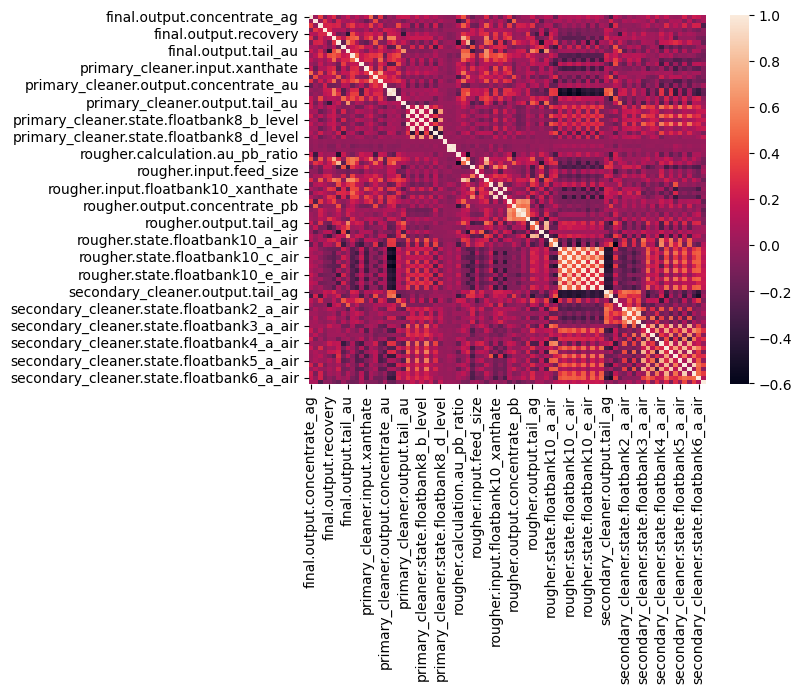

In [ ]:
view_information(train)

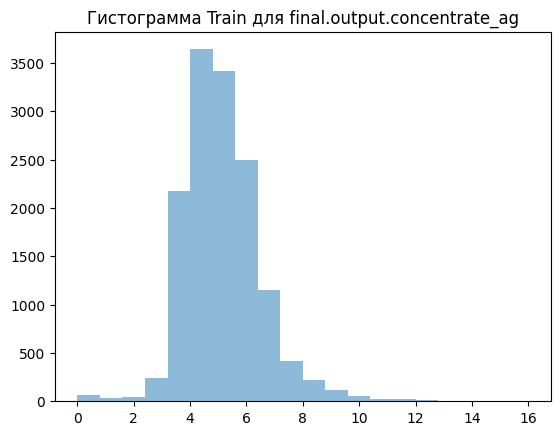

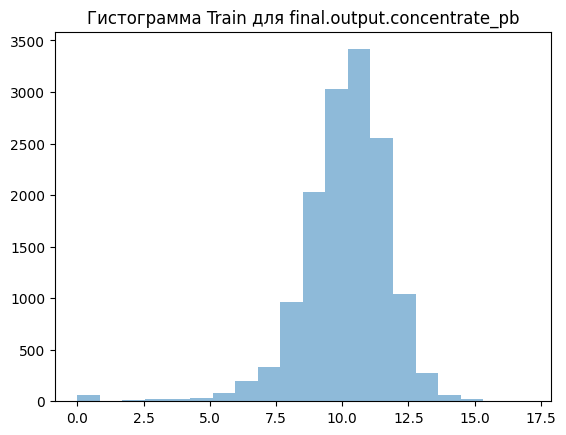

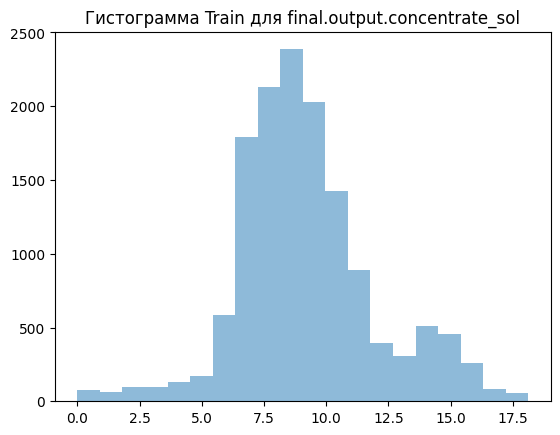

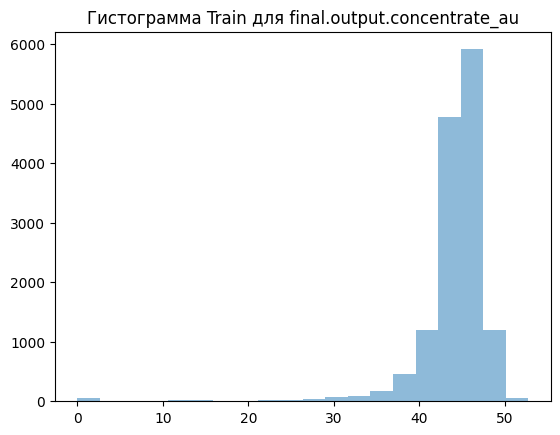

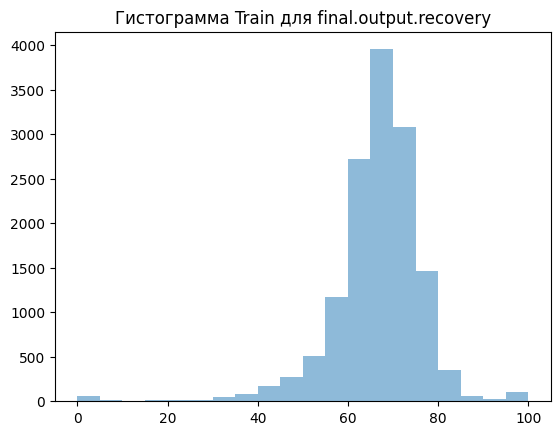

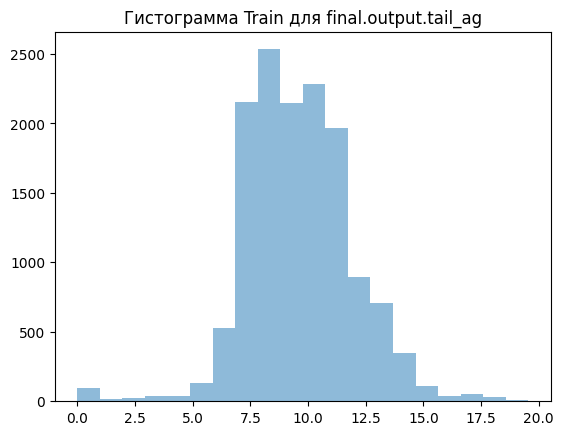

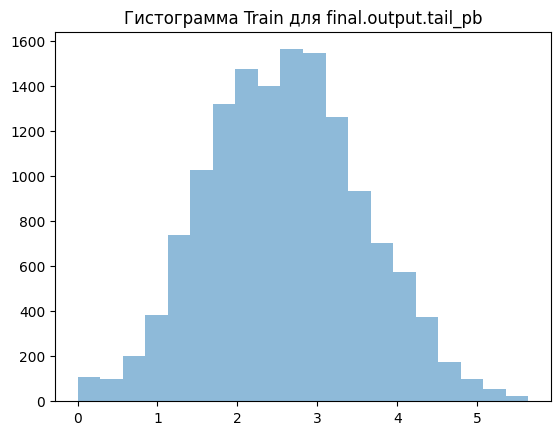

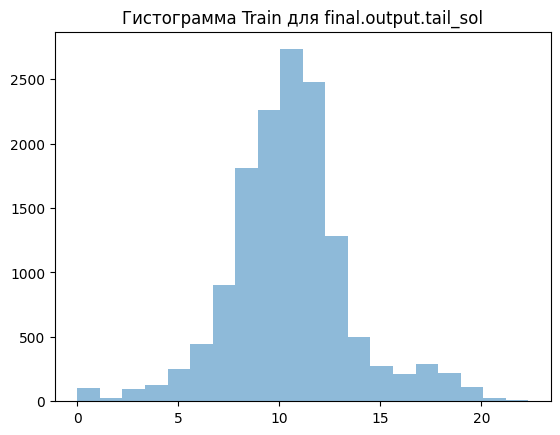

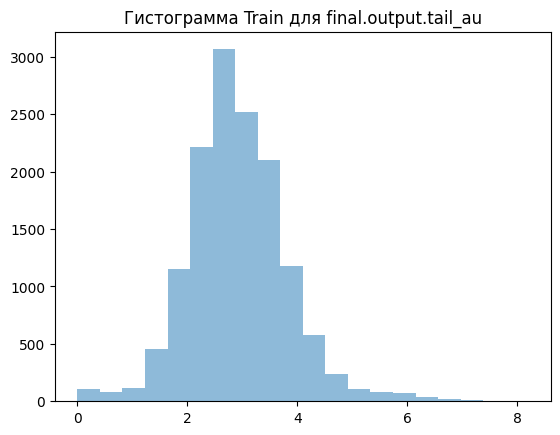

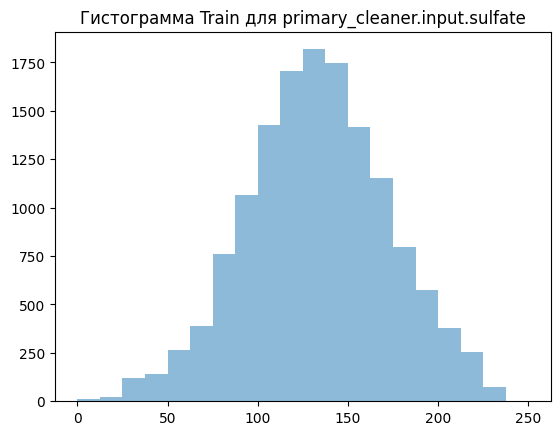

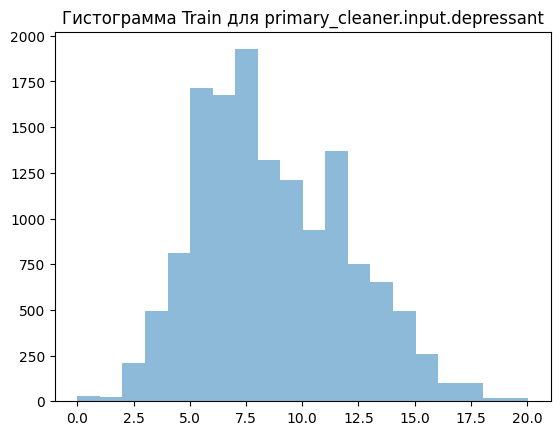

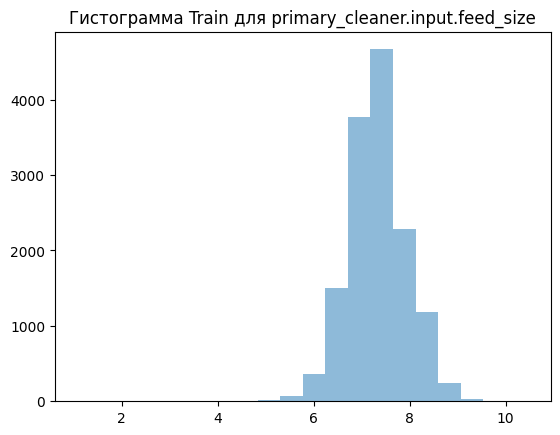

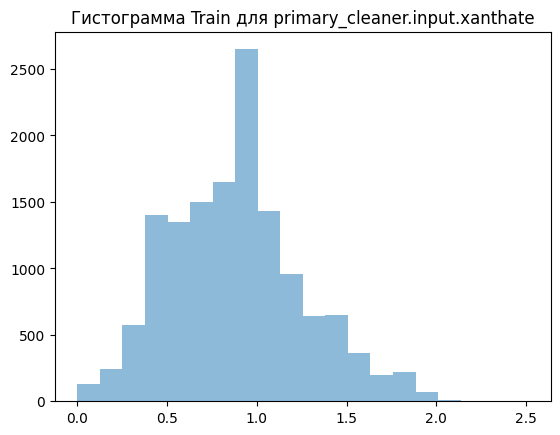

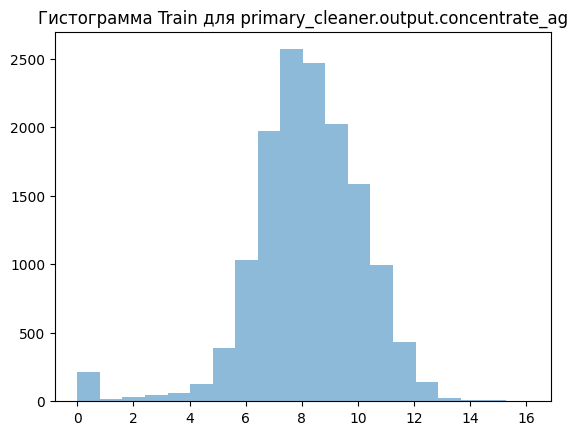

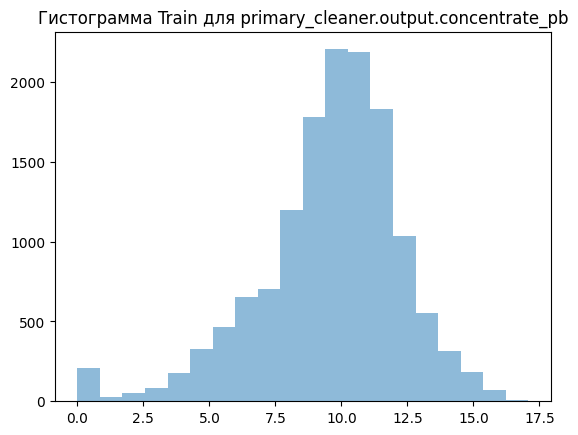

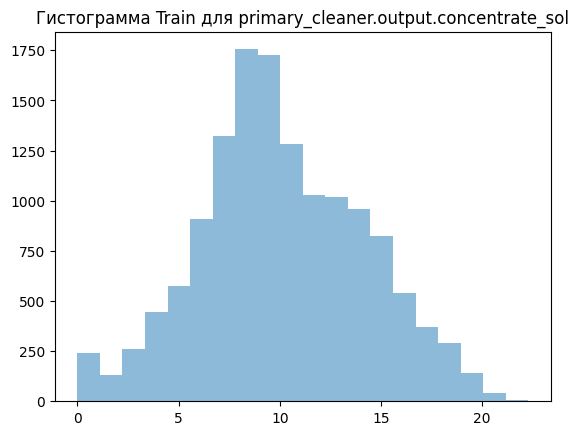

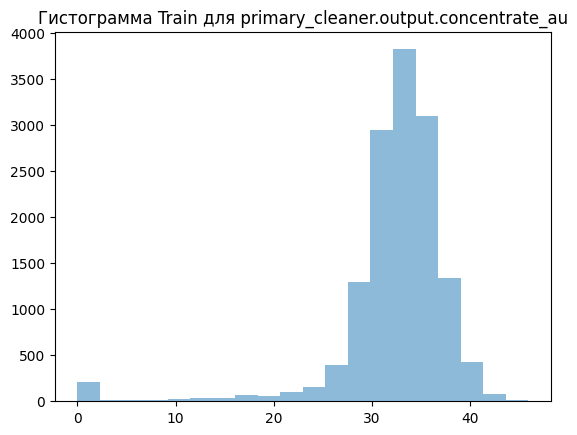

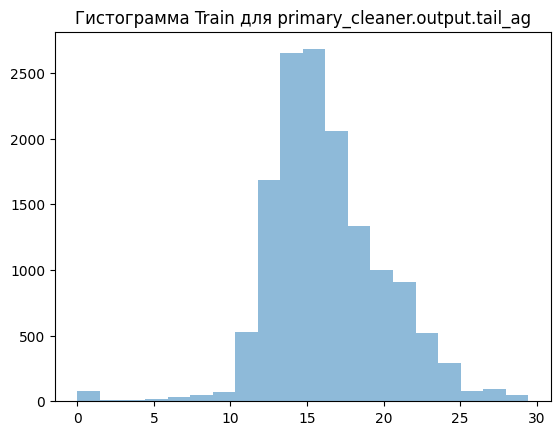

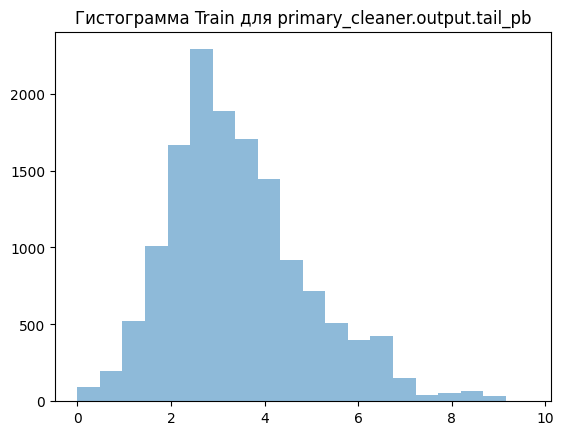

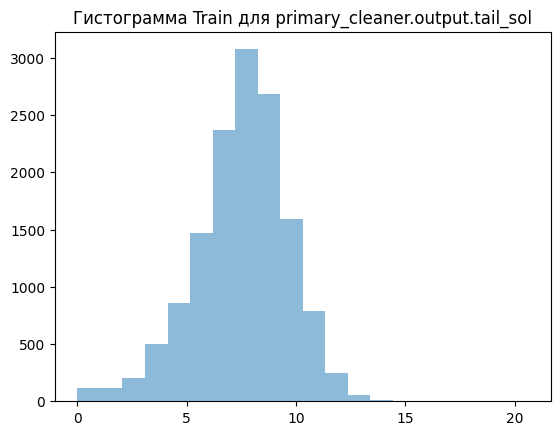

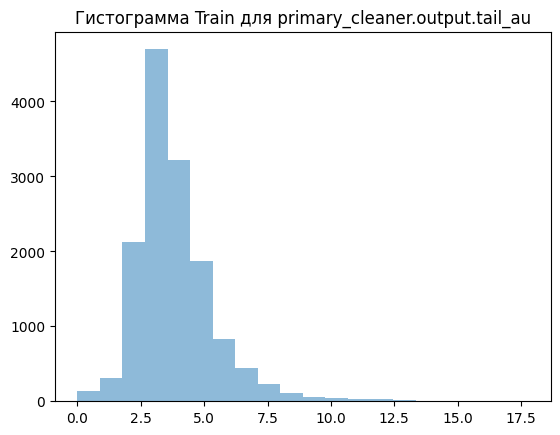

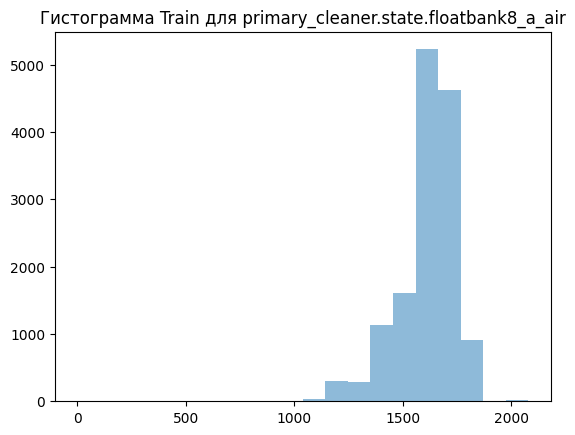

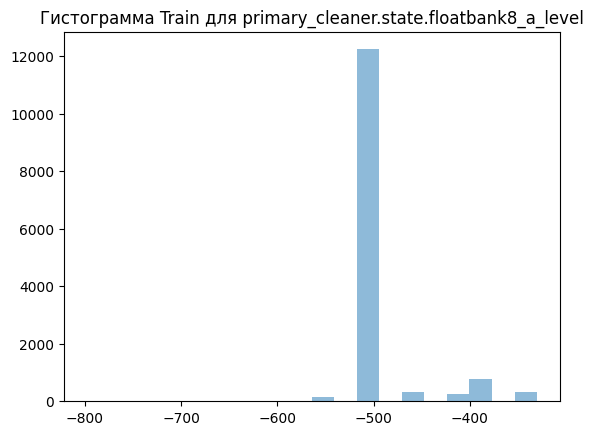

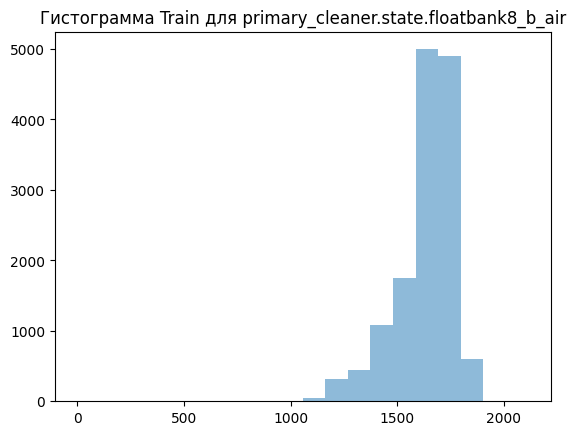

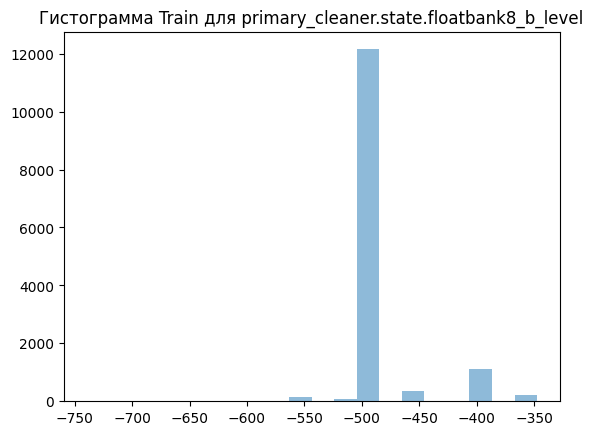

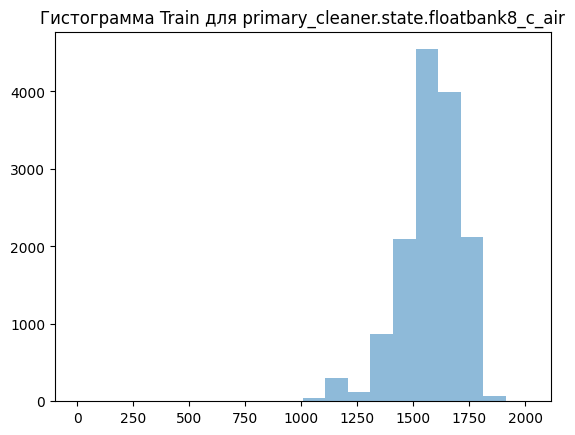

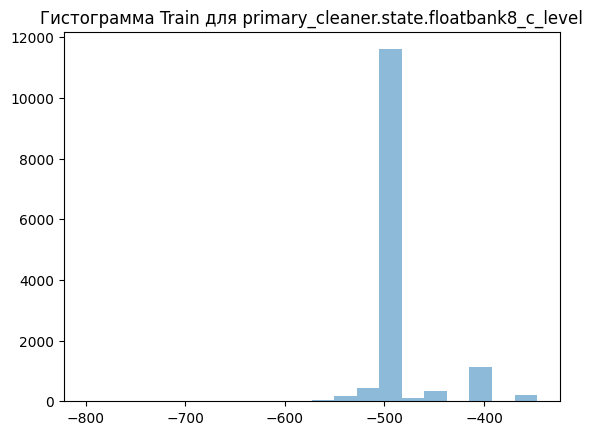

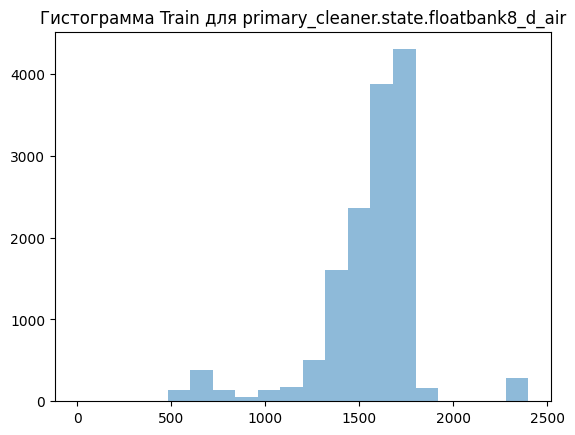

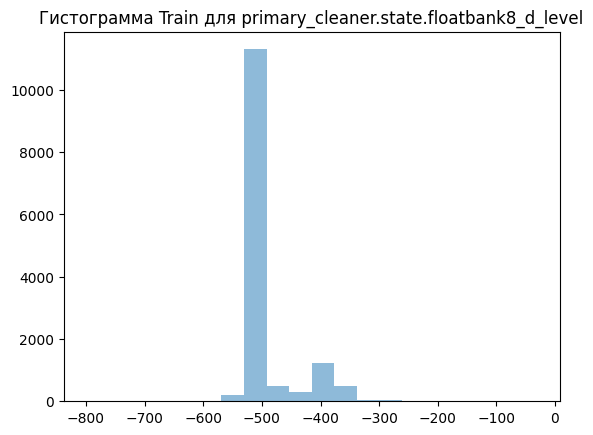

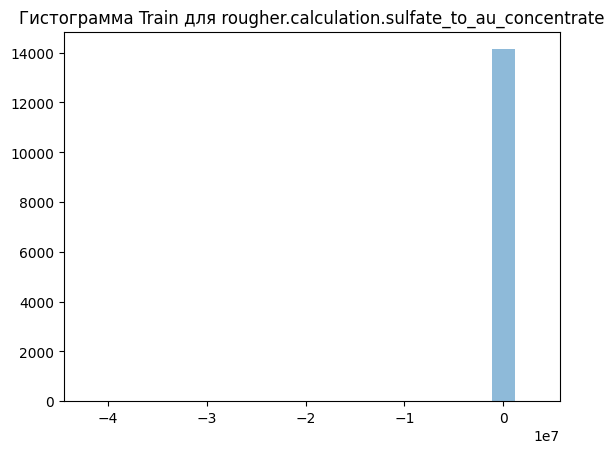

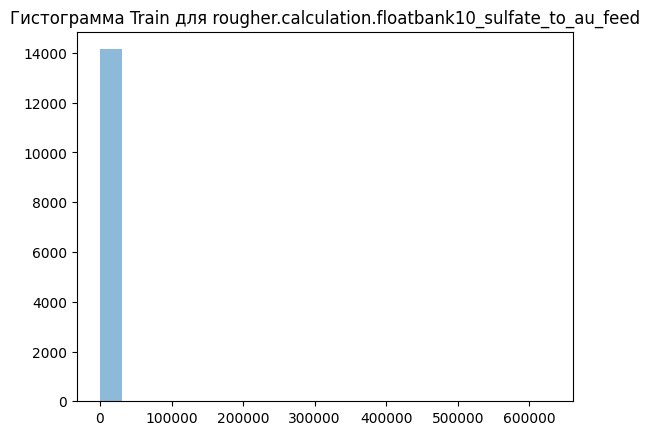

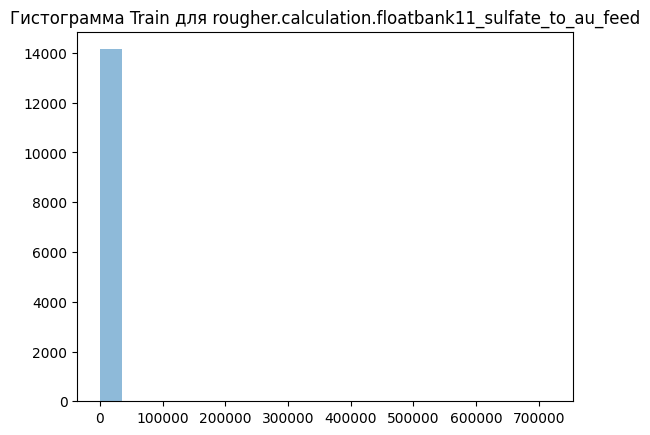

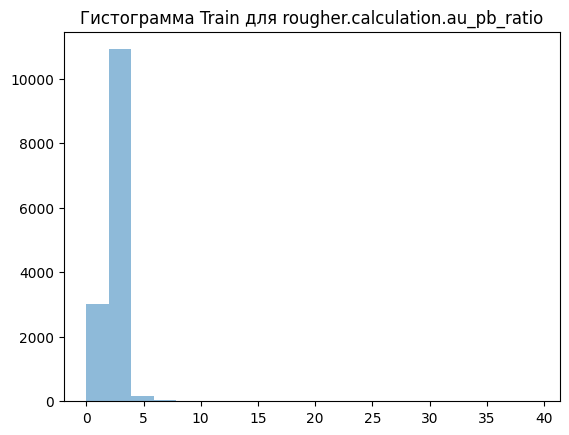

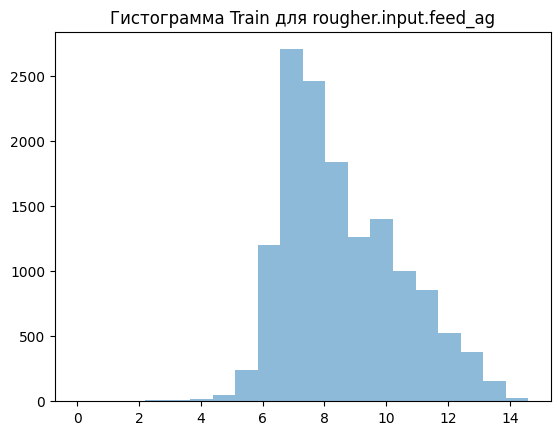

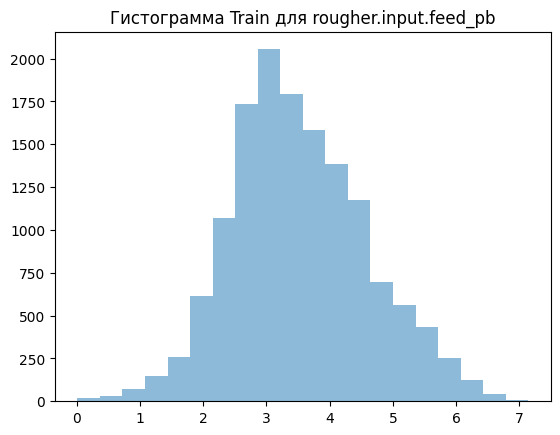

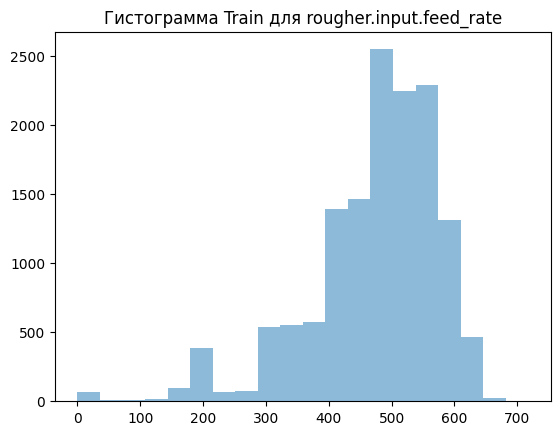

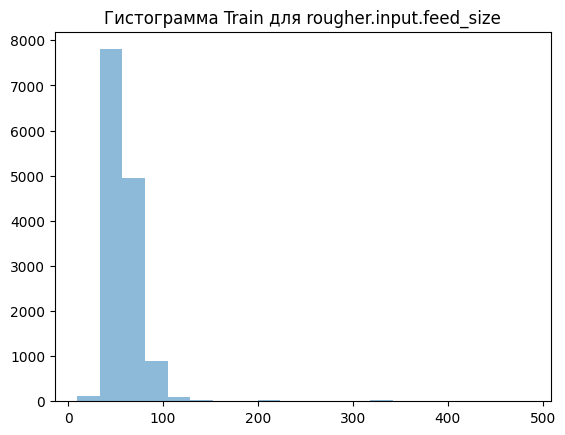

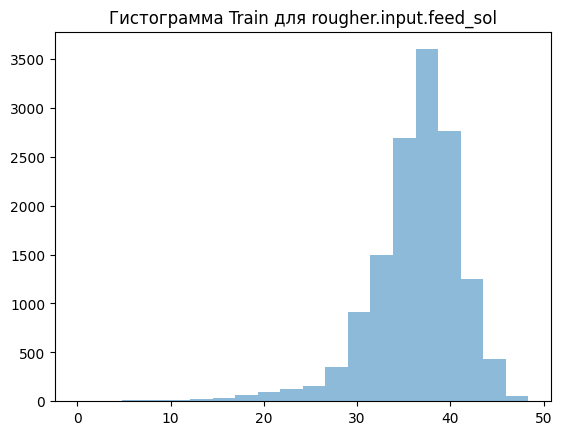

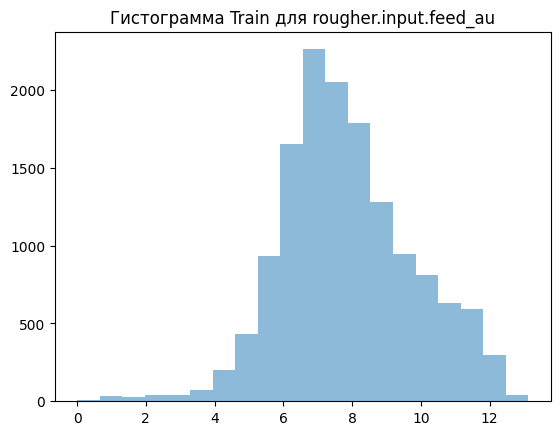

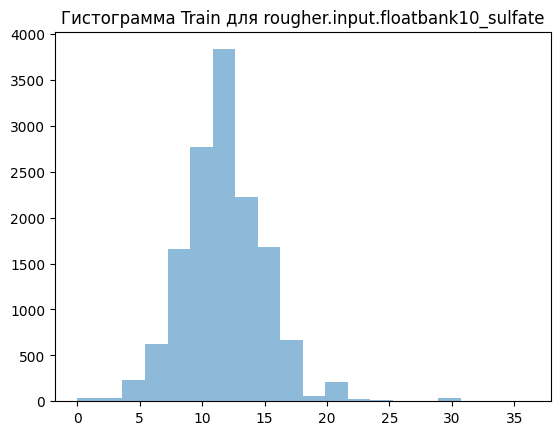

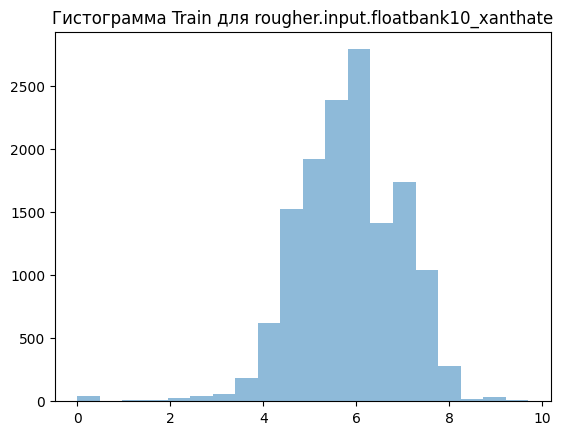

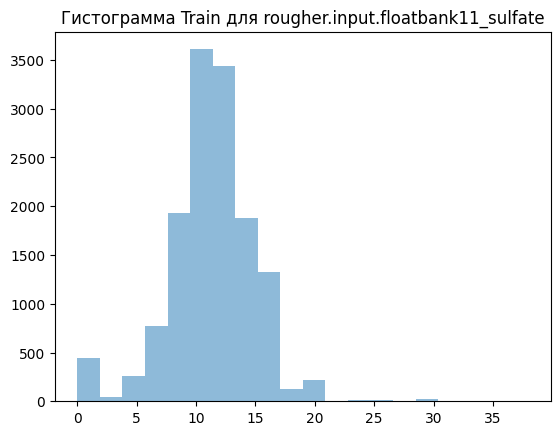

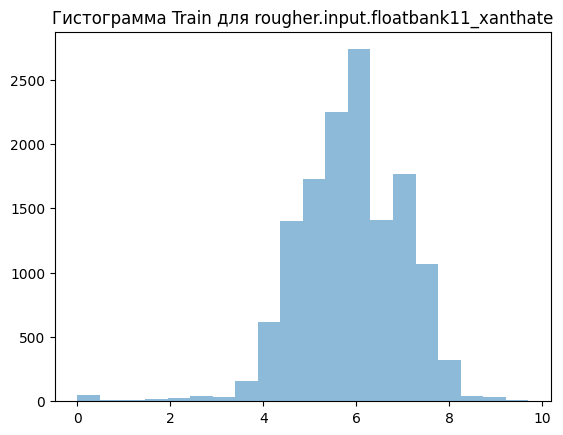

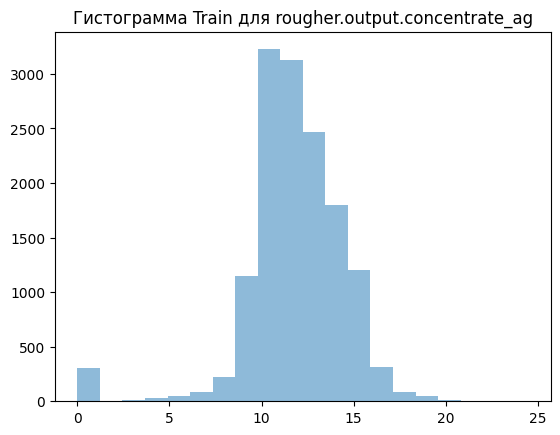

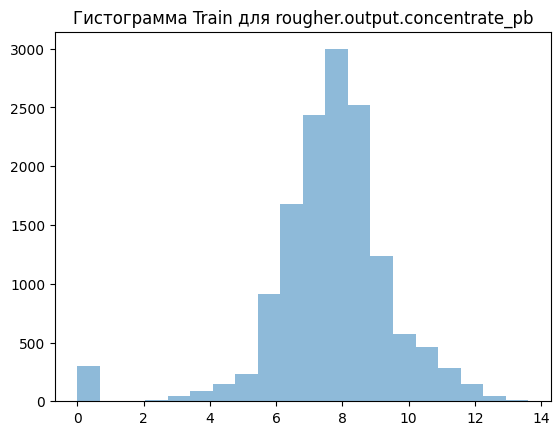

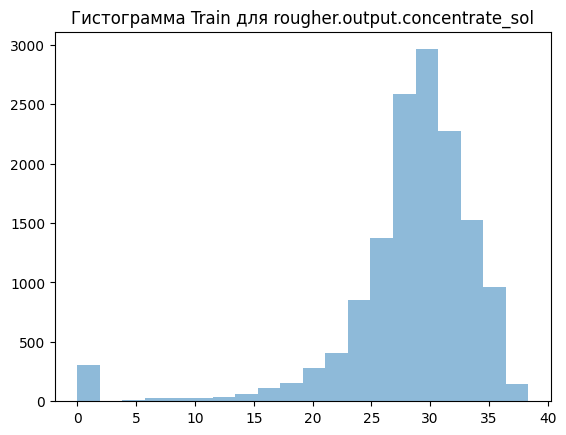

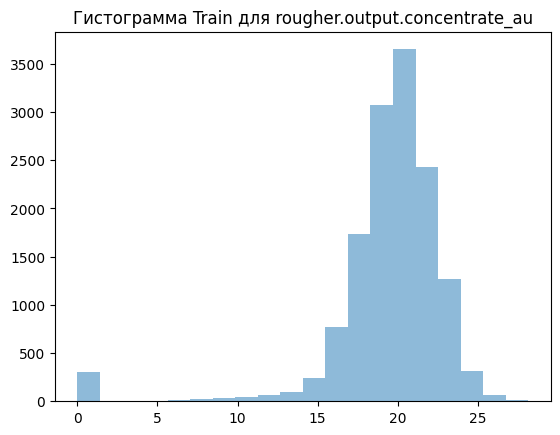

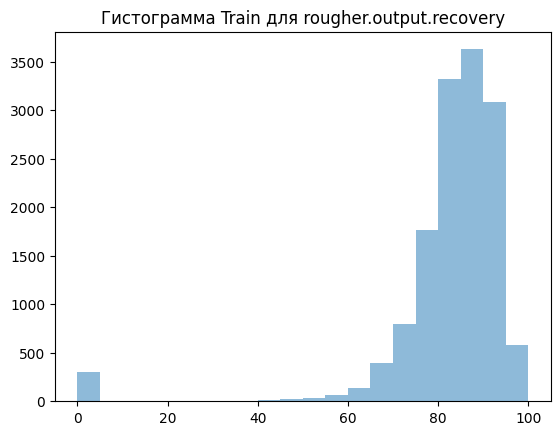

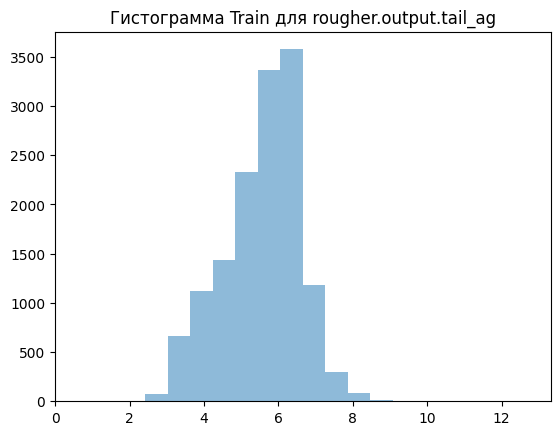

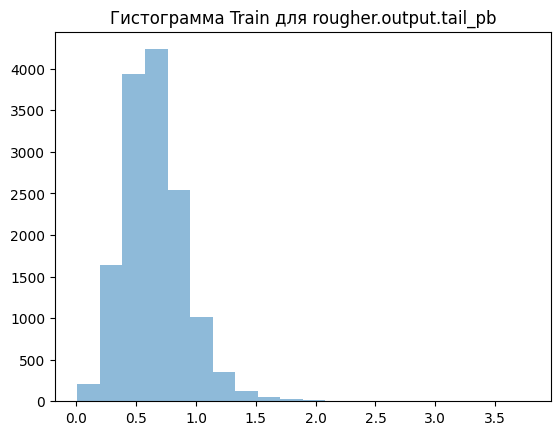

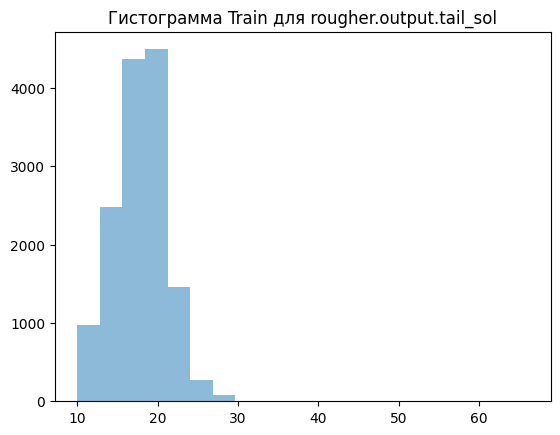

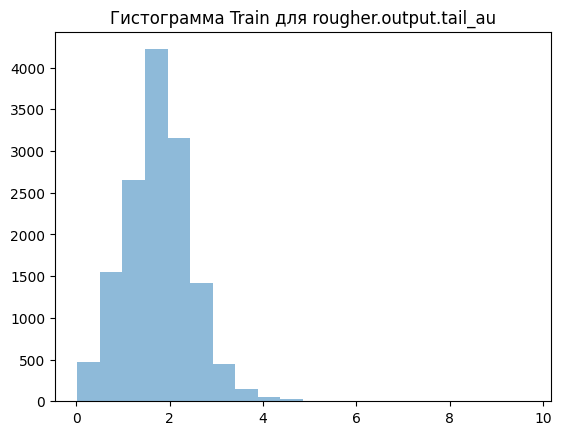

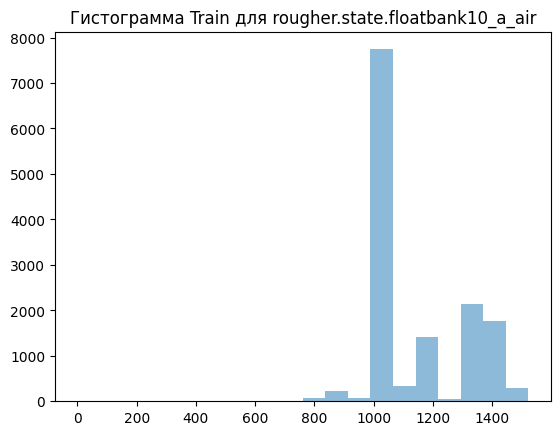

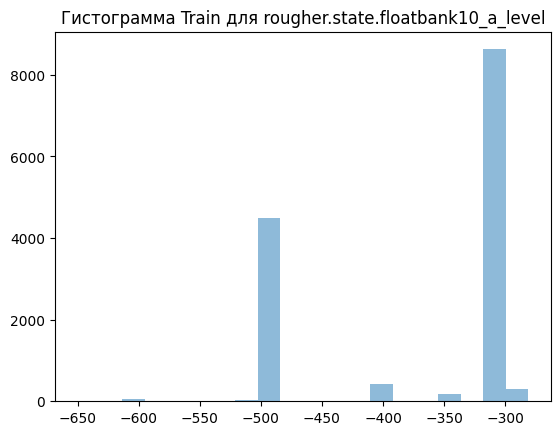

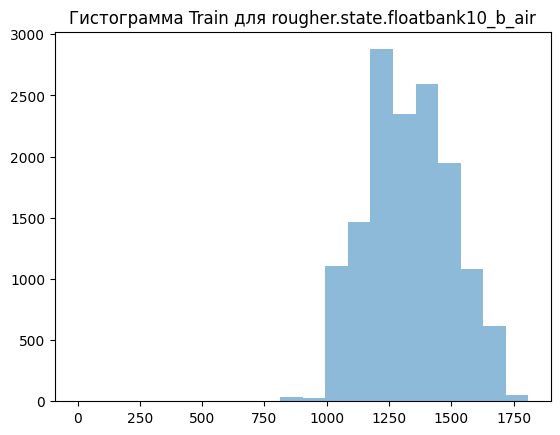

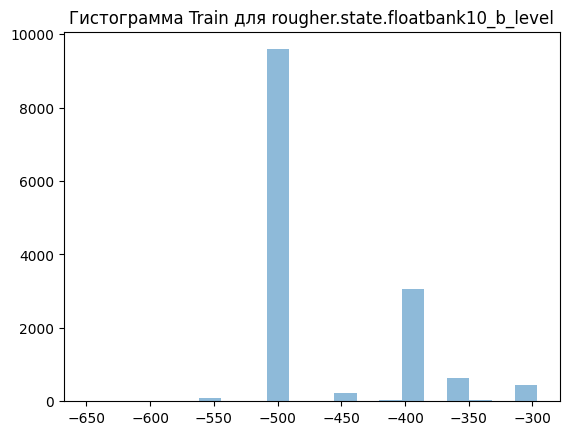

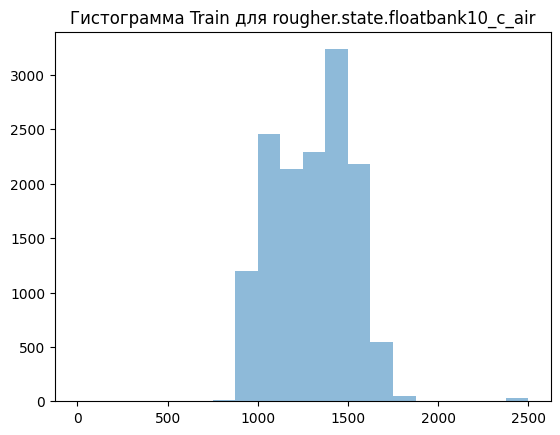

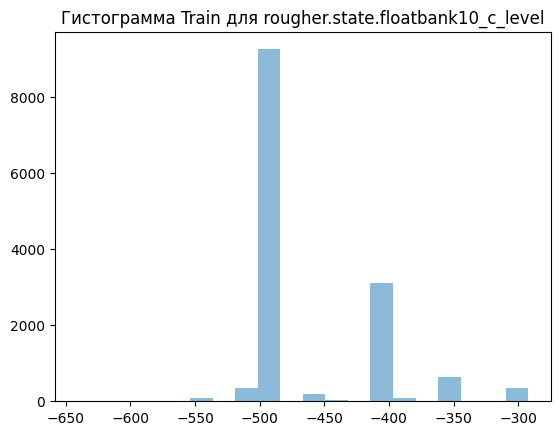

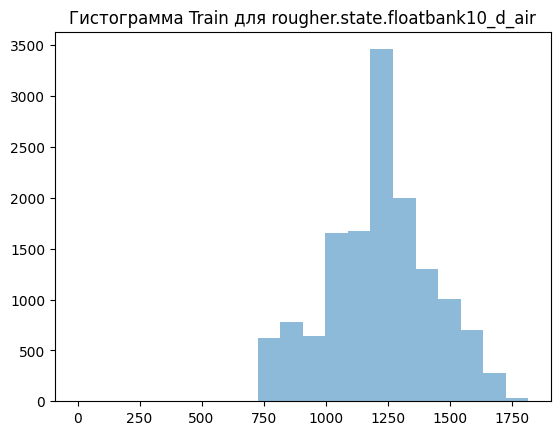

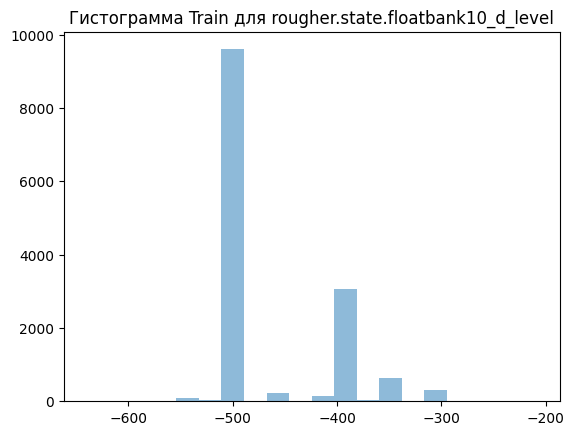

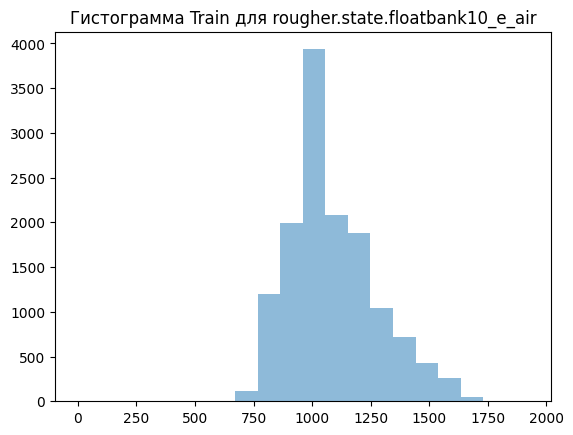

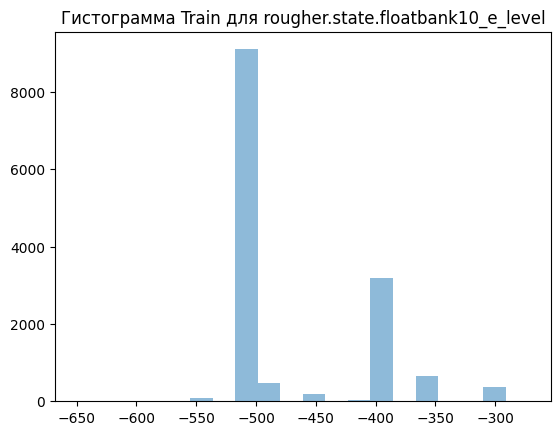

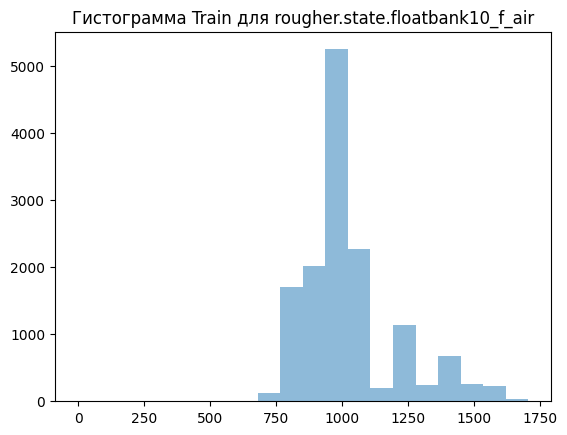

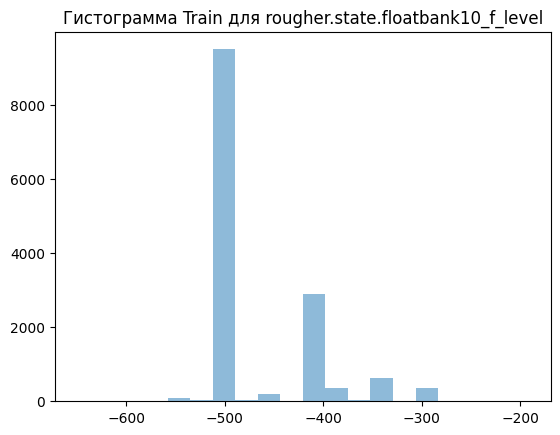

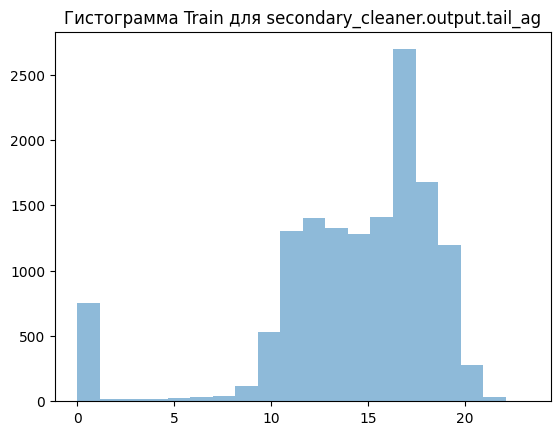

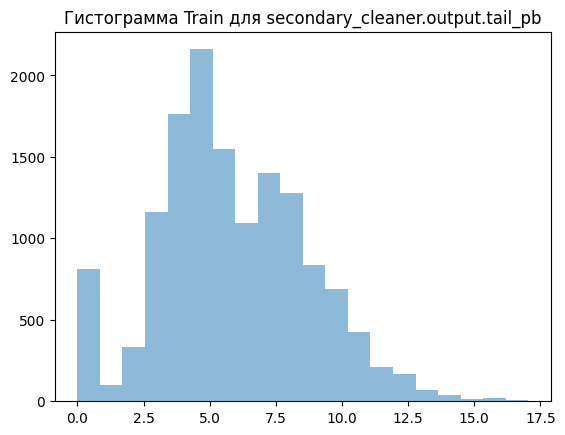

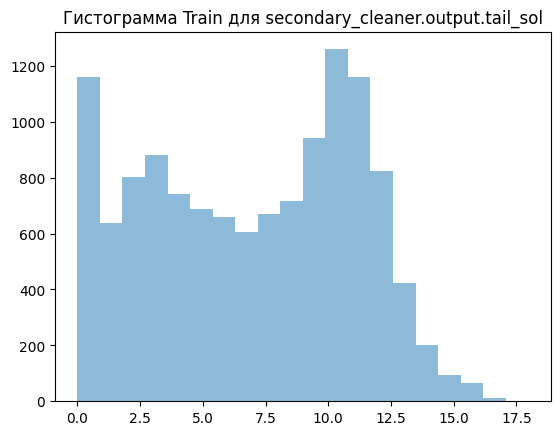

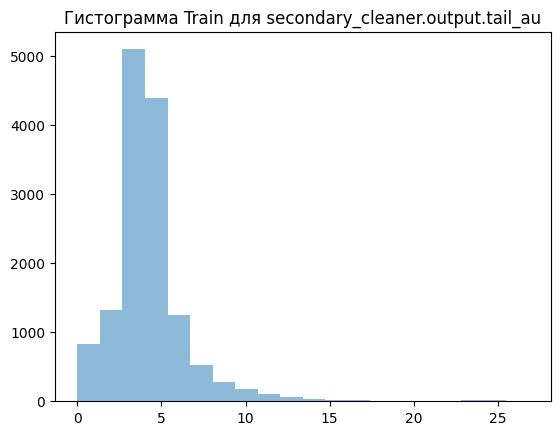

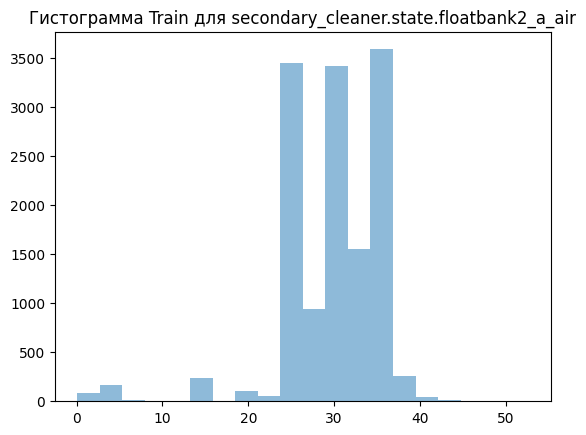

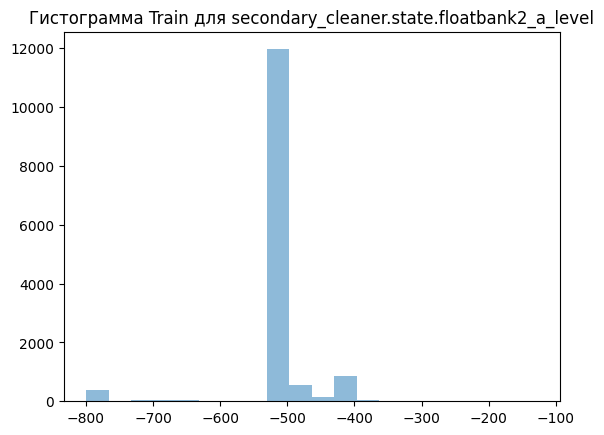

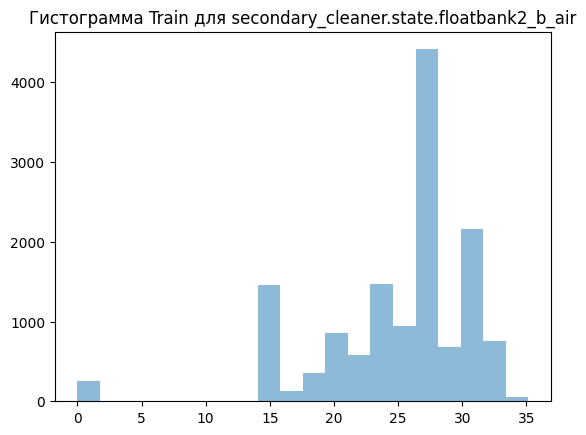

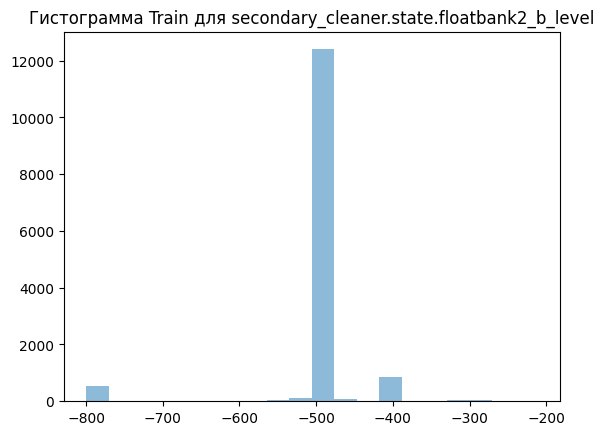

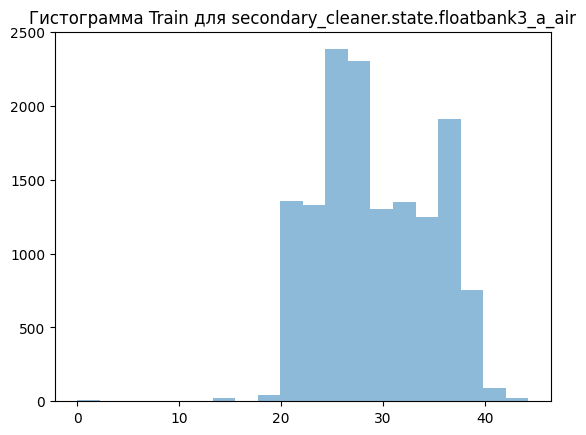

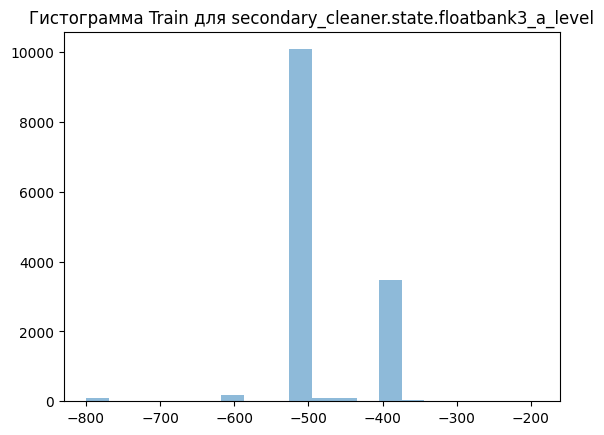

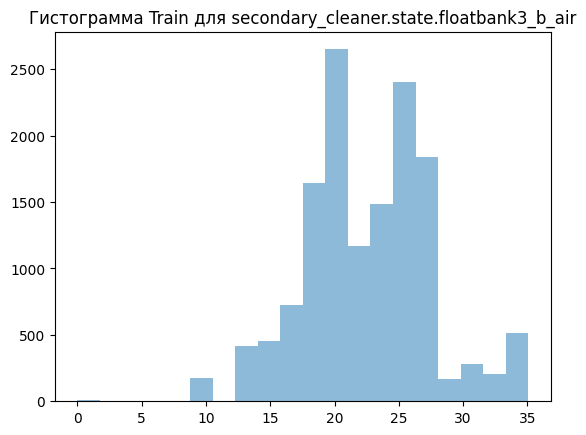

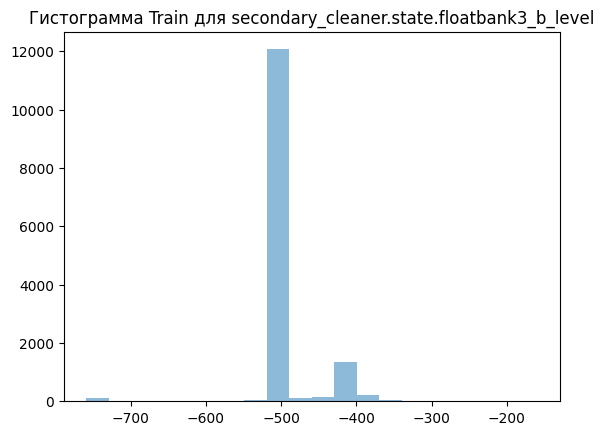

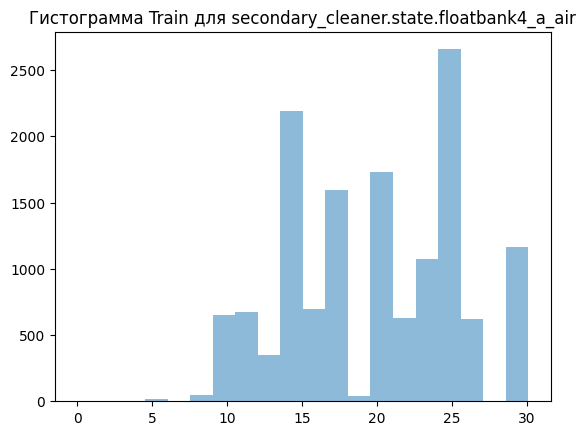

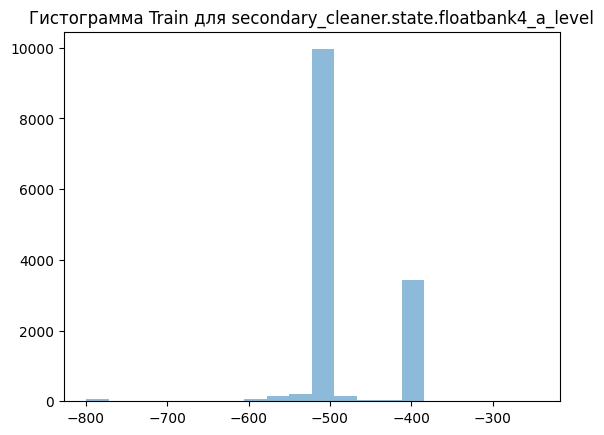

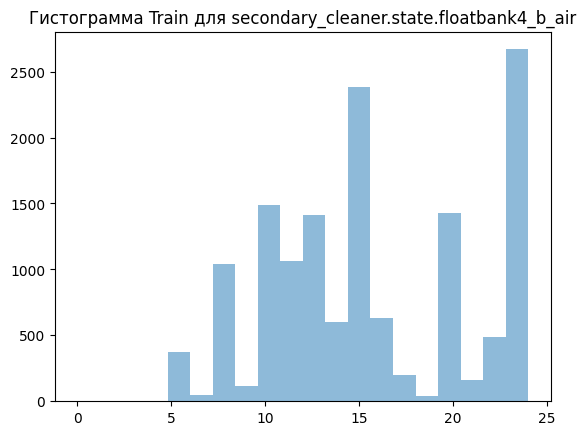

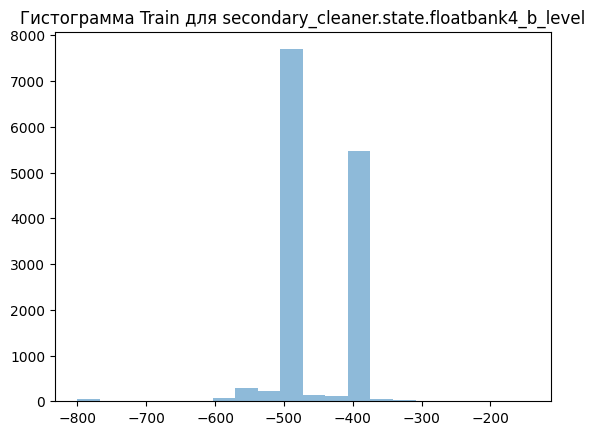

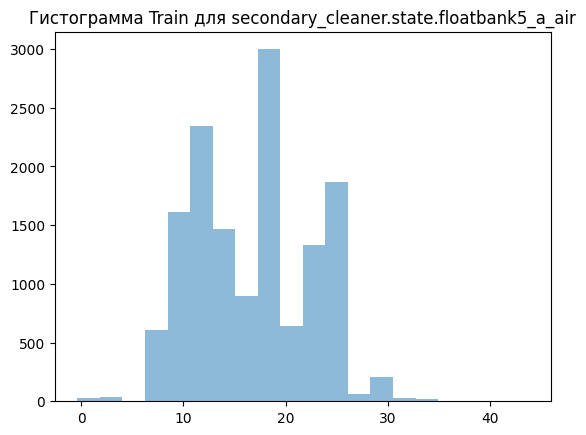

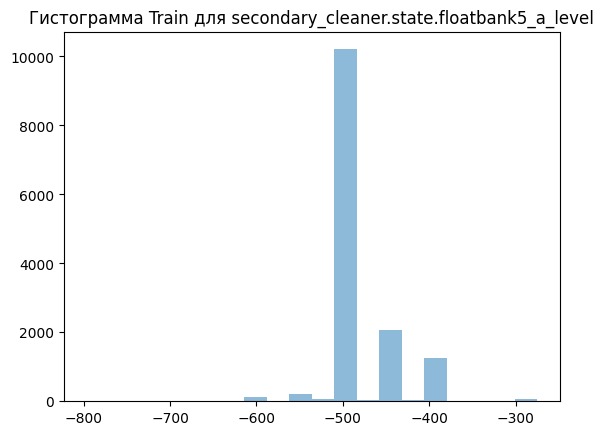

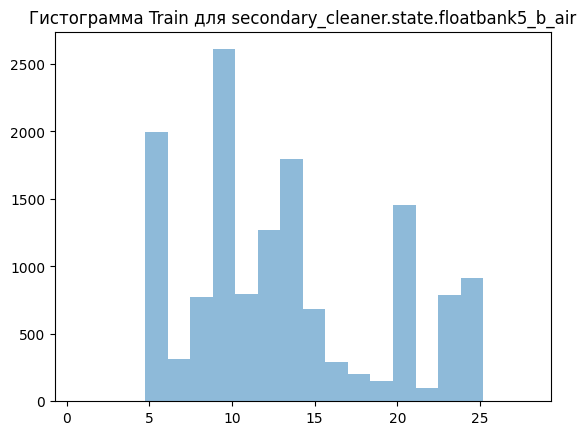

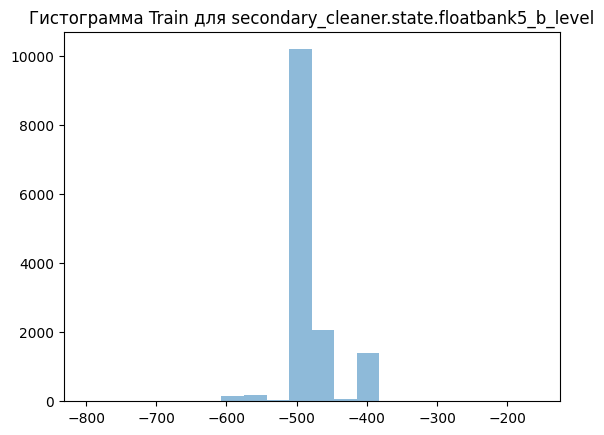

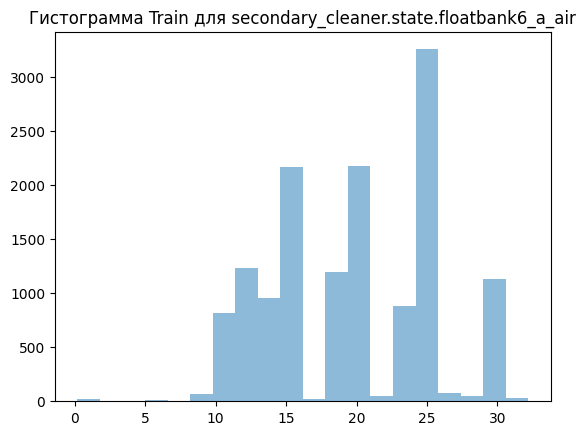

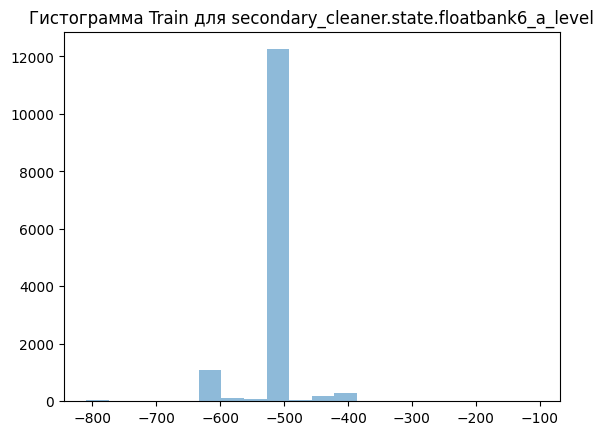

In [ ]:
for column in train.columns:
    plt.hist(train[column], bins=20, alpha=0.5)
    plt.title(f'Гистограмма Train для {column}')
    plt.show()

> Train

---
* Размер датасета: (Строк: 14149, колонок: 86)
* Тип данных: Float64
* Есть nan-ы
* Есть коррелирующие признаки
* Дубликатов нет

> Смотрим датафрейм test

Размер датасета: (5290, 52)


primary_cleaner.input.sulfate  \
date                                                 
2016-09-01 00:59:59                     210.800909   
2016-09-01 01:59:59                     215.392455   
2016-09-01 02:59:59                     215.259946   
2016-09-01 03:59:59                     215.336236   
2016-09-01 04:59:59                     199.099327   

                     primary_cleaner.input.depressant  \
date                                                    
2016-09-01 00:59:59                         14.993118   
2016-09-01 01:59:59                         14.987471   
2016-09-01 02:59:59                         12.884934   
2016-09-01 03:59:59                         12.006805   
2016-09-01 04:59:59                         10.682530   

                     primary_cleaner.input.feed_size  \
date                                                   
2016-09-01 00:59:59                         8.080000   
2016-09-01 01:59:59                         8.080000   
2016-09-01 02:59:59                         7.786667   
2016-09-01 03:59:59                         7.640000   
2016-09-01 04:59:59                         7.530000   

                     primary_cleaner.input.xanthate  \
date                                                  
2016-09-01 00:59:59                        1.005021   
2016-09-01 01:59:59                        0.990469   
2016-09-01 02:59:59                        0.996043   
2016-09-01 03:59:59                        0.863514   
2016-09-01 04:59:59                        0.805575   

                     primary_cleaner.state.floatbank8_a_air  \
date                                                          
2016-09-01 00:59:59                             1398.981301   
2016-09-01 01:59:59                             1398.777912   
2016-09-01 02:59:59                             1398.493666   
2016-09-01 03:59:59                             1399.618111   
2016-09-01 04:59:59                             1401.268123   

                     primary_cleaner.state.floatbank8_a_level  \
date                                                            
2016-09-01 00:59:59                               -500.225577   
2016-09-01 01:59:59                               -500.057435   
2016-09-01 02:59:59                               -500.868360   
2016-09-01 03:59:59                               -498.863574   
2016-09-01 04:59:59                               -500.808305   

                     primary_cleaner.state.floatbank8_b_air  \
date                                                          
2016-09-01 00:59:59                             1399.144926   
2016-09-01 01:59:59                             1398.055362   
2016-09-01 02:59:59                             1398.860436   
2016-09-01 03:59:59                             1397.440120   
2016-09-01 04:59:59                             1398.128818   

                     primary_cleaner.state.floatbank8_b_level  \
date                                                            
2016-09-01 00:59:59                               -499.919735   
2016-09-01 01:59:59                               -499.778182   
2016-09-01 02:59:59                               -499.764529   
2016-09-01 03:59:59                               -499.211024   
2016-09-01 04:59:59                               -499.504543   

                     primary_cleaner.state.floatbank8_c_air  \
date                                                          
2016-09-01 00:59:59                             1400.102998   
2016-09-01 01:59:59                             1396.151033   
2016-09-01 02:59:59                             1398.075709   
2016-09-01 03:59:59                             1400.129303   
2016-09-01 04:59:59                             1402.172226   

                     primary_cleaner.state.floatbank8_c_level  \
date                                                            
2016-09-01 00:59:59                               -500.704369   
2016-09-01 01:59:59           

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5290 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5286 non-null   float64
 1   primary_cleaner.input.depressant            5285 non-null   float64
 2   primary_cleaner.input.feed_size             5290 non-null   float64
 3   primary_cleaner.input.xanthate              5286 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5290 

primary_cleaner.input.sulfate  \
primary_cleaner.input.sulfate                                    1.000000   
primary_cleaner.input.depressant                                 0.455718   
primary_cleaner.input.feed_size                                  0.114456   
primary_cleaner.input.xanthate                                   0.497568   
primary_cleaner.state.floatbank8_a_air                           0.102653   
primary_cleaner.state.floatbank8_a_level                         0.048032   
primary_cleaner.state.floatbank8_b_air                           0.075737   
primary_cleaner.state.floatbank8_b_level                         0.138949   
primary_cleaner.state.floatbank8_c_air                           0.024710   
primary_cleaner.state.floatbank8_c_level                         0.027697   
primary_cleaner.state.floatbank8_d_air                           0.095001   
primary_cleaner.state.floatbank8_d_level                        -0.020533   
rougher.input.feed_ag                                            0.359619   
rougher.input.feed_pb                                            0.428382   
rougher.input.feed_rate                                          0.464251   
rougher.input.feed_size                                         -0.009796   
rougher.input.feed_sol                                           0.423859   
rougher.input.feed_au                                            0.437016   
rougher.input.floatbank10_sulfate                                0.617768   
rougher.input.floatbank10_xanthate                               0.557307   
rougher.input.floatbank11_sulfate                                0.583022   
rougher.input.floatbank11_xanthate                               0.527014   
rougher.state.floatbank10_a_air                                  0.236898   
rougher.state.floatbank10_a_level                                0.222913   
rougher.state.floatbank10_b_air                                 -0.230670   
rougher.state.floatbank10_b_level                               -0.047665   
rougher.state.floatbank10_c_air                                 -0.247043   
rougher.state.floatbank10_c_level                               -0.051896   
rougher.state.floatbank10_d_air                                 -0.247163   
rougher.state.floatbank10_d_level                               -0.016032   
rougher.state.floatbank10_e_air                                 -0.234958   
rougher.state.floatbank10_e_level                               -0.120379   
rougher.state.floatbank10_f_air                                 -0.250187   
rougher.state.floatbank10_f_level                               -0.063497   
secondary_cleaner.state.floatbank2_a_air                         0.051989   
secondary_cleaner.state.floatbank2_a_level                      -0.039145   
secondary_cleaner.state.floatbank2_b_air                         0.254702   
secondary_cleaner.state.floatbank2_b_level                      -0.011921   
secondary_cleaner.state.floatbank3_a_air                         0.136986   
secondary_cleaner.state.floatbank3_a_level                       0.003869   
secondary_cleaner.state.floatbank3_b_air                         0.148037   
secondary_cleaner.state.floatbank3_b_level                       0.020303   
secondary_cleaner.state.floatbank4_a_air                         0.305793   
secondary_cleaner.state.floatbank4_a_level                       0.117976   
secondary_cleaner.state.floatbank4_b_air                         0.348395   
secondary_cleaner.state.floatbank4_b_level                       0.068693   
secondary_cleaner.state.floatbank5_a_air                         0.093608   
secondary_cleaner.state.floatbank5_a_level                       0.132193   
secondary_cleaner.state.floatbank5_b_air                         0.156583   
secondary_cleaner.state.floatbank5_b_level                       0.072618   
secondary_cleaner.state.floatbank6_a_air                        -0.134499   
secondary_cleaner.state.floatbank6_a_lev


Количество дубликатов 0


primary_cleaner.input.sulfate  primary_cleaner.input.depressant  \
count                    5286.000000                       5285.000000   
mean                      174.839652                          8.683596   
std                        43.027080                          3.072050   
min                         2.566156                          0.003839   
25%                       147.121401                          6.489555   
50%                       177.828489                          8.052207   
75%                       208.125438                         10.027764   
max                       265.983123                         40.000000   

       primary_cleaner.input.feed_size  primary_cleaner.input.xanthate  \
count                      5290.000000                     5286.000000   
mean                          7.266339                        1.383803   
std                           0.610219                        0.643474   
min                           5.650000                        0.004984   
25%                           6.890000                        0.907623   
50%                           7.250000                        1.197610   
75%                           7.600000                        1.797819   
max                          15.500000                        4.102454   

       primary_cleaner.state.floatbank8_a_air  \
count                            5.290000e+03   
mean                             1.539494e+03   
std                              1.167979e+02   
min                              5.445860e-32   
25%                              1.498936e+03   
50%                              1.585129e+03   
75%                              1.602077e+03   
max                              2.103104e+03   

       primary_cleaner.state.floatbank8_a_level  \
count                               5290.000000   
mean                                -497.665883   
std                                   19.952431   
min                                 -795.316337   
25%                                 -500.357298   
50%                                 -499.969164   
75%                                 -499.568951   
max                                  -57.195404   

       primary_cleaner.state.floatbank8_b_air  \
count                            5.290000e+03   
mean                             1.545174e+03   
std                              1.222246e+02   
min                              6.647490e-32   
25%                              1.498971e+03   
50%                              1.595622e+03   
75%                              1.602324e+03   
max                              1.813084e+03   

       primary_cleaner.state.floatbank8_b_level  \
count                               5290.000000   
mean                                -500.273098   
std                                   32.968307   
min                                 -799.997015   
25%                                 -500.703002   
50%                                 -500.028514   
75%                                 -499.293257   
max                                 -142.527229   

       primary_cleaner.state.floatbank8_c_air  \
count                            5.290000e+03   
mean                             1.527272e+03   
std                              1.225380e+02   
min                              4.033736e-32   
25%                              1.473230e+03   
50%                              1.549595e+03   
75%                              1.601144e+03   
max                              1.715054e+03   

       primary_cleaner.state.floatbank8_c_level  \
count                               5290.000000   
mean                                -498.330680   
std                                   21.964876   
min                                 -799.960571   
25%                                 -501.018117   
50%                                 -500.017711   
75%                                 -498.994130   
max                

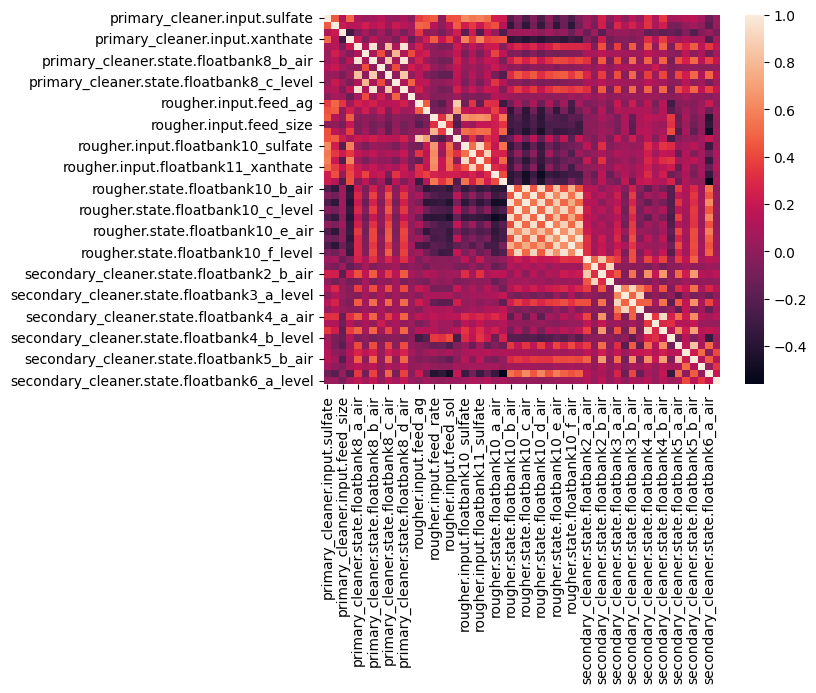

In [ ]:
view_information(test)

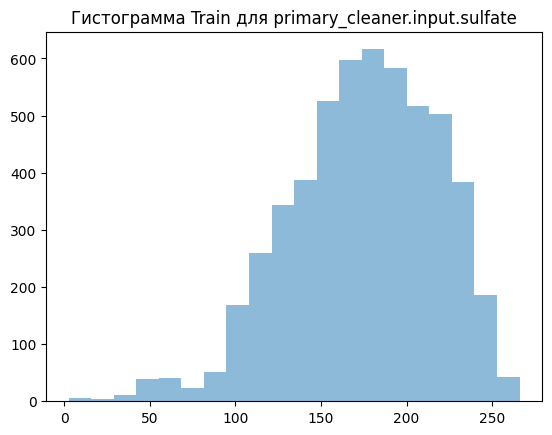

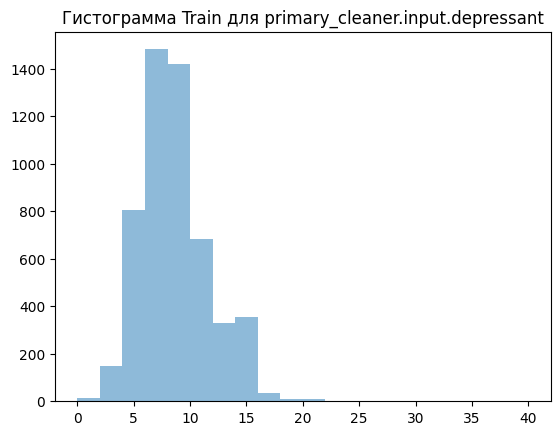

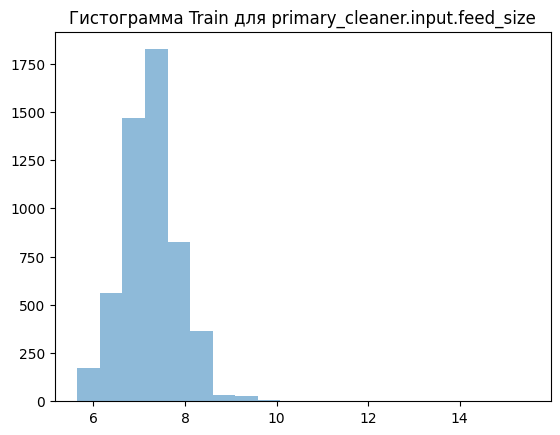

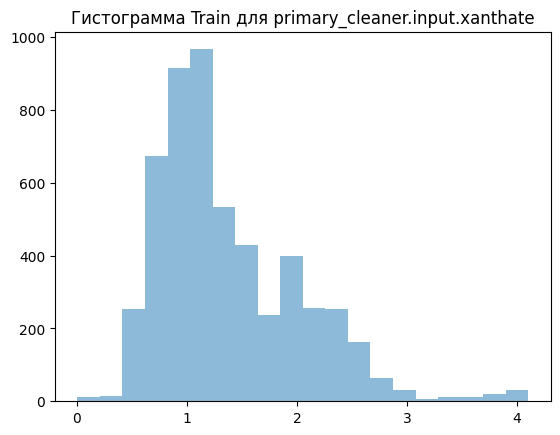

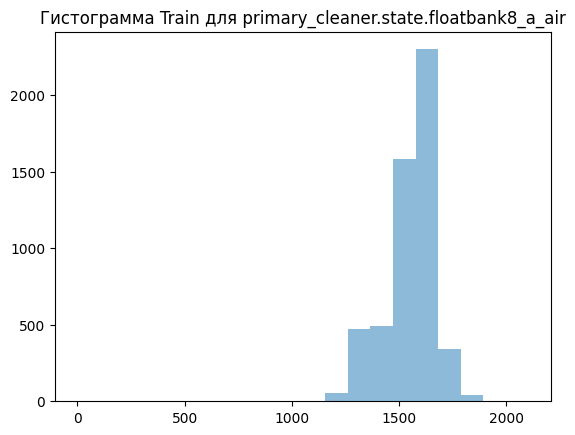

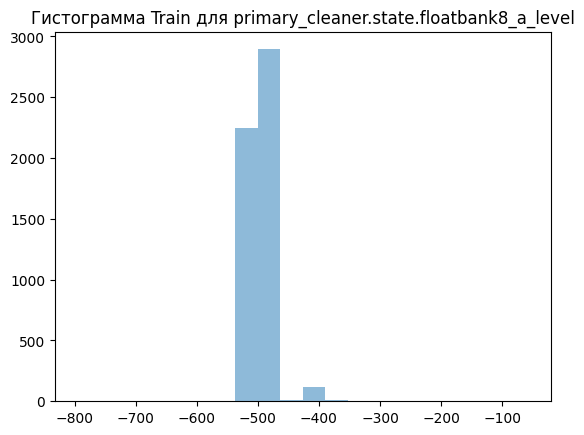

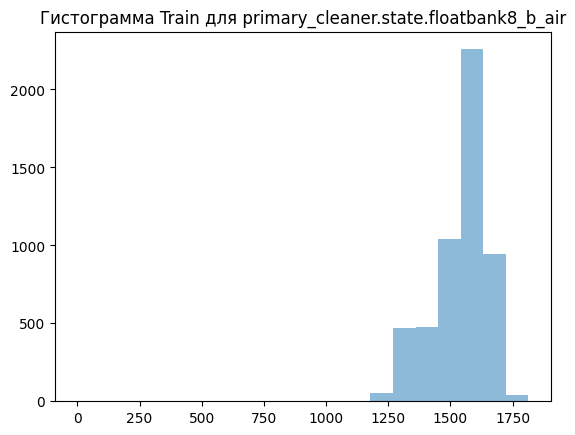

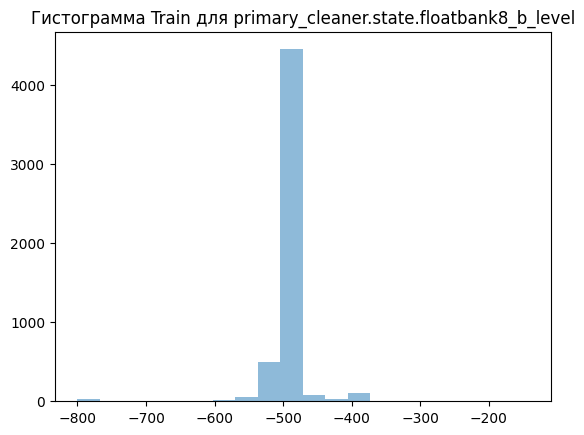

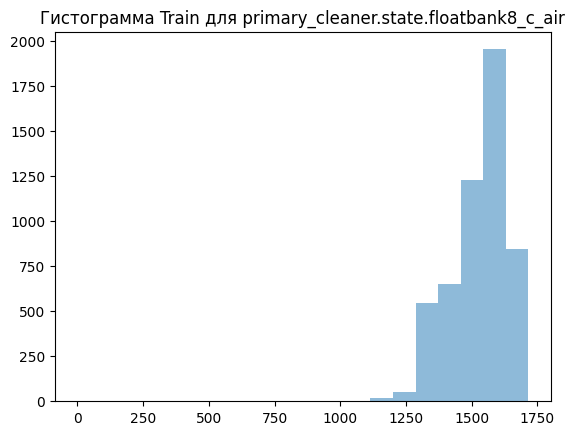

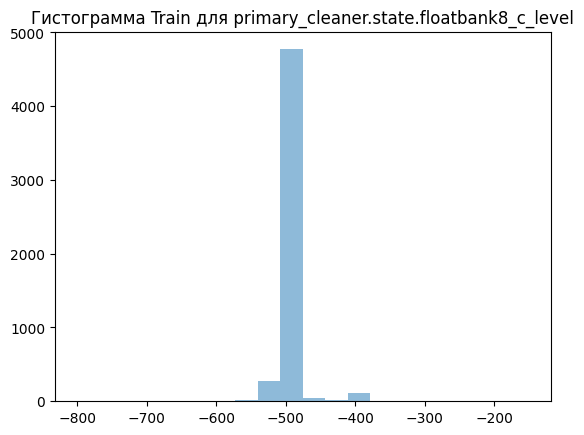

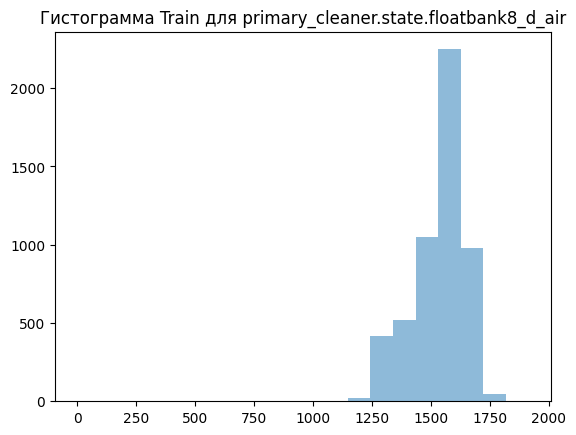

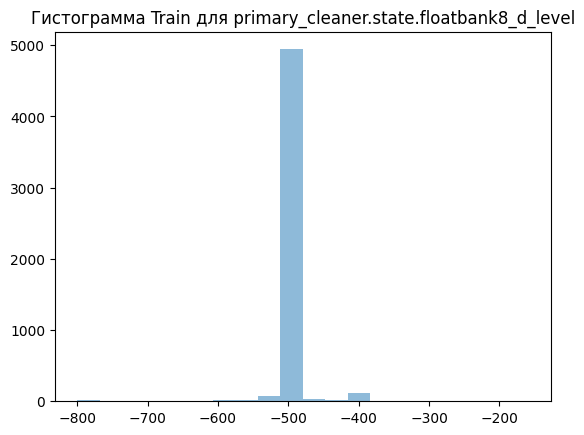

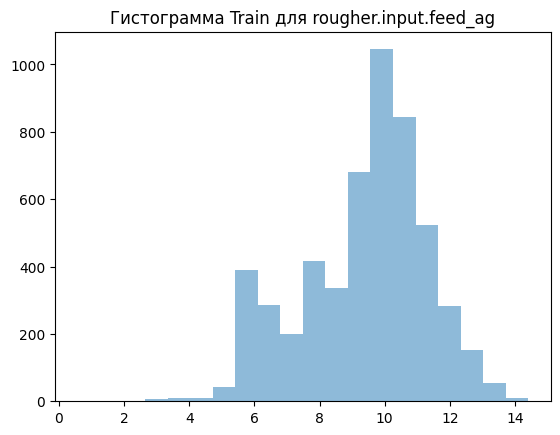

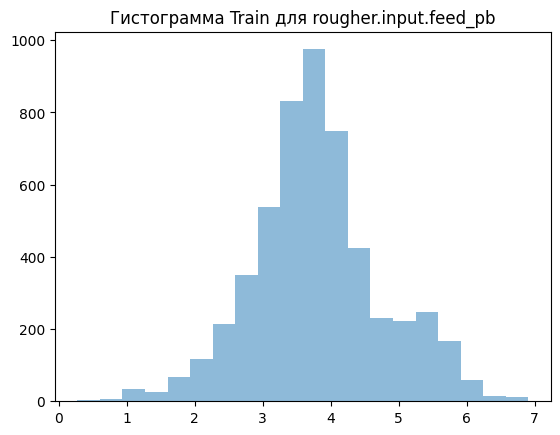

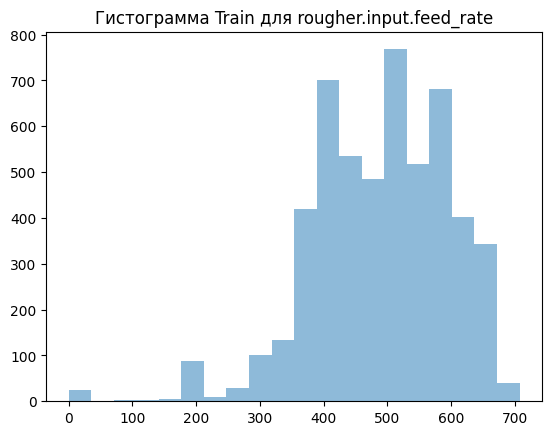

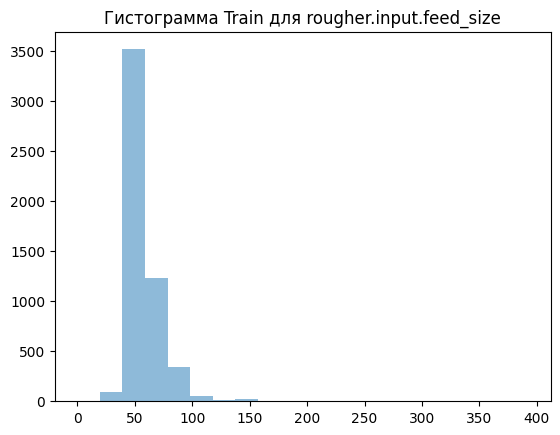

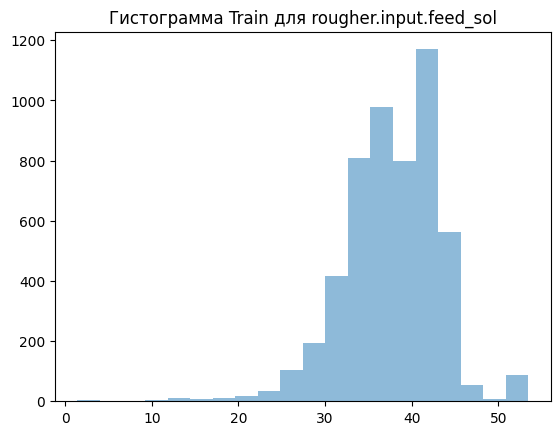

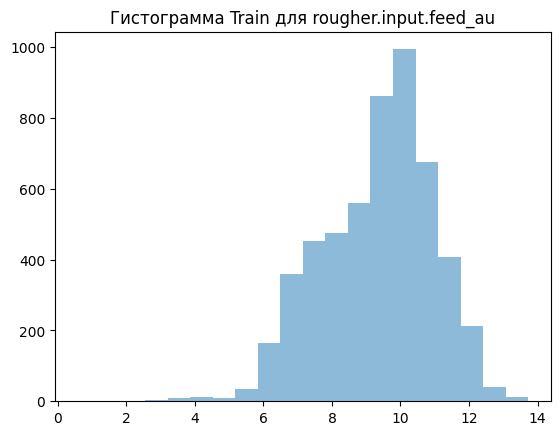

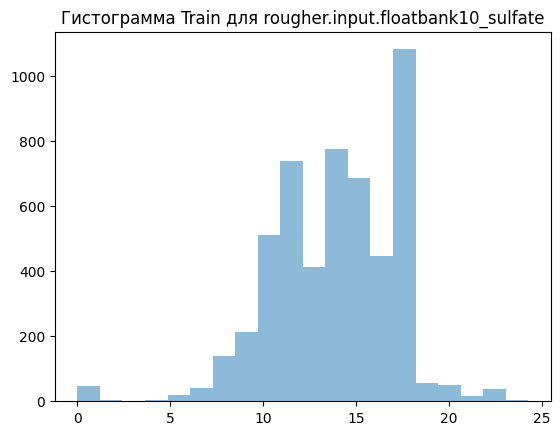

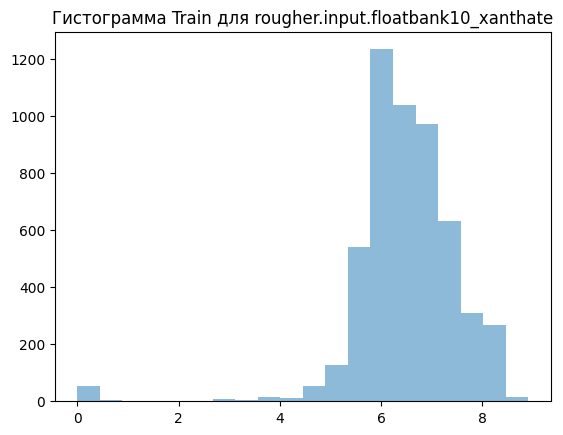

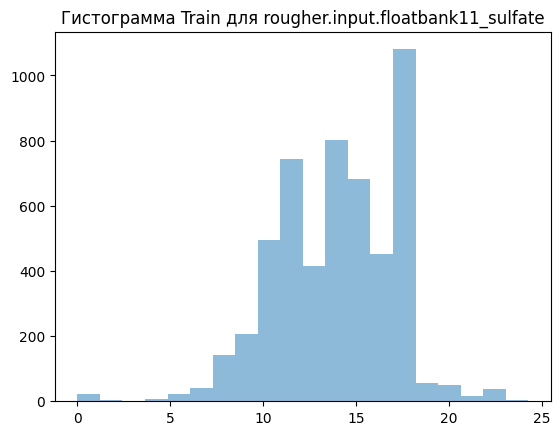

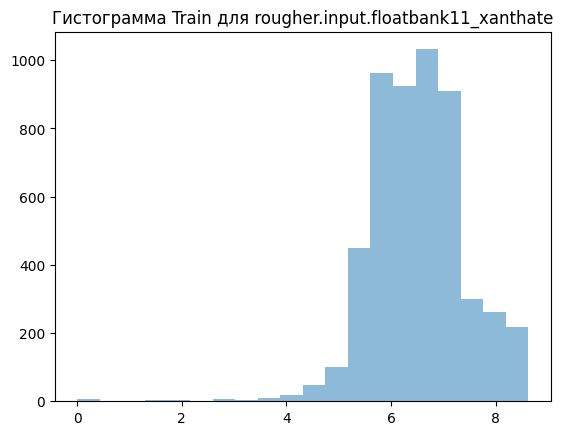

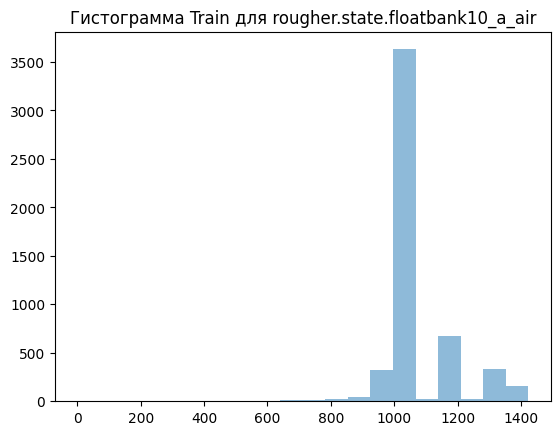

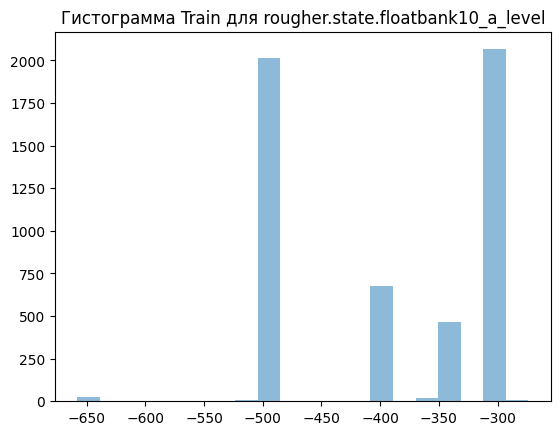

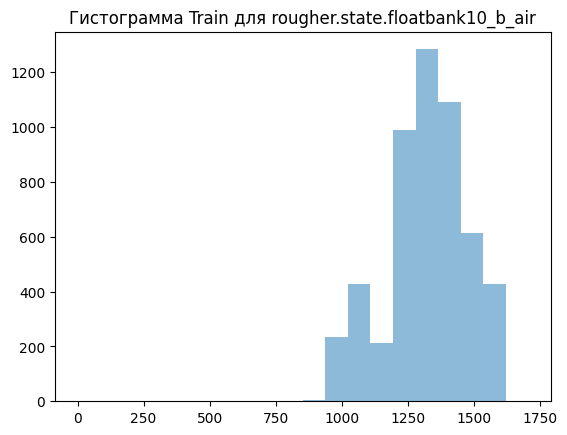

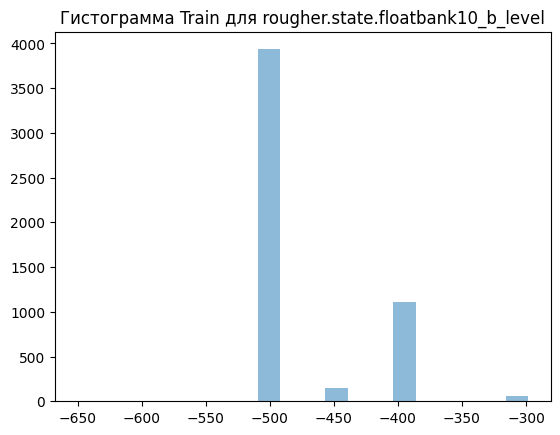

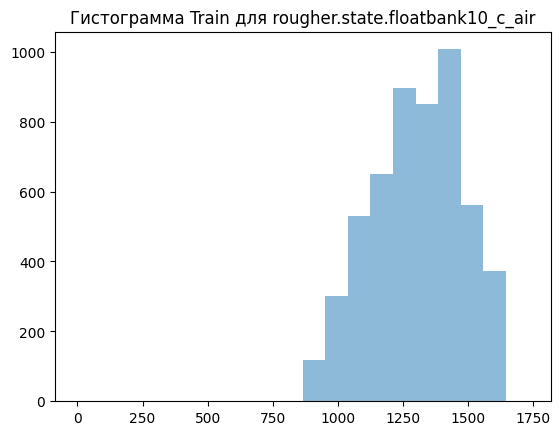

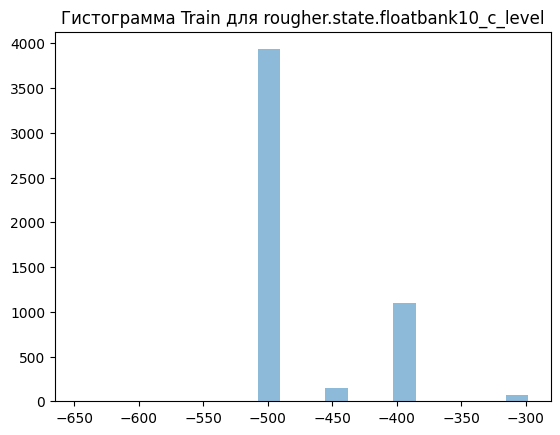

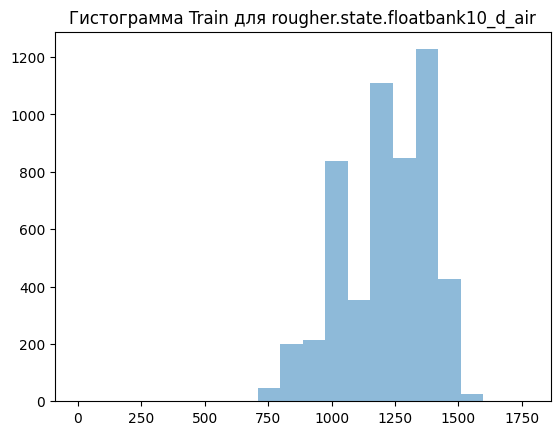

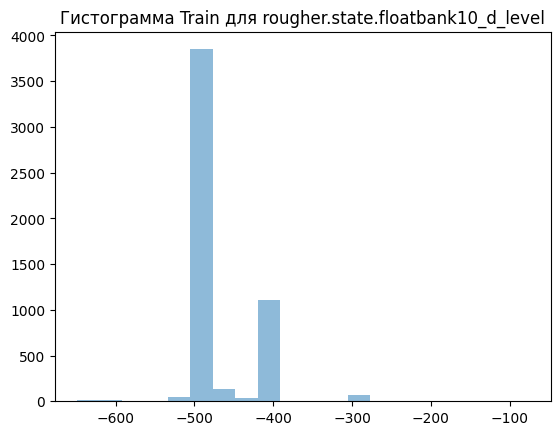

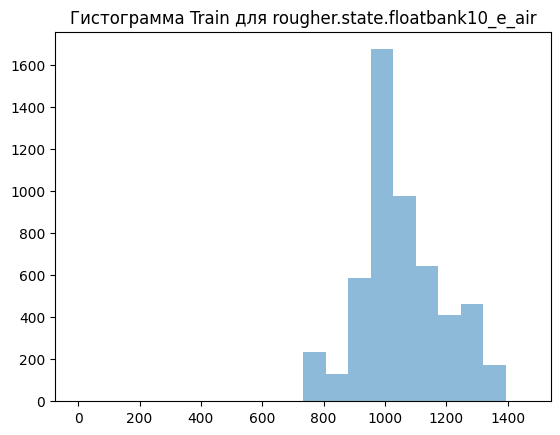

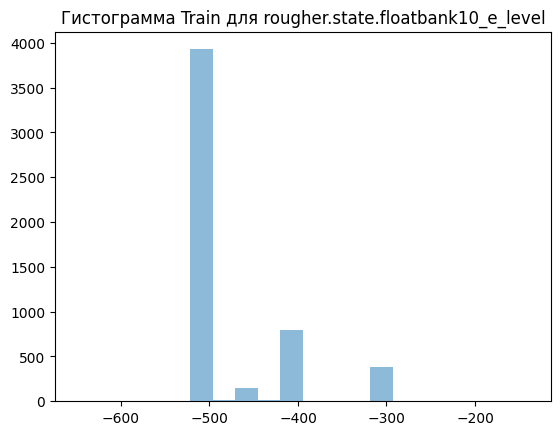

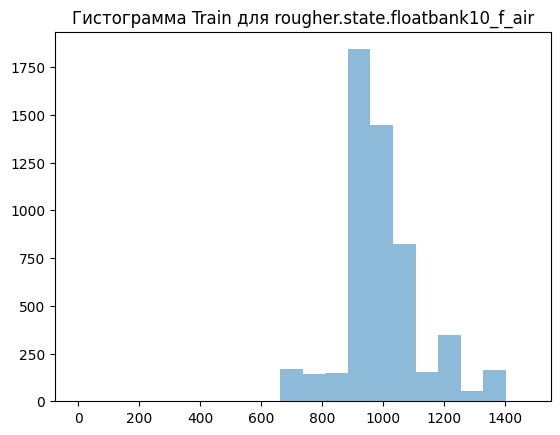

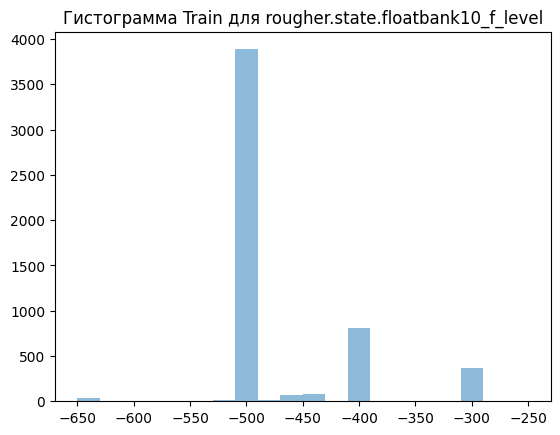

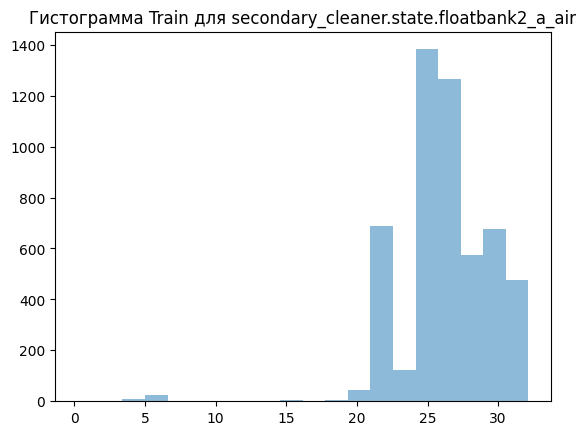

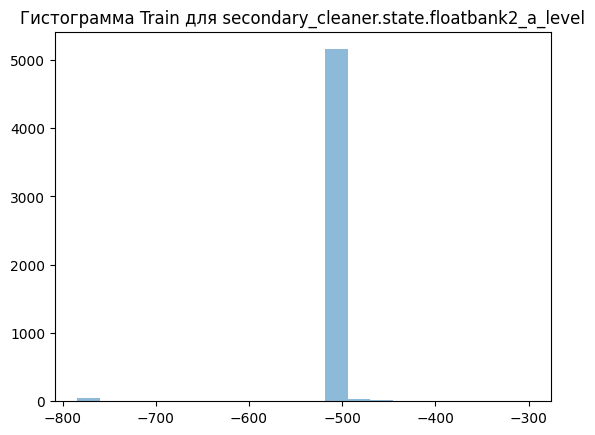

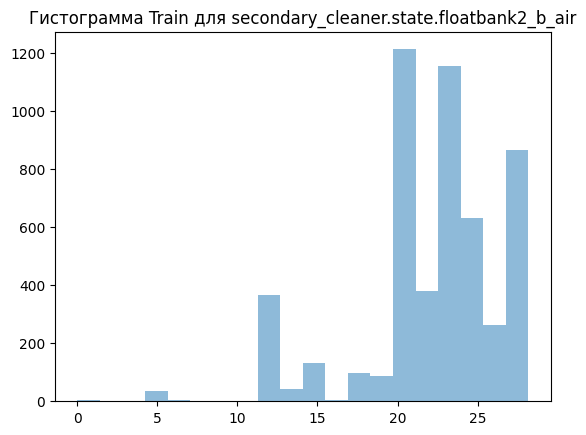

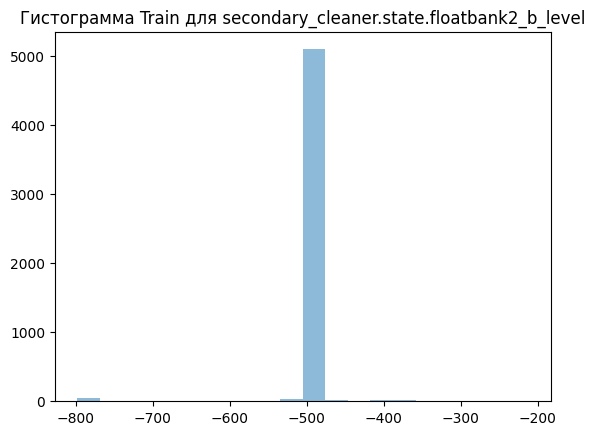

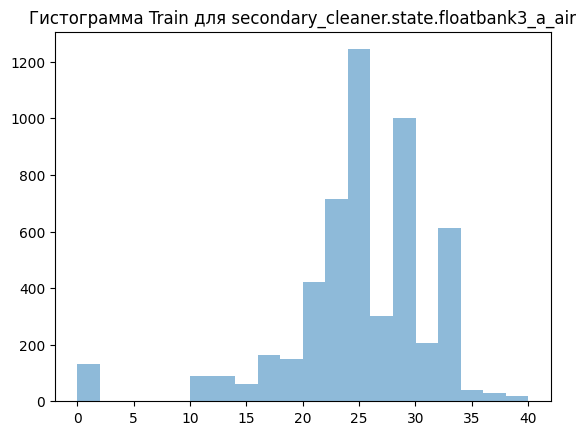

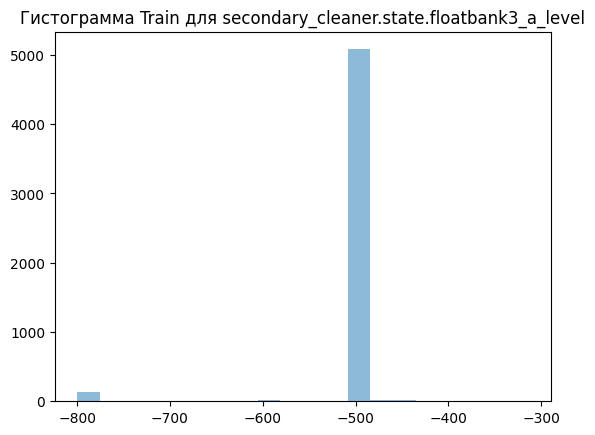

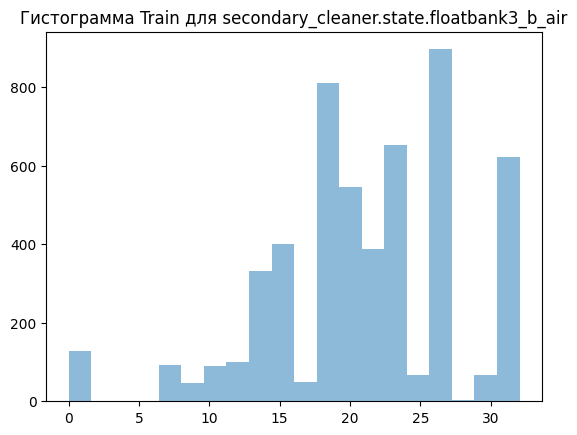

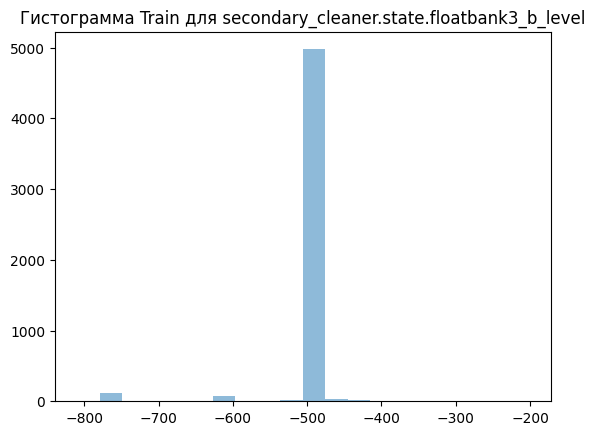

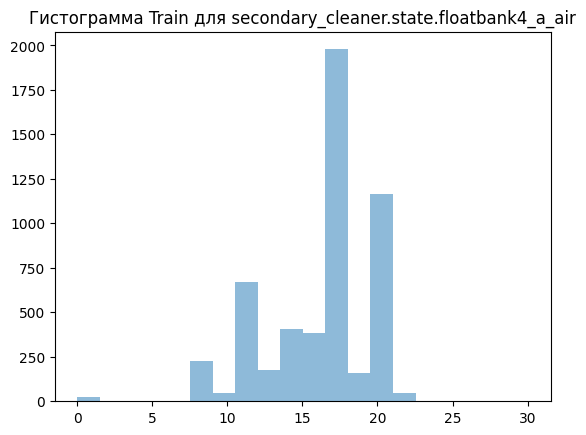

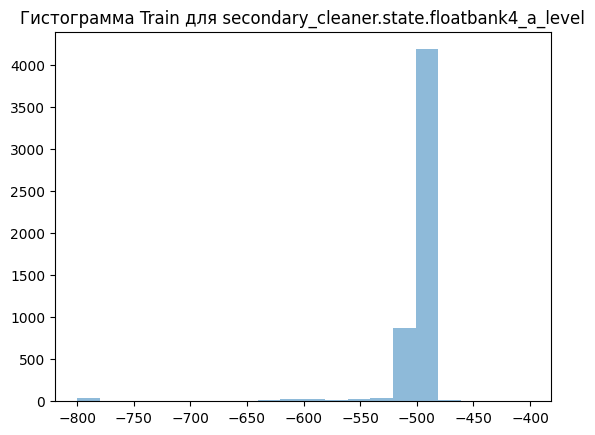

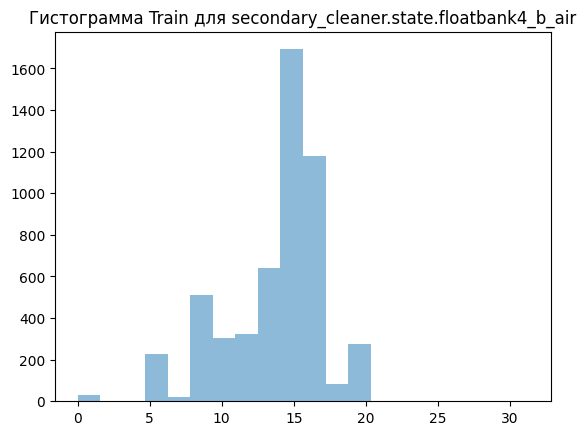

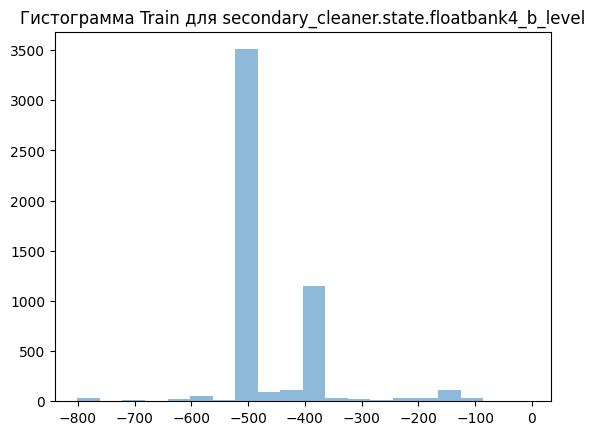

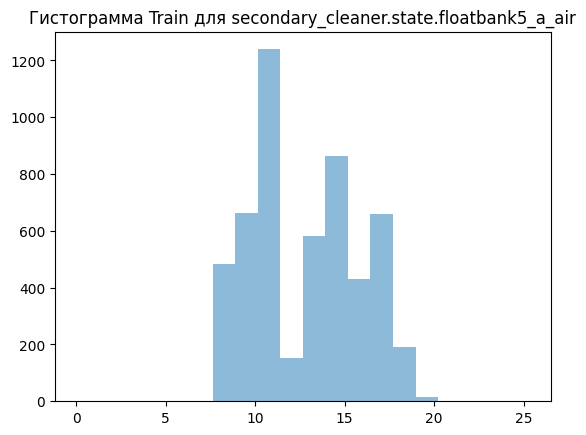

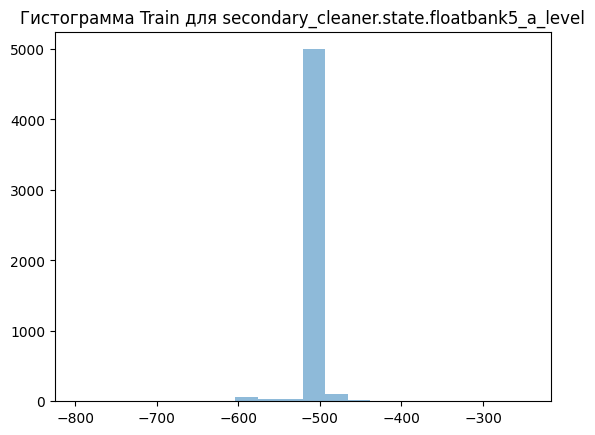

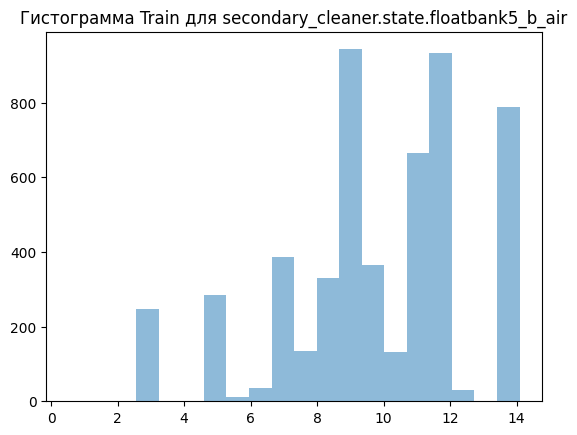

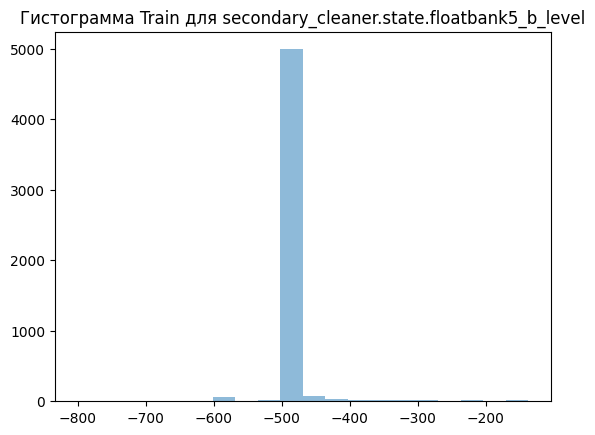

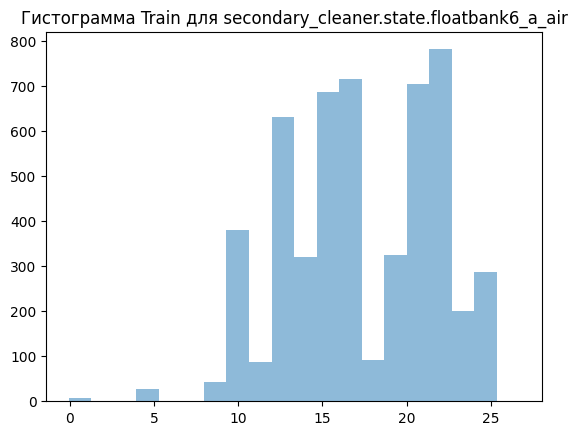

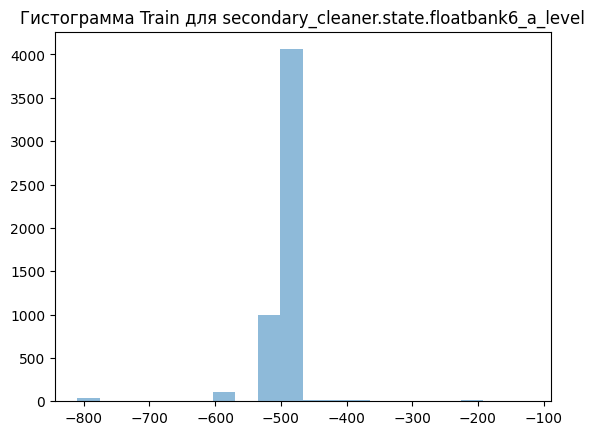

In [ ]:
for column in test.columns:
    plt.hist(test[column], bins=20, alpha=0.5)
    plt.title(f'Гистограмма Train для {column}')
    plt.show()

> Test

---
* Размер датасета: (Строк: 5290, колонок: 52)
* Тип данных: Float64
* Есть nan-ы, их мало
* Есть коррелирующие признаки
* Дубликатов нет

> Смотрим датафрейм full

Размер датасета: (19439, 86)


final.output.concentrate_ag  final.output.concentrate_pb  \
date                                                                            
2016-01-15 00:00:00                     6.055403                     9.889648   
2016-01-15 01:00:00                     6.029369                     9.968944   
2016-01-15 02:00:00                     6.055926                    10.213995   
2016-01-15 03:00:00                     6.047977                     9.977019   
2016-01-15 04:00:00                     6.148599                    10.142511   

                     final.output.concentrate_sol  \
date                                                
2016-01-15 00:00:00                      5.507324   
2016-01-15 01:00:00                      5.257781   
2016-01-15 02:00:00                      5.383759   
2016-01-15 03:00:00                      4.858634   
2016-01-15 04:00:00                      4.939416   

                     final.output.concentrate_au  final.output.recovery  \
date                                                                      
2016-01-15 00:00:00                    42.192020              70.541216   
2016-01-15 01:00:00                    42.701629              69.266198   
2016-01-15 02:00:00                    42.657501              68.116445   
2016-01-15 03:00:00                    42.689819              68.347543   
2016-01-15 04:00:00                    42.774141              66.927016   

                     final.output.tail_ag  final.output.tail_pb  \
date                                                              
2016-01-15 00:00:00             10.411962              0.895447   
2016-01-15 01:00:00             10.462676              0.927452   
2016-01-15 02:00:00             10.507046              0.953716   
2016-01-15 03:00:00             10.422762              0.883763   
2016-01-15 04:00:00             10.360302              0.792826   

                     final.output.tail_sol  final.output.tail_au  \
date                                                               
2016-01-15 00:00:00              16.904297              2.143149   
2016-01-15 01:00:00              16.634514              2.224930   
2016-01-15 02:00:00              16.208849              2.257889   
2016-01-15 03:00:00              16.532835              2.146849   
2016-01-15 04:00:00              16.525686              2.055292   

                     primary_cleaner.input.sulfate  \
date                                                 
2016-01-15 00:00:00                     127.092003   
2016-01-15 01:00:00                     125.629232   
2016-01-15 02:00:00                     123.819808   
2016-01-15 03:00:00                     122.270188   
2016-01-15 04:00:00                     117.988169   

                     primary_cleaner.input.depressant  \
date                                                    
2016-01-15 00:00:00                         10.128295   
2016-01-15 01:00:00                         10.296251   
2016-01-15 02:00:00                         11.316280   
2016-01-15 03:00:00                         11.322140   
2016-01-15 04:00:00                         11.913613   

                     primary_cleaner.input.feed_size  \
date                                                   
2016-01-15 00:00:00                             7.25   
2016-01-15 01:00:00                             7.25   
2016-01-15 02:00:00                             7.25   
2016-01-15 03:00:00                             7.25   
2016-01-15 04:00:00                             7.25   

                     primary_cleaner.input.xanthate  \
date                                                  
2016-01-15 00:00:00                        0.988759   
2016-01-15 01:00:00                        1.002663   
2016-01-15 02:00:00                        0.991265   
2016-01-15 03:00:00                        0.996739   
2016-01-15 04:00:00                        1.009869   

                     primary_cleaner.output.concen

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19439 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         19438 non-null  float64
 1   final.output.concentrate_pb                         19438 non-null  float64
 2   final.output.concentrate_sol                        19228 non-null  float64
 3   final.output.concentrate_au                         19439 non-null  float64
 4   final.output.recovery                               19439 non-null  float64
 5   final.output.tail_ag                                19438 non-null  float64
 6   final.output.tail_pb                                19338 non-null  float64
 7   final.output.tail_sol                               19433 non-null  float64
 8   final.output.tail_au                     

final.output.concentrate_ag  \
final.output.concentrate_ag                                            1.000000   
final.output.concentrate_pb                                            0.063570   
final.output.concentrate_sol                                           0.380142   
final.output.concentrate_au                                           -0.038373   
final.output.recovery                                                  0.185952   
final.output.tail_ag                                                   0.334596   
final.output.tail_pb                                                  -0.051855   
final.output.tail_sol                                                  0.028890   
final.output.tail_au                                                   0.206569   
primary_cleaner.input.sulfate                                          0.071158   
primary_cleaner.input.depressant                                       0.127827   
primary_cleaner.input.feed_size                                        0.040543   
primary_cleaner.input.xanthate                                         0.127175   
primary_cleaner.output.concentrate_ag                                  0.509877   
primary_cleaner.output.concentrate_pb                                 -0.152814   
primary_cleaner.output.concentrate_sol                                 0.332771   
primary_cleaner.output.concentrate_au                                 -0.200367   
primary_cleaner.output.tail_ag                                         0.043138   
primary_cleaner.output.tail_pb                                        -0.023182   
primary_cleaner.output.tail_sol                                        0.175824   
primary_cleaner.output.tail_au                                         0.163903   
primary_cleaner.state.floatbank8_a_air                                 0.175978   
primary_cleaner.state.floatbank8_a_level                               0.039789   
primary_cleaner.state.floatbank8_b_air                                 0.194615   
primary_cleaner.state.floatbank8_b_level                               0.058284   
primary_cleaner.state.floatbank8_c_air                                 0.154360   
primary_cleaner.state.floatbank8_c_level                               0.036542   
primary_cleaner.state.floatbank8_d_air                                 0.110360   
primary_cleaner.state.floatbank8_d_level                              -0.001388   
rougher.calculation.sulfate_to_au_concentrate                         -0.014190   
rougher.calculation.floatbank10_sulfate_to_au_feed                    -0.034702   
rougher.calculation.floatbank11_sulfate_to_au_feed                    -0.039130   
rougher.calculation.au_pb_ratio                                        0.158668   
rougher.input.feed_ag                                                  0.456279   
rougher.input.feed_pb                                                  0.074866   
rougher.input.feed_rate                                               -0.167154   
rougher.input.feed_size                                               -0.043895   
rougher.input.feed_sol                                                -0.036783   
rougher.input.feed_au                                                  0.315817   
rougher.input.floatbank10_sulfate                                     -0.096561   
rougher.input.floatbank10_xanthate                                     0.093678   
rougher.input.floatbank11_sulfate                                     -0.113477   
rougher.input.floatbank11_xanthate                                     0.114032   
rougher.output.concentrate_ag                                          0.315558   
rougher.output.concentrate_pb                                         -0.127291   
rougher.output.concentrate_sol                                        -0.018497   
rougher.output.concentrate_au                                          0.044347   
rougher.output.recovery                                             


Количество дубликатов 0


final.output.concentrate_ag  final.output.concentrate_pb  \
count                 19438.000000                 19438.000000   
mean                      5.168470                     9.978895   
std                       1.372348                     1.669240   
min                       0.000000                     0.000000   
25%                       4.251240                     9.137262   
50%                       5.066094                    10.102433   
75%                       5.895527                    11.035769   
max                      16.001945                    17.031899   

       final.output.concentrate_sol  final.output.concentrate_au  \
count                  19228.000000                 19439.000000   
mean                       9.501224                    44.076513   
std                        2.787537                     5.129784   
min                        0.000000                     0.000000   
25%                        7.722820                    43.402215   
50%                        9.218961                    45.011244   
75%                       10.947813                    46.275313   
max                       19.615720                    52.756638   

       final.output.recovery  final.output.tail_ag  final.output.tail_pb  \
count           19439.000000          19438.000000          19338.000000   
mean               67.050208              9.688589              2.705795   
std                10.125840              2.328642              0.949077   
min                 0.000000              0.000000              0.000000   
25%                63.299712              8.062878              2.040119   
50%                68.172738              9.743623              2.748730   
75%                72.686642             11.134294              3.333216   
max               100.000000             19.552149              5.804178   

       final.output.tail_sol  final.output.tail_au  \
count           19433.000000          19439.000000   
mean               10.583728              3.042467   
std                 2.868782              0.922808   
min                 0.000000              0.000000   
25%                 8.938947              2.461138   
50%                10.622456              2.984909   
75%                12.104271              3.571351   
max                22.317730              8.245022   

       primary_cleaner.input.sulfate  primary_cleaner.input.depressant  \
count                   19415.000000                      19402.000000   
mean                      144.624774                          8.817039   
std                        44.464071                          3.286186   
min                         0.003112                          0.000000   
25%                       114.107029                          6.076909   
50%                       143.232103                          8.038311   
75%                       175.075656                         11.013521   
max                       265.983123                         40.000000   

       primary_cleaner.input.feed_size  primary_cleaner.input.xanthate  \
count                     19439.000000                    19335.000000   
mean                          7.307078                        1.021795   
std                           0.613509                        0.513254   
min                           1.080000                        0.000005   
25%                           6.940000                        0.697224   
50%                           7.280000                        0.940863   
75%                           7.670000                        1.210990   
max                          15.500000                        4.102454   

       primary_cleaner.output.concentrate_ag  \
count                           19439.000000   
mean                                8.442408   
std                                 2.054465   
min                                 0.000000   
25%                                 7.263288

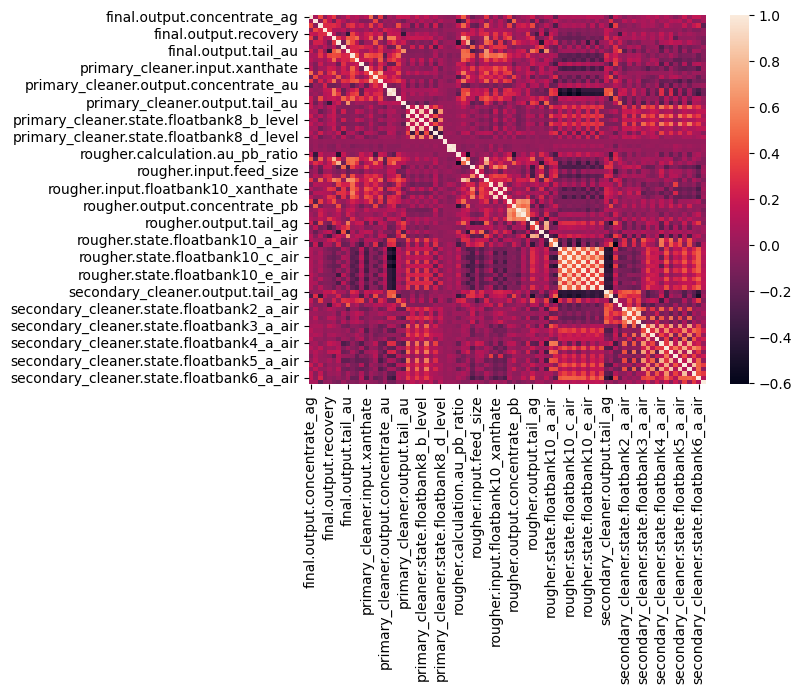

In [ ]:
view_information(full)

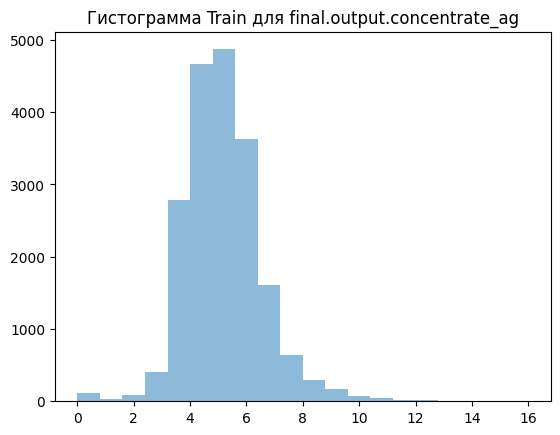

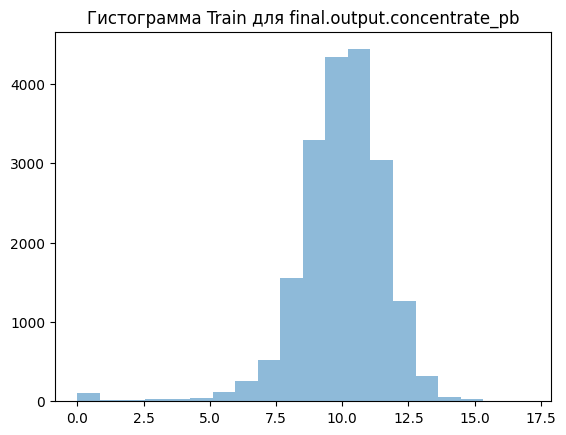

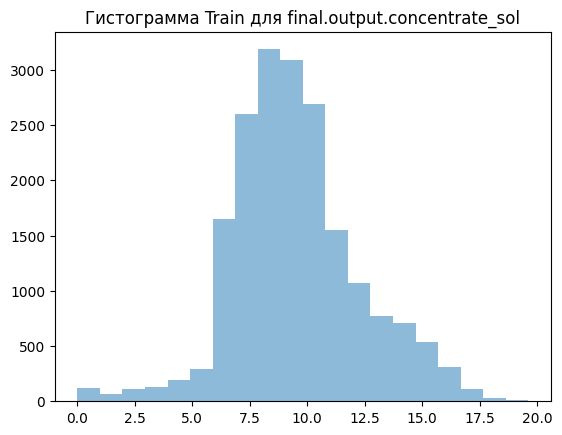

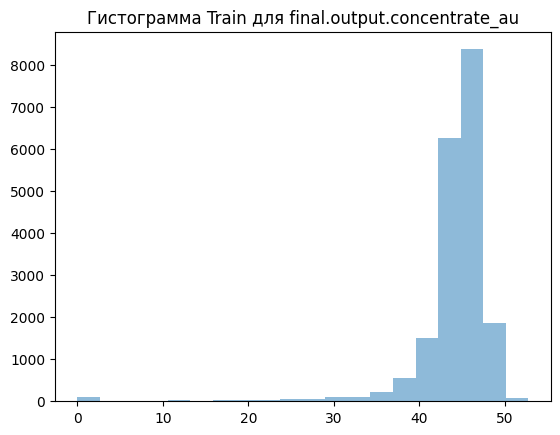

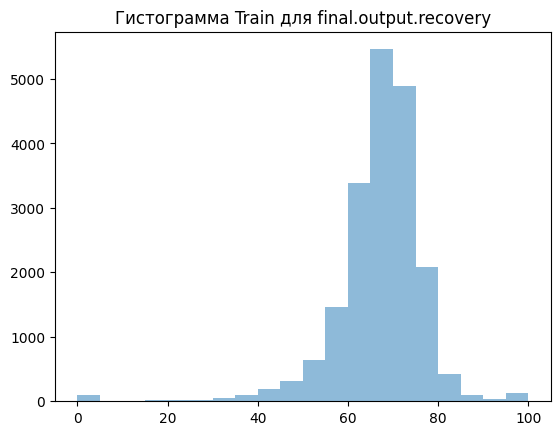

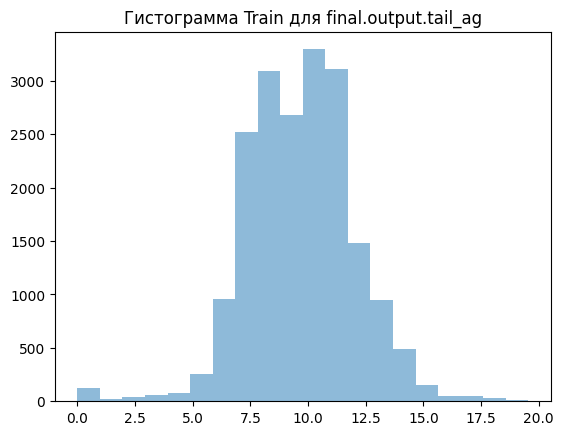

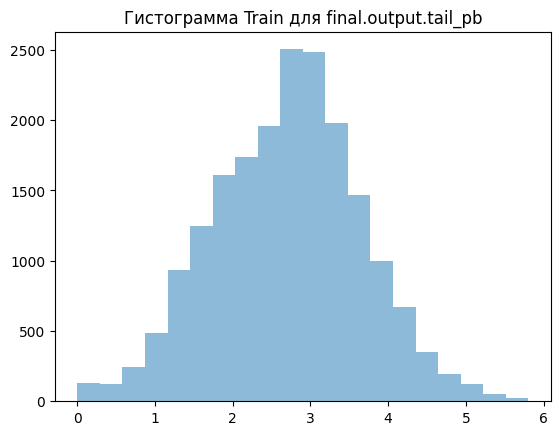

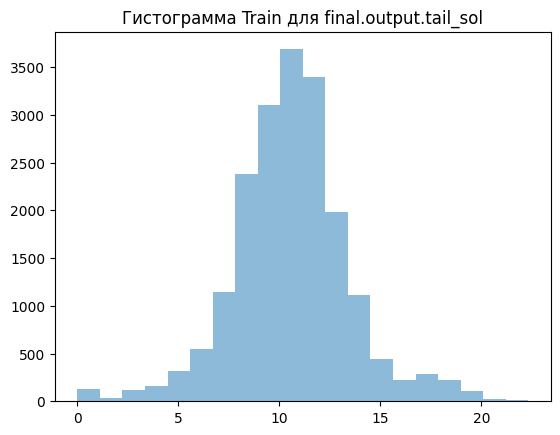

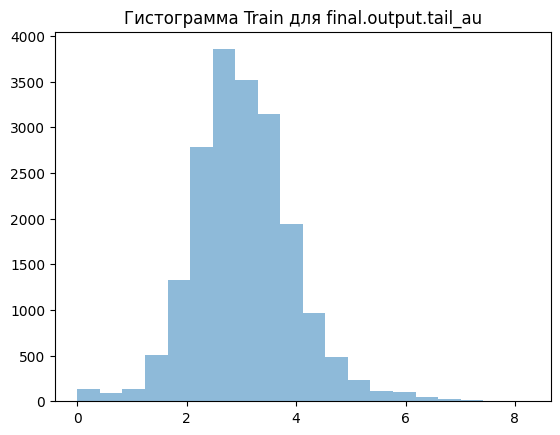

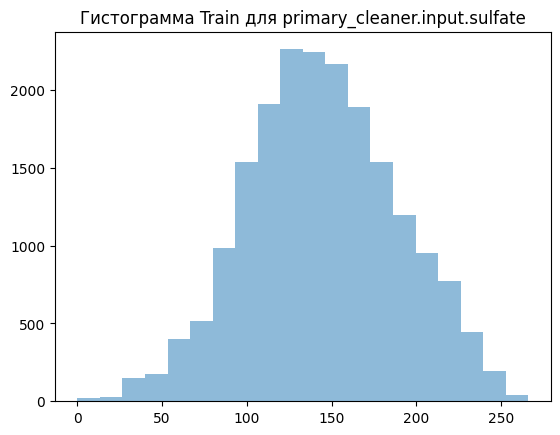

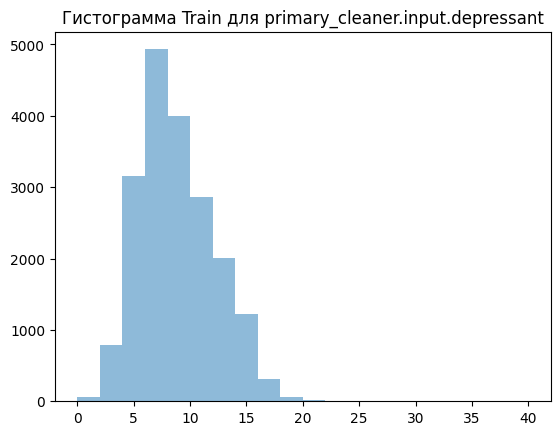

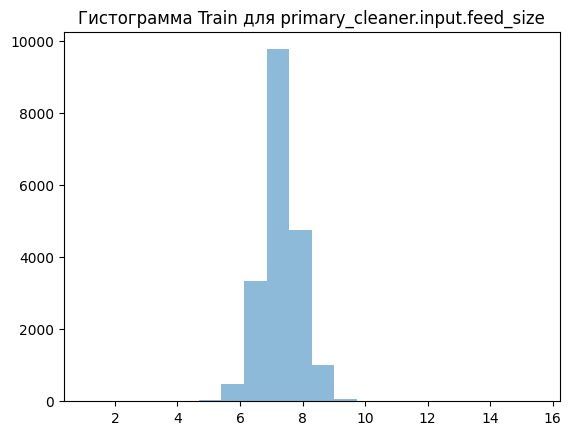

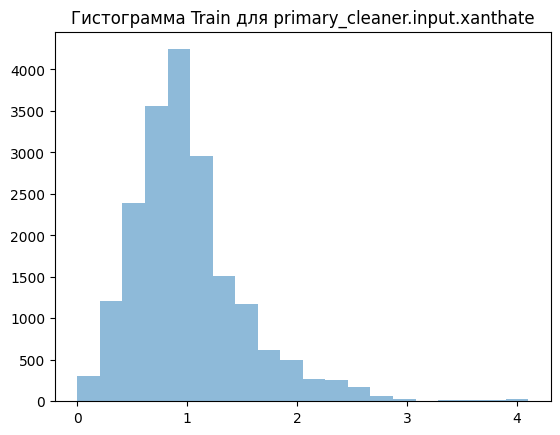

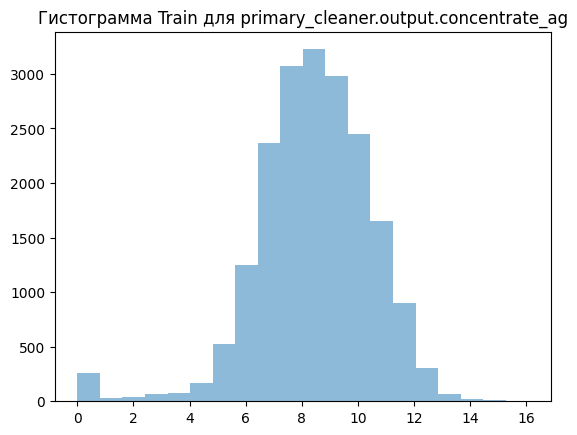

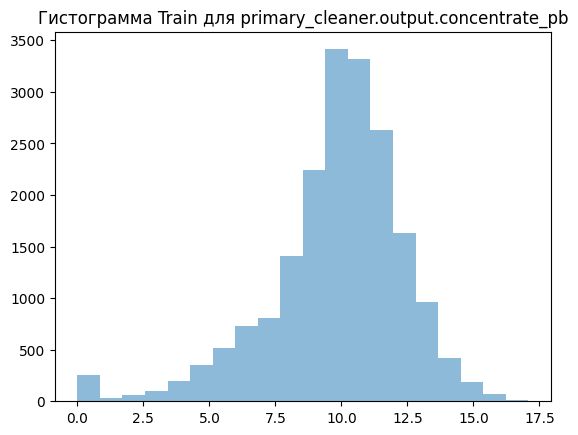

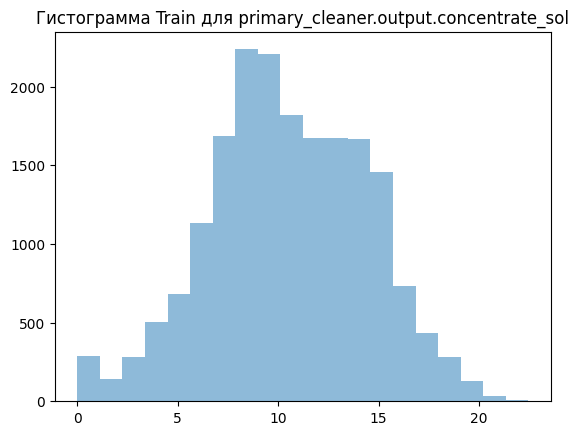

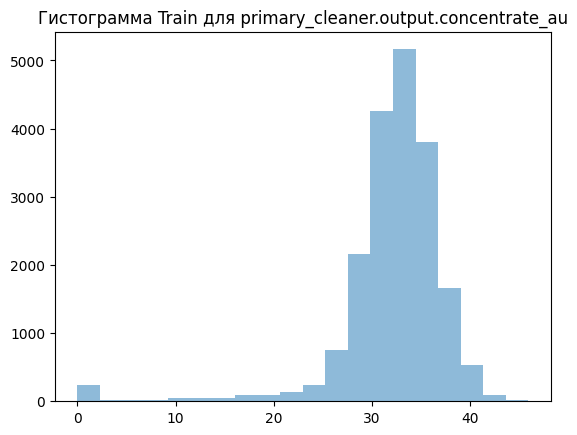

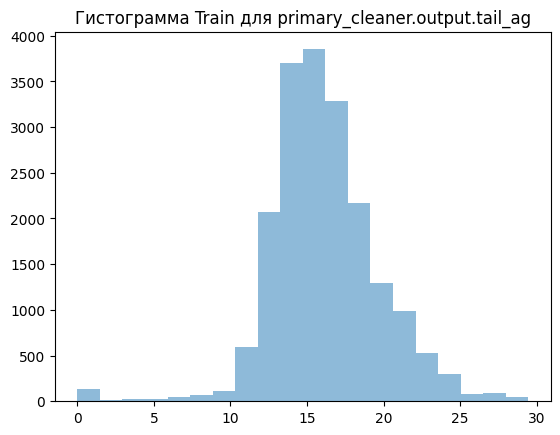

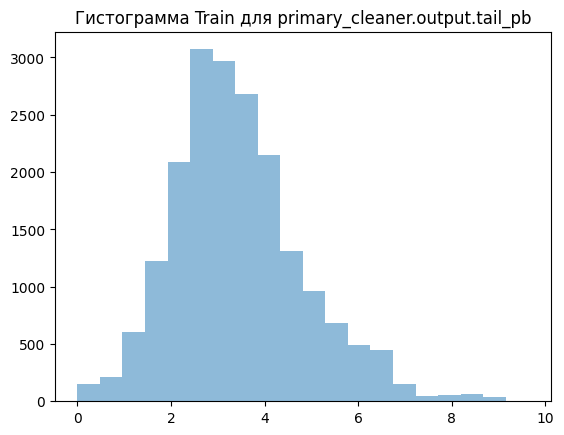

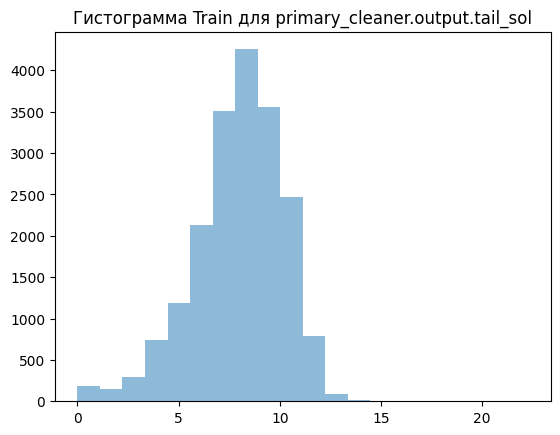

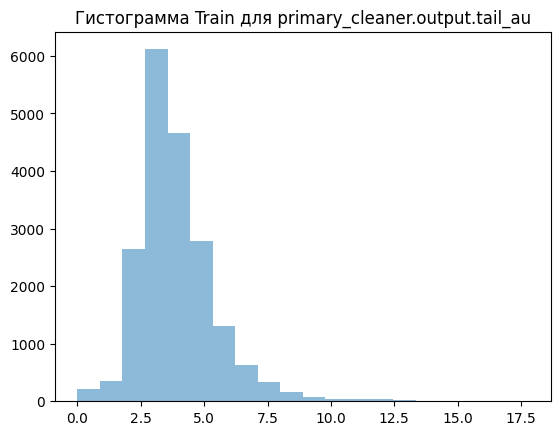

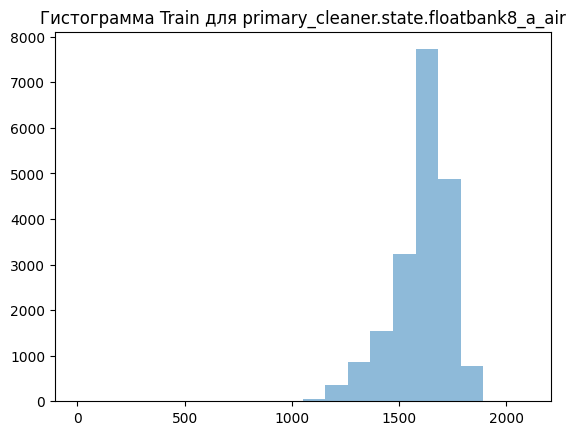

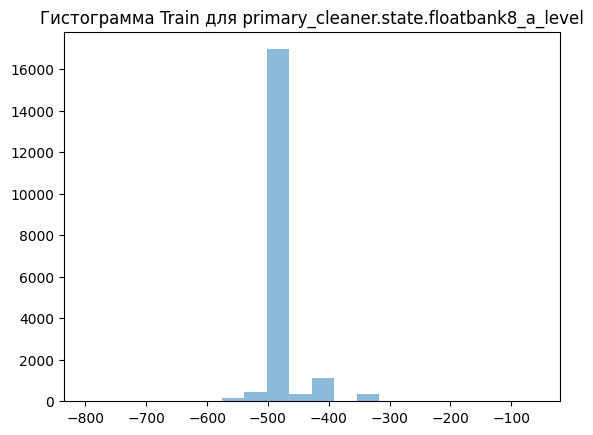

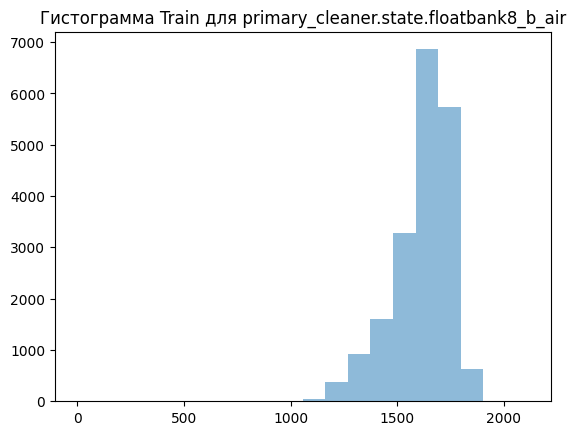

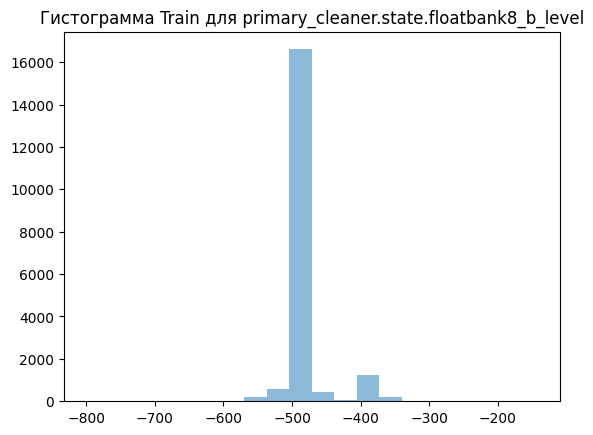

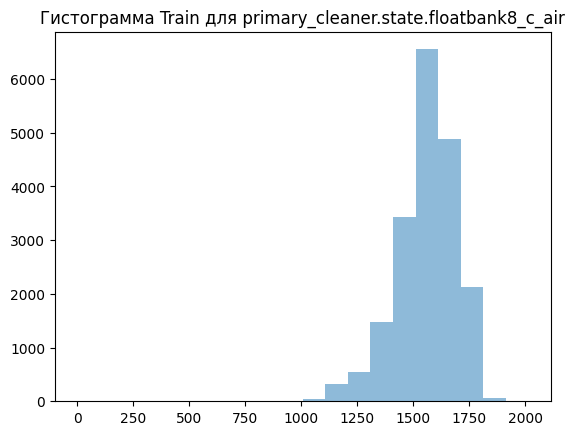

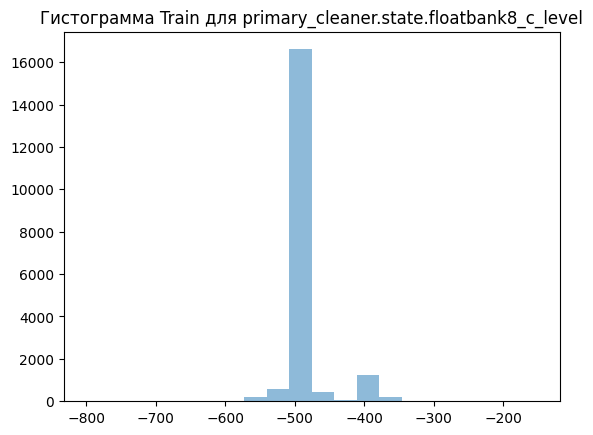

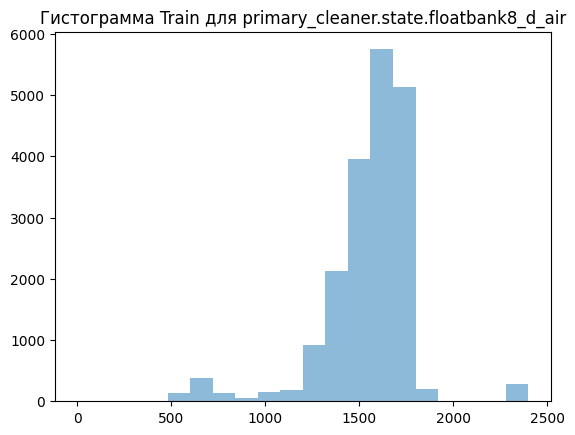

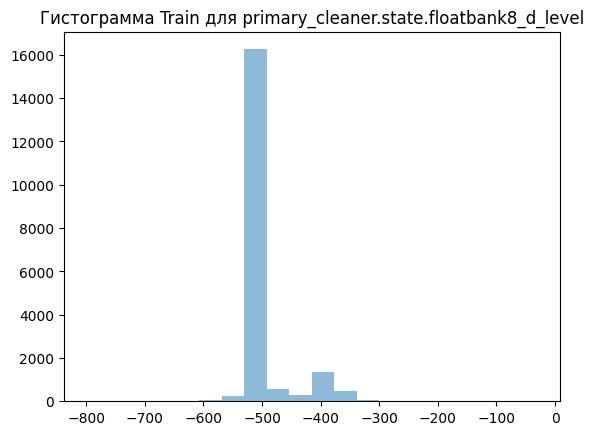

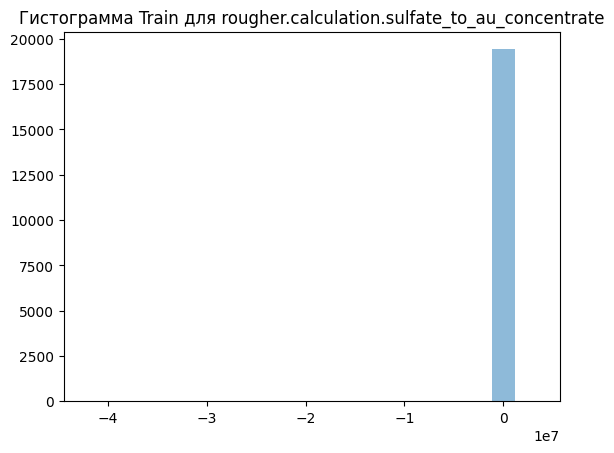

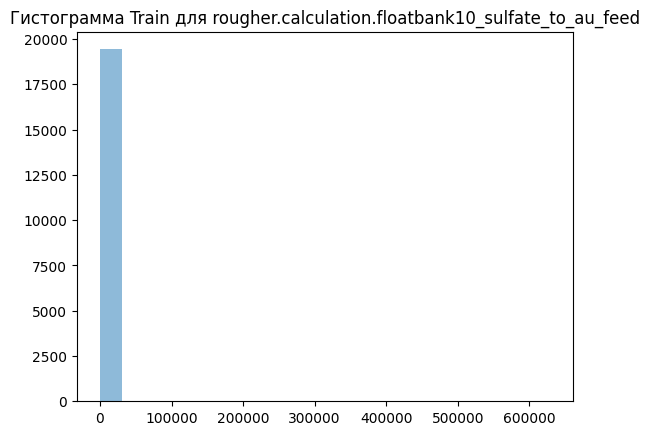

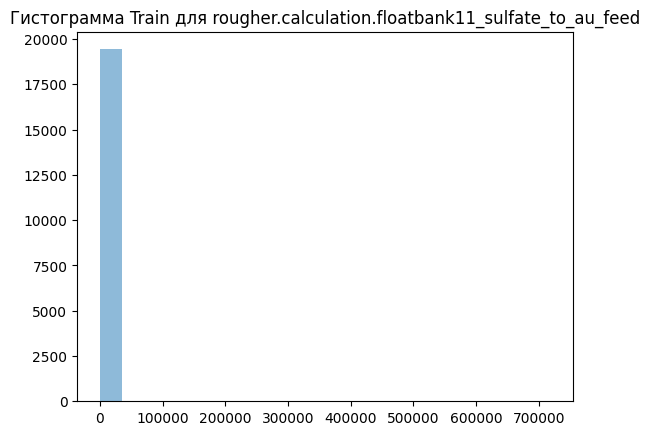

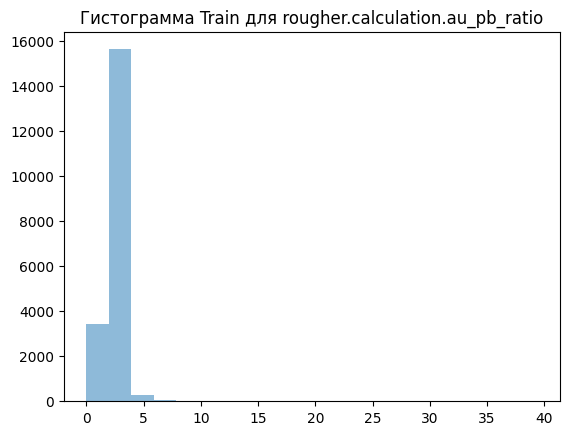

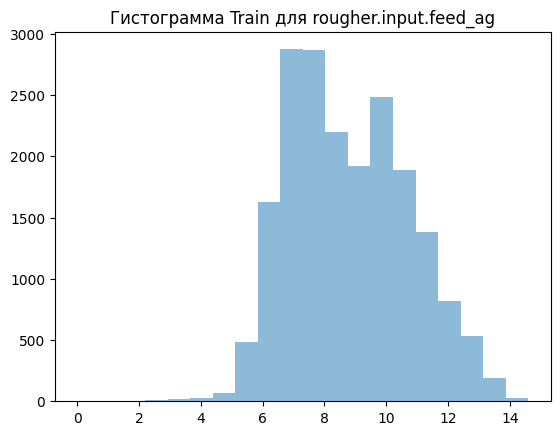

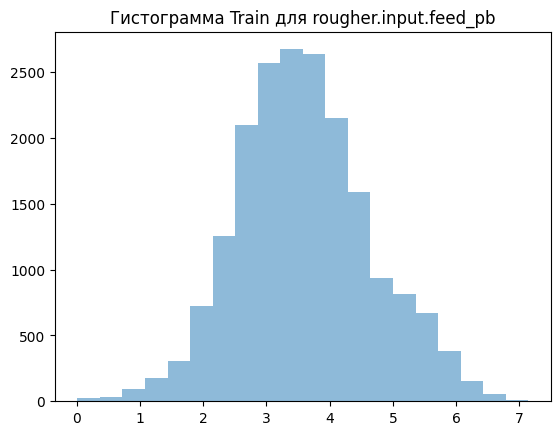

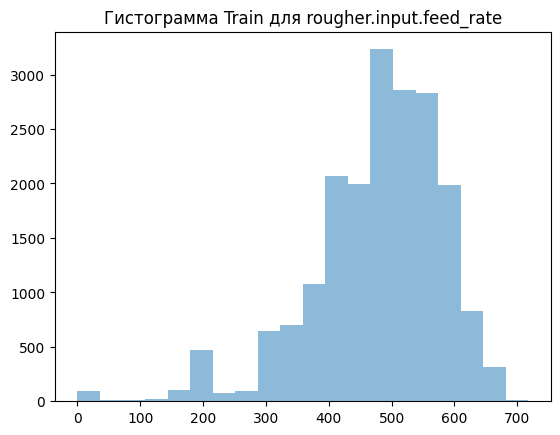

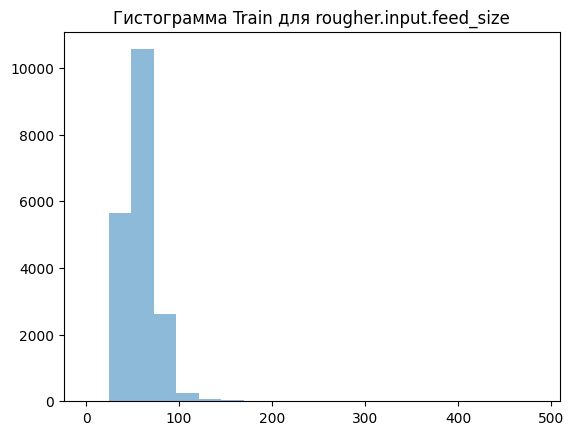

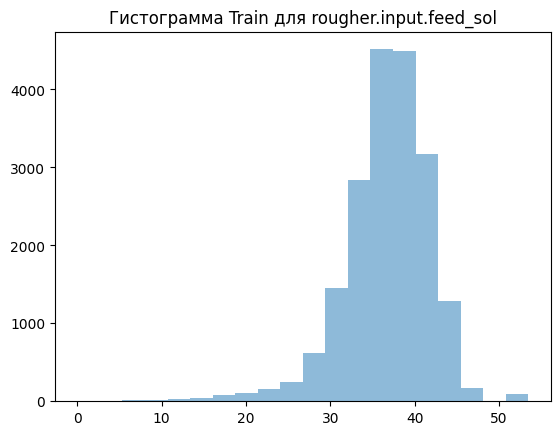

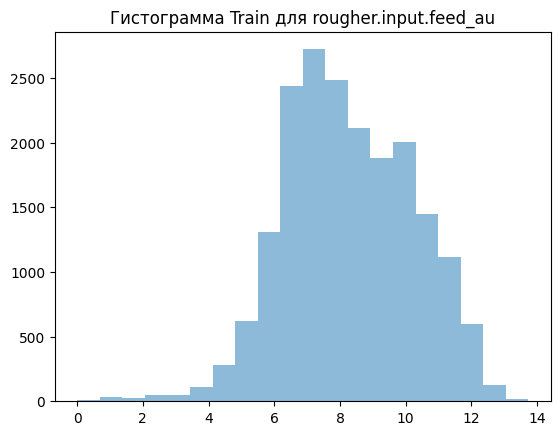

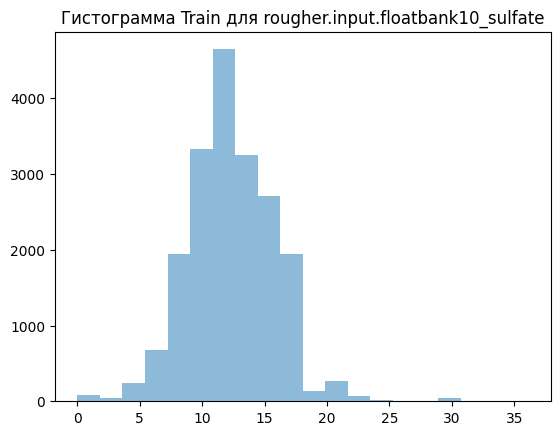

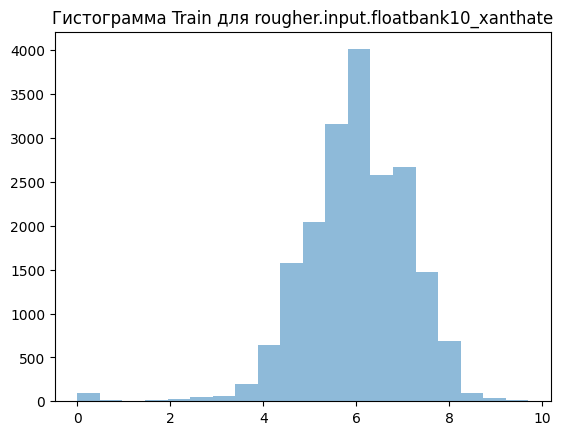

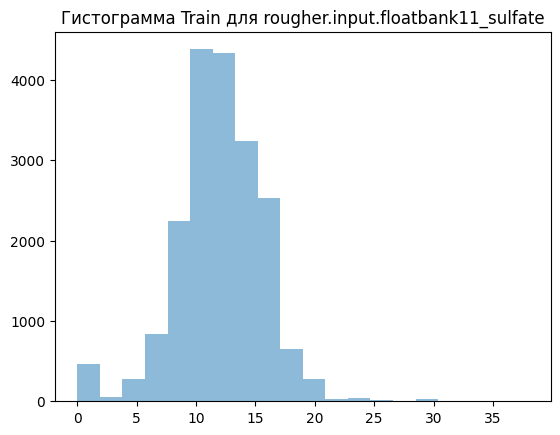

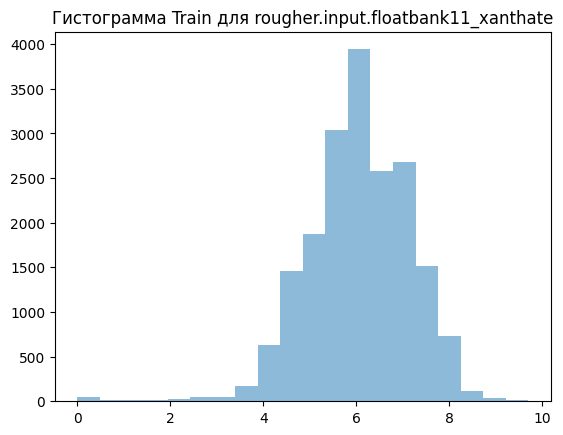

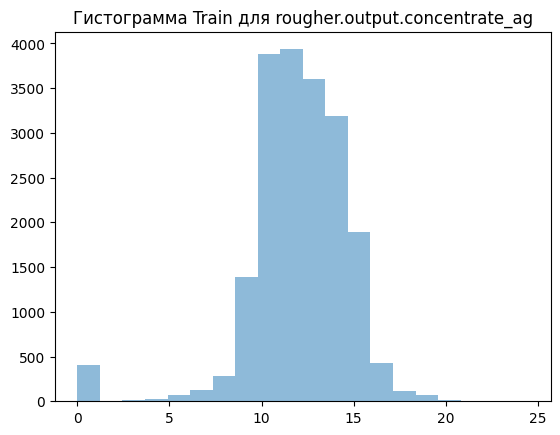

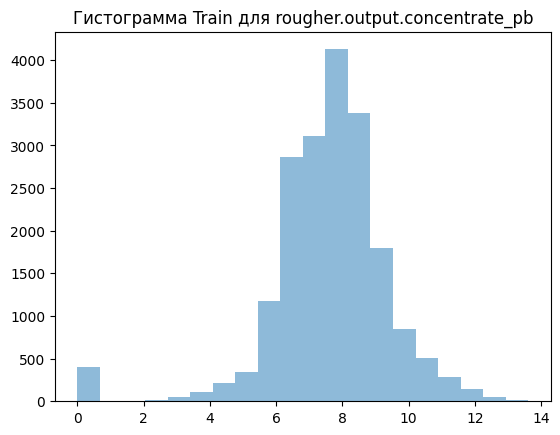

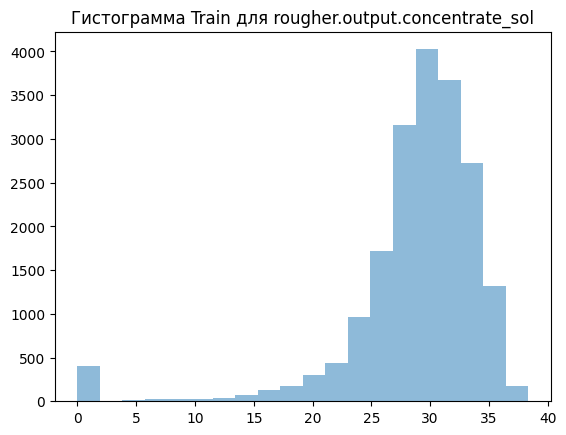

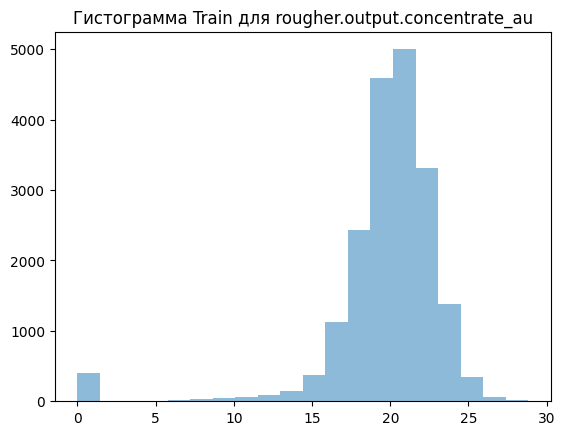

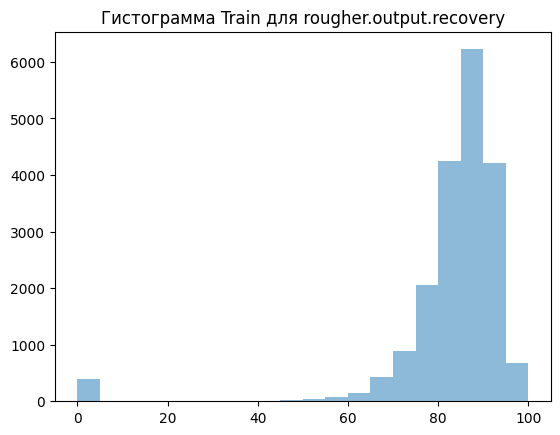

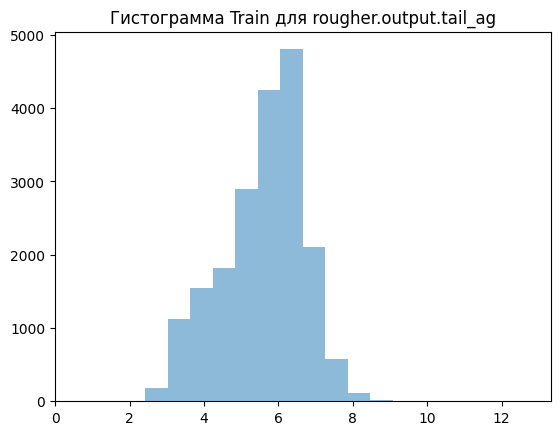

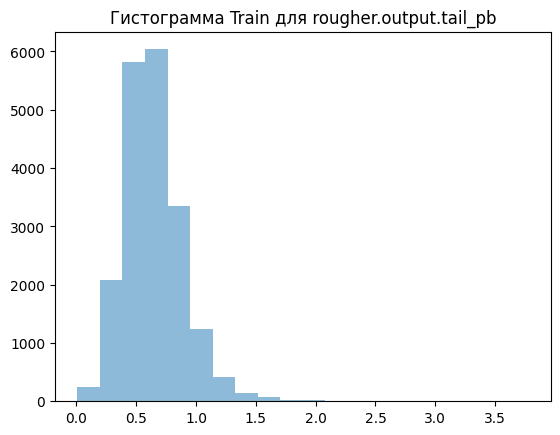

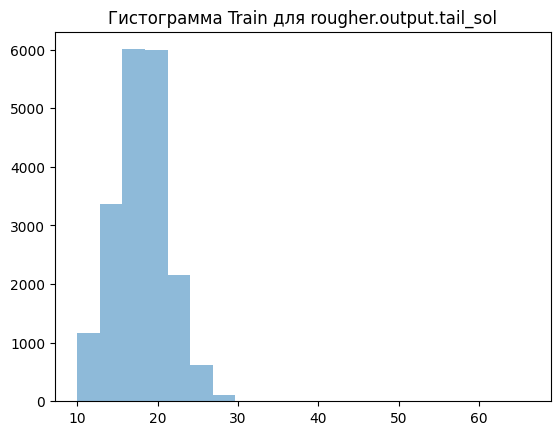

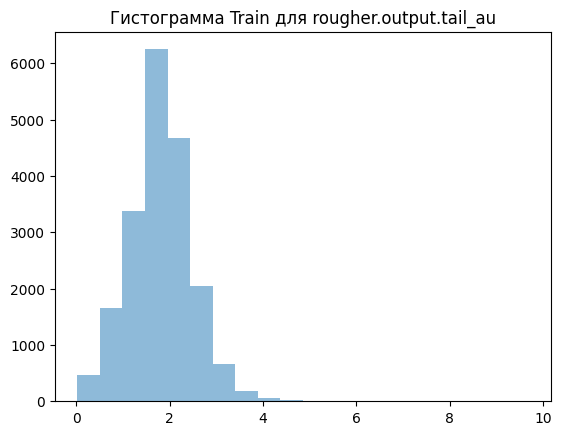

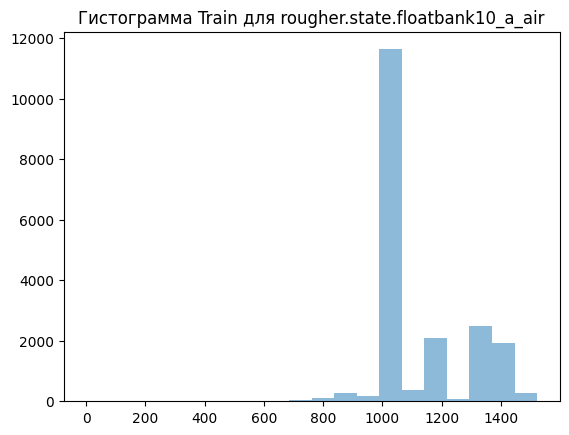

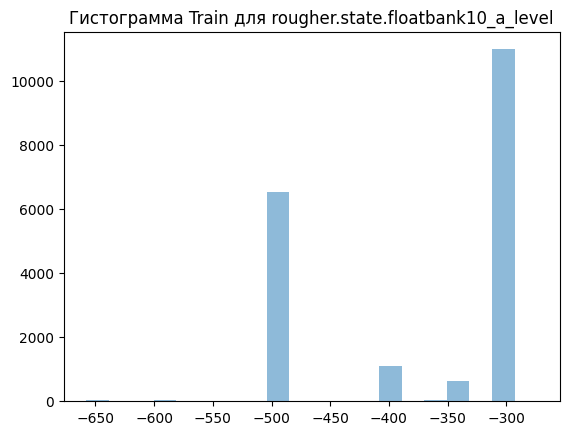

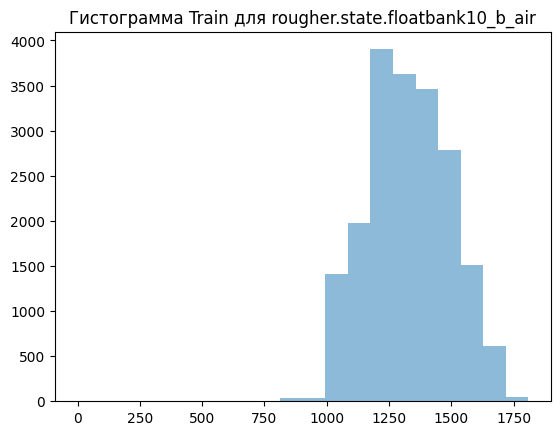

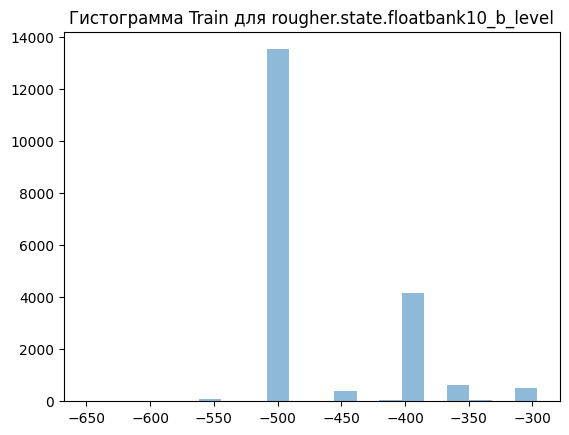

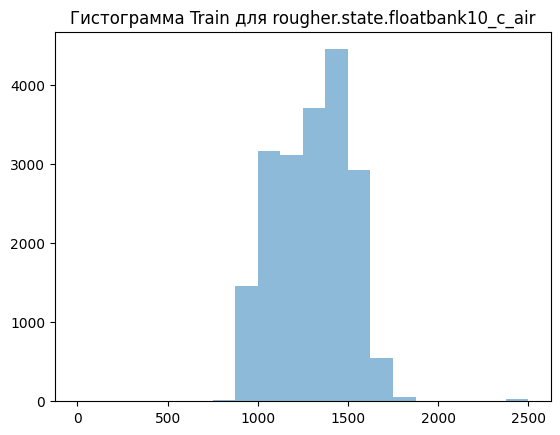

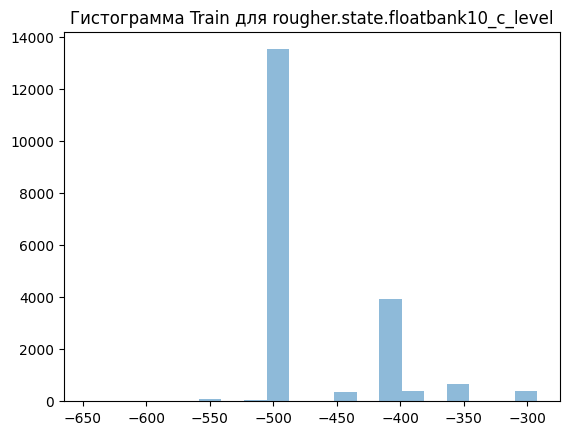

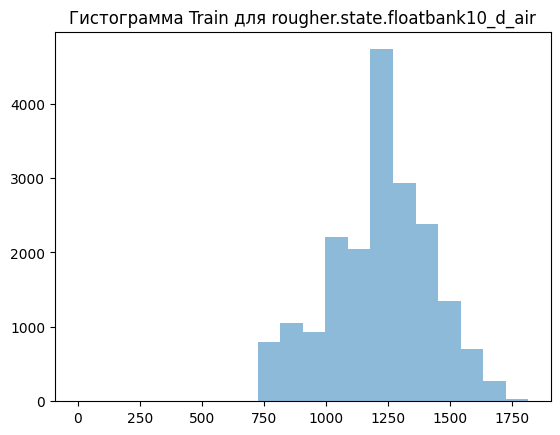

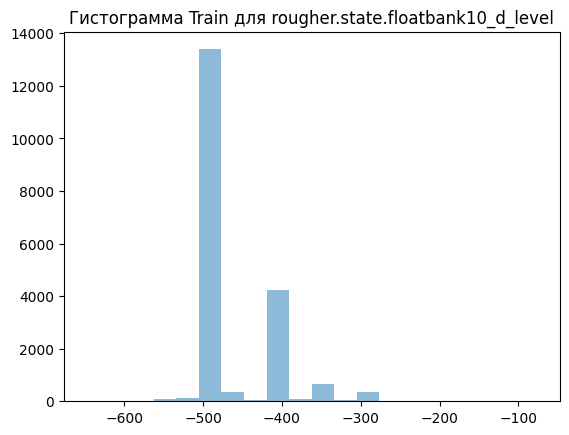

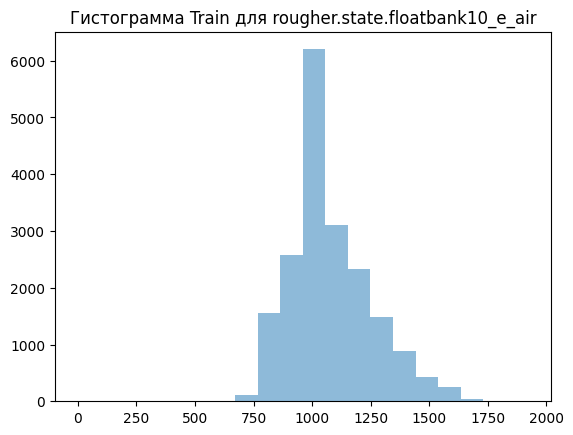

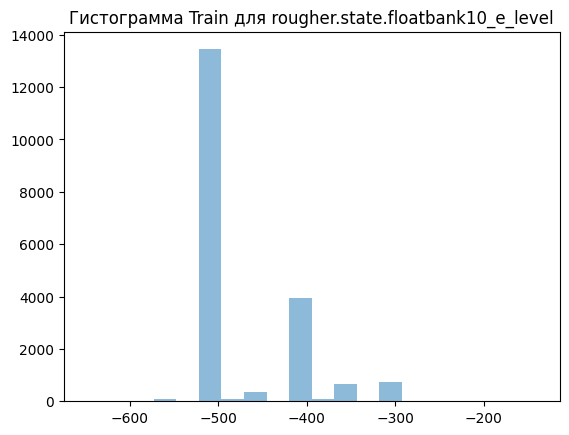

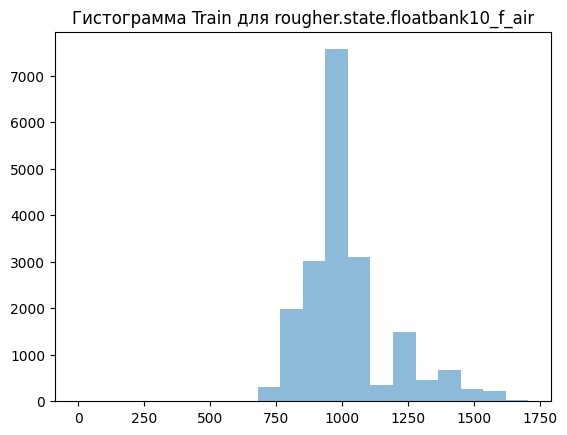

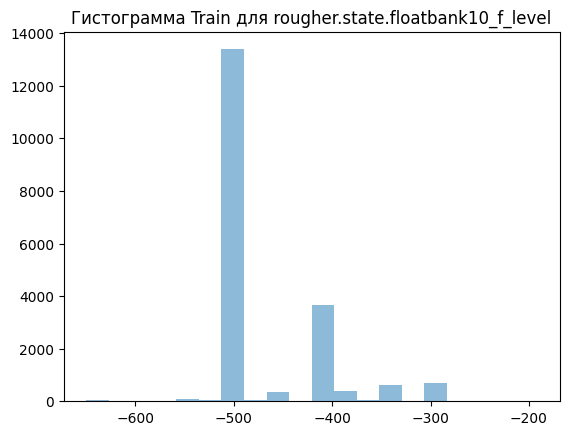

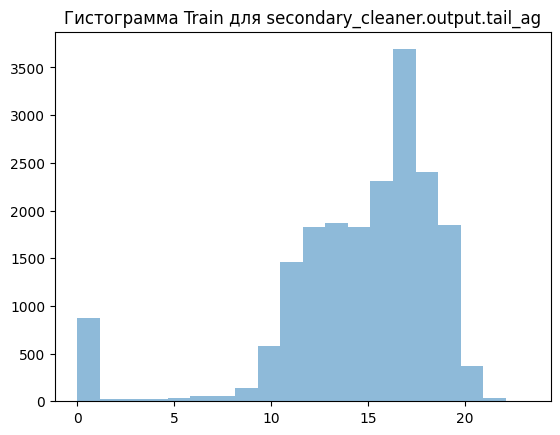

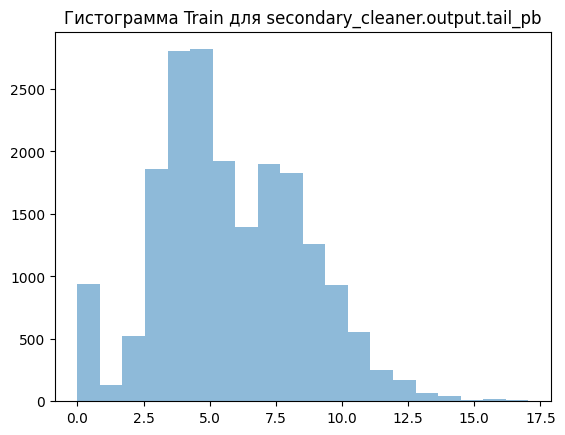

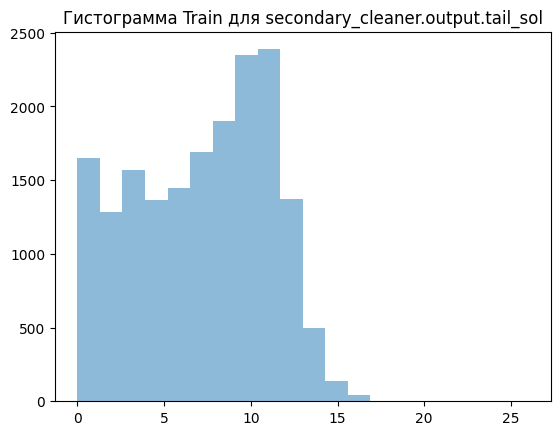

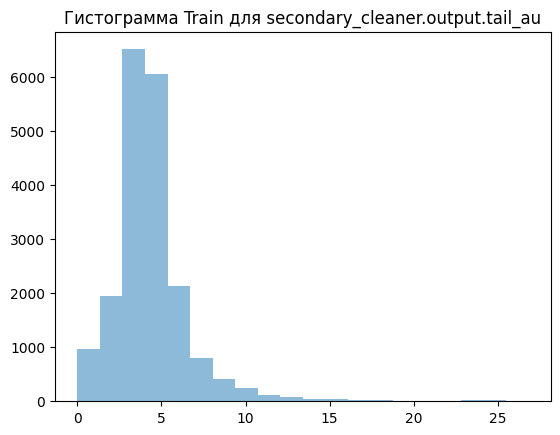

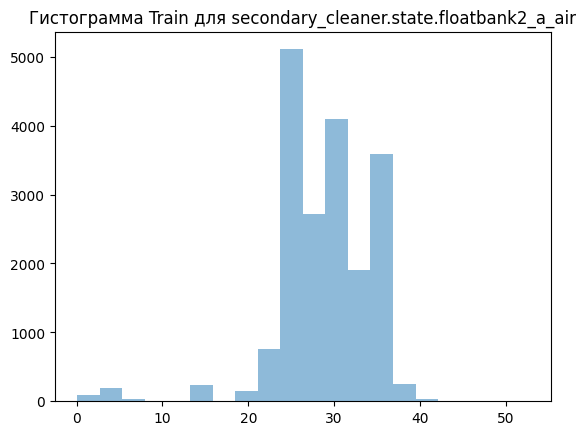

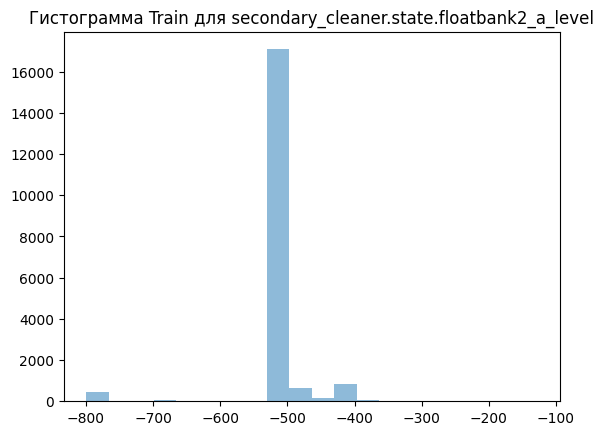

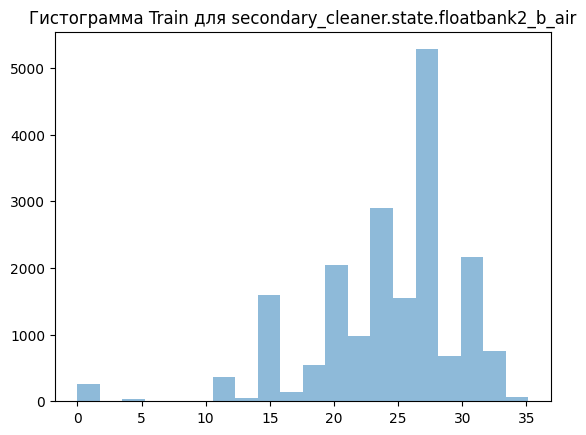

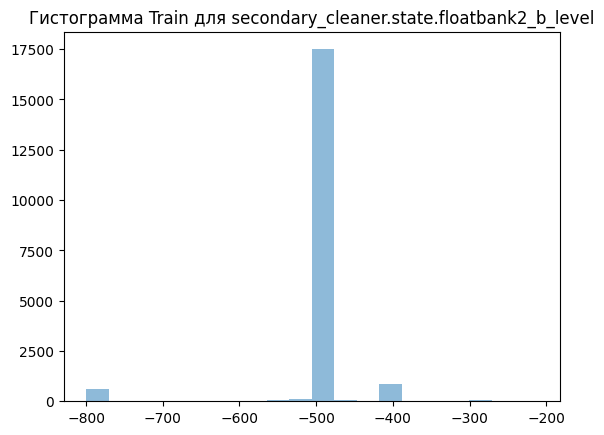

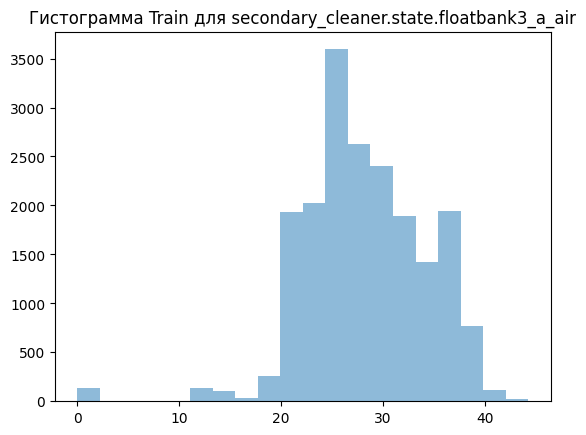

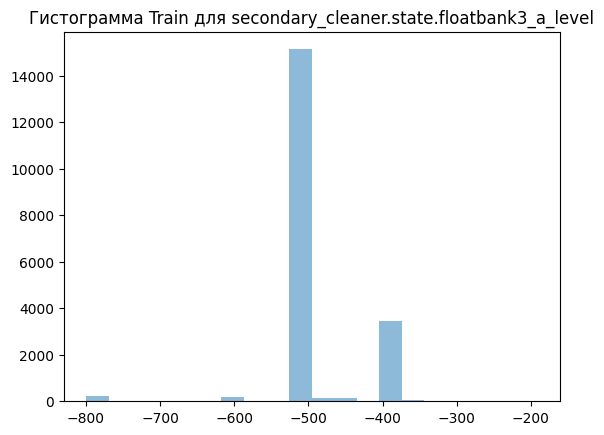

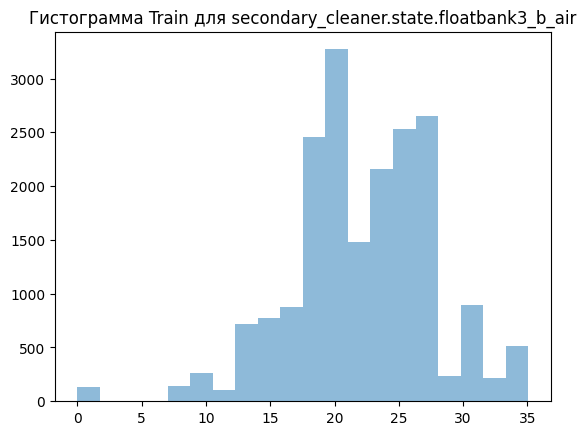

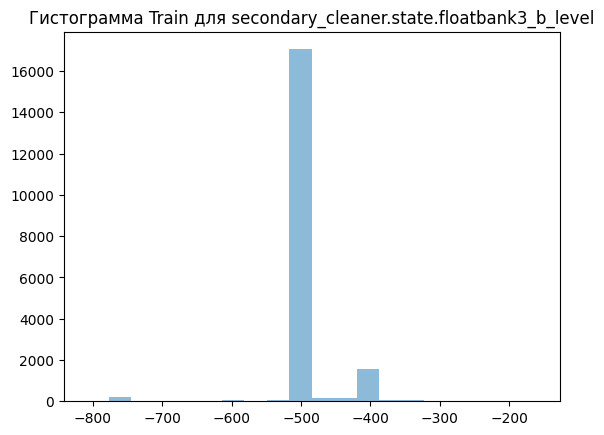

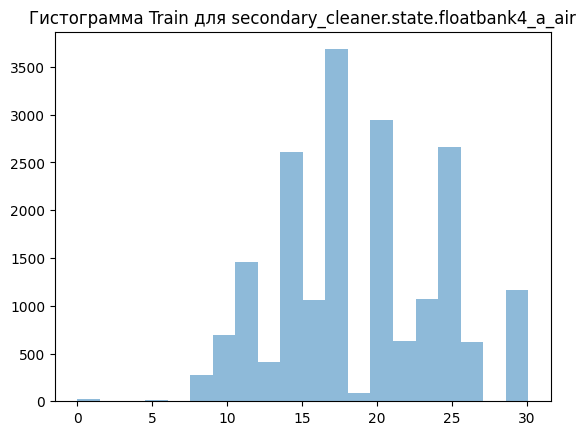

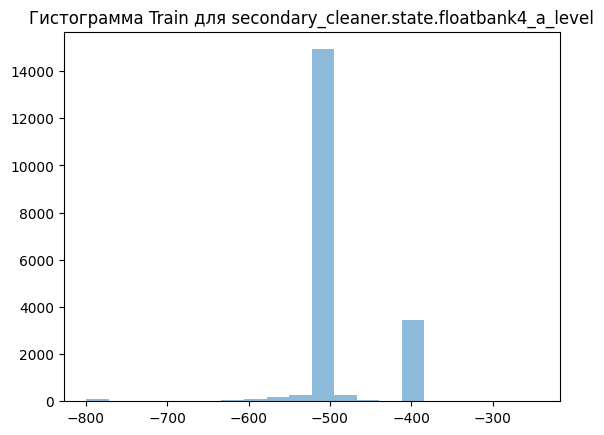

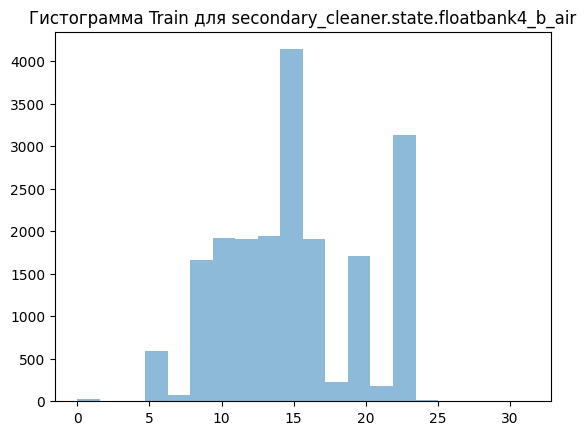

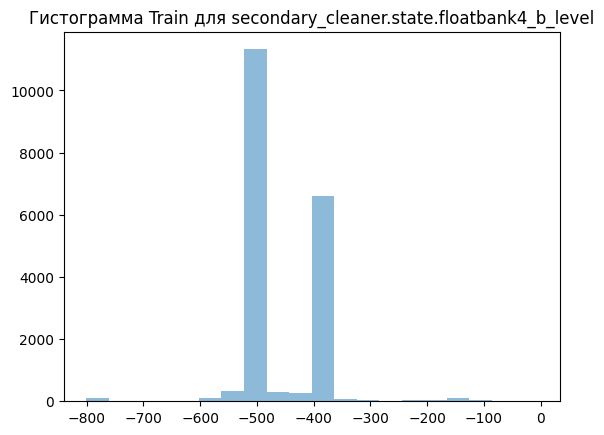

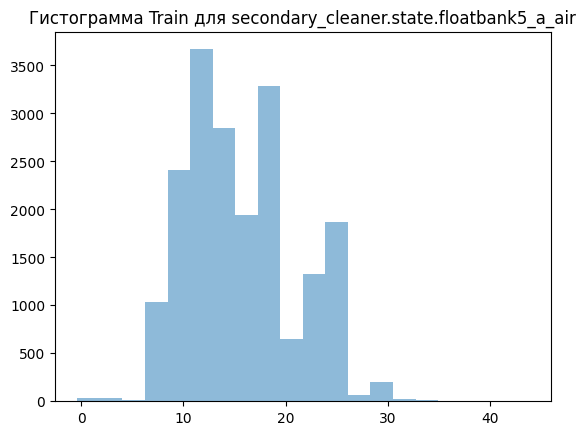

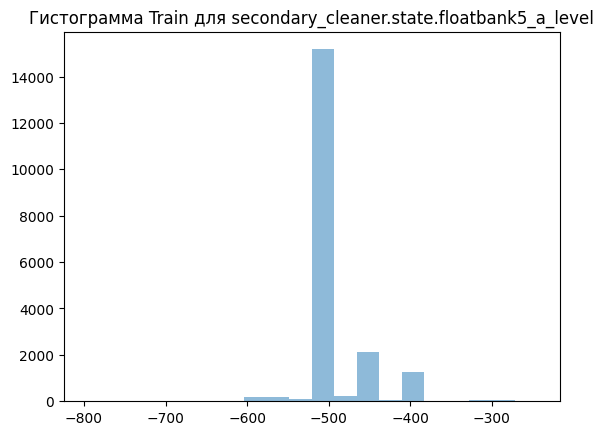

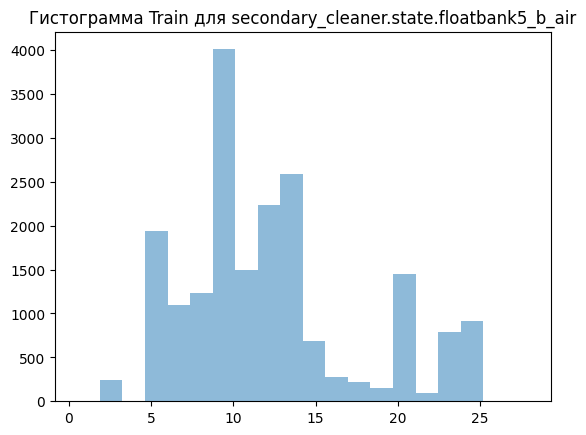

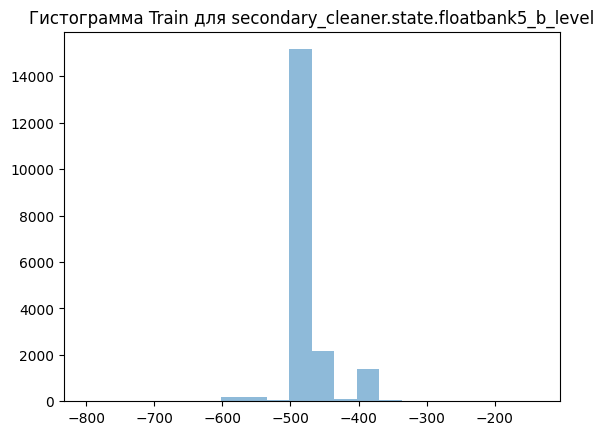

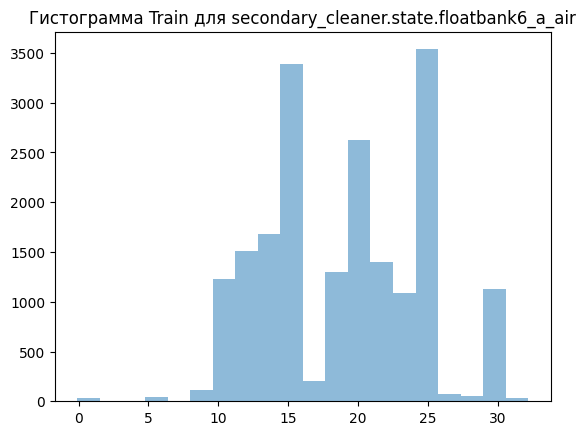

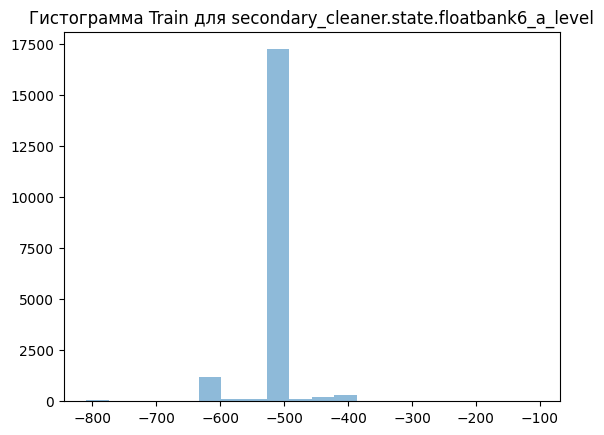

In [ ]:
for column in full.columns:
    plt.hist(full[column], bins=20, alpha=0.5)
    plt.title(f'Гистограмма Train для {column}')
    plt.show()

> Full

---
* Размер датасета: (Строк: 19439, колонок: 86)
* Тип данных: Float64
* Есть nan-ы
* Есть коррелирующие признаки
* Дубликатов нет

Задание: Проверьте, что эффективность обогащения рассчитана правильно. Вычислите её на обучающей выборке для признака rougher.output.recovery. Найдите MAE между вашими расчётами и значением признака. Опишите выводы.

In [ ]:
train.head(0)

Empty DataFrame
Columns: [final.output.concentrate_ag, final.output.concentrate_pb, final.output.concentrate_sol, final.output.concentrate_au, final.output.recovery, final.output.tail_ag, final.output.tail_pb, final.output.tail_sol, final.output.tail_au, primary_cleaner.input.sulfate, primary_cleaner.input.depressant, primary_cleaner.input.feed_size, primary_cleaner.input.xanthate, primary_cleaner.output.concentrate_ag, primary_cleaner.output.concentrate_pb, primary_cleaner.output.concentrate_sol, primary_cleaner.output.concentrate_au, primary_cleaner.output.tail_ag, primary_cleaner.output.tail_pb, primary_cleaner.output.tail_sol, primary_cleaner.output.tail_au, primary_cleaner.state.floatbank8_a_air, primary_cleaner.state.floatbank8_a_level, primary_cleaner.state.floatbank8_b_air, primary_cleaner.state.floatbank8_b_level, primary_cleaner.state.floatbank8_c_air, primary_cleaner.state.floatbank8_c_level, primary_cleaner.state.floatbank8_d_air, primary_cleaner.state.floatbank8_d_level, rougher.calculation.sulfate_to_au_concentrate, rougher.calculation.floatbank10_sulfate_to_au_feed, rougher.calculation.floatbank11_sulfate_to_au_feed, rougher.calculation.au_pb_ratio, rougher.input.feed_ag, rougher.input.feed_pb, rougher.input.feed_rate, rougher.input.feed_size, rougher.input.feed_sol, rougher.input.feed_au, rougher.input.floatbank10_sulfate, rougher.input.floatbank10_xanthate, rougher.input.floatbank11_sulfate, rougher.input.floatbank11_xanthate, rougher.output.concentrate_ag, rougher.output.concentrate_pb, rougher.output.concentrate_sol, rougher.output.concentrate_au, rougher.output.recovery, rougher.output.tail_ag, rougher.output.tail_pb, rougher.output.tail_sol, rougher.output.tail_au, rougher.state.floatbank10_a_air, rougher.state.floatbank10_a_level, rougher.state.floatbank10_b_air, rougher.state.floatbank10_b_level, rougher.state.floatbank10_c_air, rougher.state.floatbank10_c_level, rougher.state.floatbank10_d_air, rougher.state.floatbank10_d_level, rougher.state.floatbank10_e_air, rougher.state.floatbank10_e_level, rougher.state.floatbank10_f_air, rougher.state.floatbank10_f_level, secondary_cleaner.output.tail_ag, secondary_cleaner.output.tail_pb, secondary_cleaner.output.tail_sol, secondary_cleaner.output.tail_au, secondary_cleaner.state.floatbank2_a_air, secondary_cleaner.state.floatbank2_a_level, secondary_cleaner.state.floatbank2_b_air, secondary_cleaner.state.floatbank2_b_level, secondary_cleaner.state.floatbank3_a_air, secondary_cleaner.state.floatbank3_a_level, secondary_cleaner.state.floatbank3_b_air, secondary_cleaner.state.floatbank3_b_level, secondary_cleaner.state.floatbank4_a_air, secondary_cleaner.state.floatbank4_a_level, secondary_cleaner.state.floatbank4_b_air, secondary_cleaner.state.floatbank4_b_level, secondary_cleaner.state.floatbank5_a_air, secondary_cleaner.state.floatbank5_a_level, secondary_cleaner.state.floatbank5_b_air, secondary_cleaner.state.floatbank5_b_level, secondary_cleaner.state.floatbank6_a_air, secondary_cleaner.state.floatbank6_a_level]
Index: []

Считаем эффективность обогощения по формуле данной в этом спринте и добавляем в датасет тест.

In [ ]:
c_au = train['rougher.output.concentrate_au']#доля золота в концентрате после флотации/очистки
f_au = train['rougher.input.feed_au']#доля золота в сырье/концентрате до флотации/очистки
t_au = train['rougher.output.tail_au']#доля золота в отвальных хвостах после флотации/очистки
train['recovery'] = (c_au * (f_au - t_au)) / (f_au * (c_au - t_au)) * 100
display(train.head(1))

final.output.concentrate_ag  final.output.concentrate_pb  \
date                                                                   
2016-01-15                     6.055403                     9.889648   

            final.output.concentrate_sol  final.output.concentrate_au  \
date                                                                    
2016-01-15                      5.507324                     42.19202   

            final.output.recovery  final.output.tail_ag  final.output.tail_pb  \
date                                                                            
2016-01-15              70.541216             10.411962              0.895447   

            final.output.tail_sol  final.output.tail_au  \
date                                                      
2016-01-15              16.904297              2.143149   

            primary_cleaner.input.sulfate  primary_cleaner.input.depressant  \
date                                                                          
2016-01-15                     127.092003                         10.128295   

            primary_cleaner.input.feed_size  primary_cleaner.input.xanthate  \
date                                                                          
2016-01-15                             7.25                        0.988759   

            primary_cleaner.output.concentrate_ag  \
date                                                
2016-01-15                               8.547551   

            primary_cleaner.output.concentrate_pb  \
date                                                
2016-01-15                              10.389648   

            primary_cleaner.output.concentrate_sol  \
date                                                 
2016-01-15                               19.529297   

            primary_cleaner.output.concentrate_au  \
date                                                
2016-01-15                              34.174427   

            primary_cleaner.output.tail_ag  primary_cleaner.output.tail_pb  \
date                                                                         
2016-01-15                       14.936526                        2.534912   

            primary_cleaner.output.tail_sol  primary_cleaner.output.tail_au  \
date                                                                          
2016-01-15                         7.476074                        2.106679   

            primary_cleaner.state.floatbank8_a_air  \
date                                                 
2016-01-15                             1549.775757   

            primary_cleaner.state.floatbank8_a_level  \
date                                                   
2016-01-15                                -498.91214   

            primary_cleaner.state.floatbank8_b_air  \
date                                                 
2016-01-15                             1551.434204   

            primary_cleaner.state.floatbank8_b_level  \
date                                                   
2016-01-15                               -516.403442   

            primary_cleaner.state.floatbank8_c_air  \
date                                                 
2016-01-15                             1549.873901   

            primary_cleaner.state.floatbank8_c_level  \
date                                                   
2016-01-15                               -498.666595   

            primary_cleaner.state.floatbank8_d_air  \
date                                                 
2016-01-15                             1554.367432   

            primary_cleaner.state.floatbank8_d_level  \
date                                                   
2016-01-15                               -493.428131   

            rougher.calculation.sulfate_to_au_concentrate  \
date                                                        
2016-01-15                                   41885.707031   

            rougher.calculation.floatbank10_sulfa

Находим MAE между между расчётами эффективности обогащения и значением признака.

In [ ]:
print('MAE:', mean_absolute_error(train['rougher.output.recovery'], train['recovery']))

MAE: 9.73512347450521e-15


MAE: 9.73512347450521e-15 между между расчётами эффективности обогащения и значением признака низкая. Следовательно эффективность обогащения рассчитана правильно.

Далее проанализируем признаки, недоступные в тестовой выборке.

In [ ]:
print('Признаков в тренеровочной выборке:', train.shape[1])
print('Признаков в тестовой выборке:', test.shape[1])

Признаков в тренеровочной выборке: 87
Признаков в тестовой выборке: 52


In [ ]:
train_new = train.copy()
cols_to_drop = list(set(train.columns) - set(test.columns))
train_new[cols_to_drop].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14149 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 35 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.tail_pb                                14049 non-null  float64
 1   rougher.output.tail_ag                              14148 non-null  float64
 2   final.output.tail_ag                                14149 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   rougher.calculation.floatbank10_sulfate_to_au_feed  14148 non-null  float64
 5   rougher.calculation.floatbank11_sulfate_to_au_feed  14148 non-null  float64
 6   final.output.concentrate_pb                         14148 non-null  float64
 7   rougher.output.concentrate_pb                       14149 non-null  float64
 8   secondary_cleaner.output.tail_ag         

В тестовой выборке нет 35 столбцов из тренеровочной. Данные относятся к типу float64 и содержат в себе финальные признаки. Из тренировочной удалим все те столбцы, которых нет в тестовой выборке, т.к. если модель натренеруется на данных которых нет в тестовой выборке, предсказания будут некорректны.

In [ ]:
len(train.columns)

87

In [ ]:
train.drop(columns=cols_to_drop, inplace=True)
len(train.columns)

52

In [ ]:
87 - 52

35

> Проведём предобработку данных

---
Подготовка данных показала что у нас есть пропуски в данных. Для начала посмотрим их снова.

In [ ]:
isna_t = test.isna().sum()
isna_tr = train.isna().sum()
print('Пропусков в test:', isna_t.sum())
print('Пропусков в train:', isna_tr.sum())

Пропусков в test: 90
Пропусков в train: 1705


Т.к. в задаче сказано что соседние по времени параметры часто похожи, заполним пропуски c помощью interpolate(). Который позволяет заполнять пропуски в данных, интерполируя значения между существующими точками.

In [ ]:
train = train.interpolate()
test = test.interpolate()

In [ ]:
isna_test = test.isna().sum()
isna_train = train.isna().sum()
print('Пропусков в test:', isna_test.sum())
print('Пропусков в train:', isna_train.sum())

Пропусков в test: 0
Пропусков в train: 0


<ipython-input-22-6778085faacc>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test)


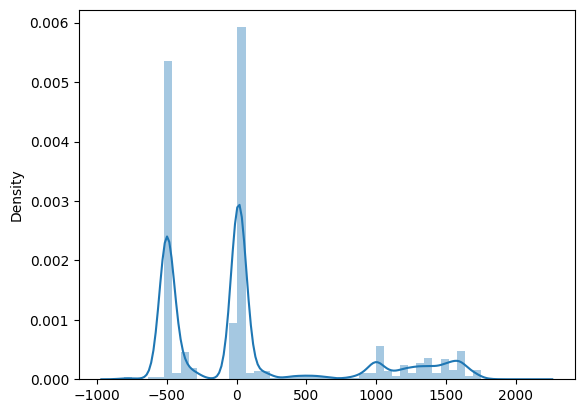

<ipython-input-22-6778085faacc>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train)


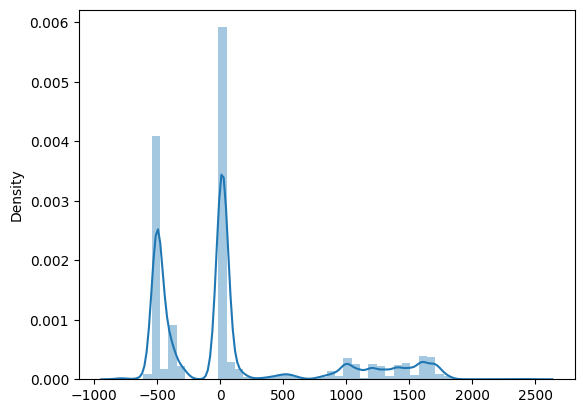

In [ ]:
sns.distplot(test)
plt.show()
sns.distplot(train)
plt.show()

**Избавимся от аномальных значений  удалив значения которые находятся за пределами интерквантильного расстояния.**

In [ ]:
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1
train = train[~((train < (Q1 - 1.5 * IQR)) | (train > (Q3 + 1.5 * IQR))).any(axis=1)]

<ipython-input-24-323b72c00446>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train)


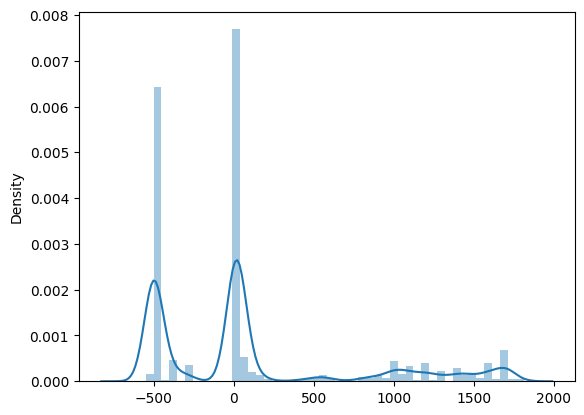

In [ ]:
sns.distplot(train)
plt.show()

In [ ]:
Q1 = test.quantile(0.25)
Q3 = test.quantile(0.75)
IQR = Q3 - Q1
test = test[~((test < (Q1 - 1.5 * IQR)) | (test > (Q3 + 1.5 * IQR))).any(axis=1)]

<ipython-input-26-7d1c5510d7ef>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test)


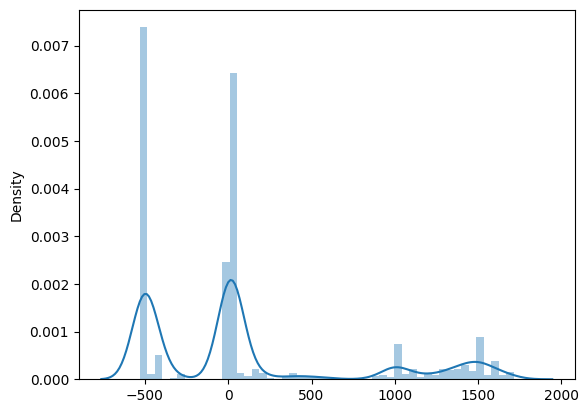

In [ ]:
sns.distplot(test)
plt.show()

Аномальные значения удалены, nan-ы заполнены. Осталось добавить таргеты в тестовую выборку из полной.

In [ ]:
test.shape

(873, 52)

In [ ]:
test = test.merge(full[['final.output.recovery', 'rougher.output.recovery']], how='left', on='date')
train = train.merge(full[['final.output.recovery', 'rougher.output.recovery']], how='left', on='date')
test.shape

(873, 54)

т.к. таргеты добавила после заполнения пропусков, проверю ещё раз на пропуски.

In [ ]:
train.columns

Index(['primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'rougher.state.floatba

In [ ]:
isna_te = test.isna().sum()
print('Пропусков в test:', isna_te.sum())

Пропусков в test: 0


## Анализ данных

**Посмотрим как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки.**

In [ ]:
def concentration_metals(final_output, primary_cleaner_output,
                        rougher_output,rougher_input_feed, name):
    plt.figure(figsize=(15,5))
    rougher_output.hist(bins=300, label='Флотация', alpha=0.5)
    primary_cleaner_output.hist(bins=200, label='Первичная очистка', alpha=0.5)
    final_output.hist(bins=200, label='Финальная очистка', alpha=0.5)
    rougher_input_feed.hist(bins=200, label='Исходное сырьё', alpha=0.5)

    plt.title(name)
    plt.legend(loc='upper right')
    plt.show()

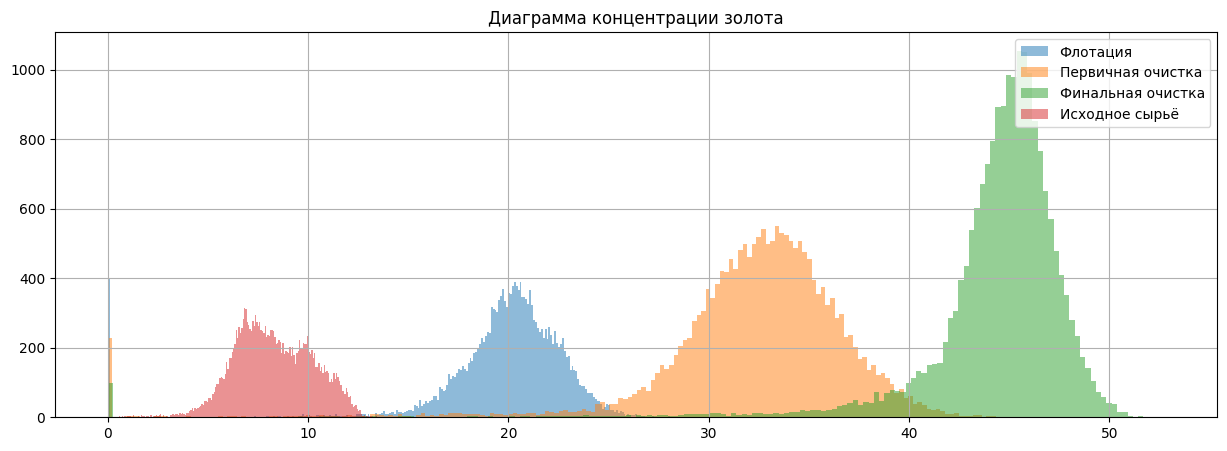

In [ ]:
concentration_metals(full['final.output.concentrate_au'],
                     full['primary_cleaner.output.concentrate_au'],
                     full['rougher.output.concentrate_au'],
                     full['rougher.input.feed_au'],
                     'Диаграмма концентрации золота')

На каждом этапе очистки концентрация золота растёт. Так и должно быть, мы же добываем золото.

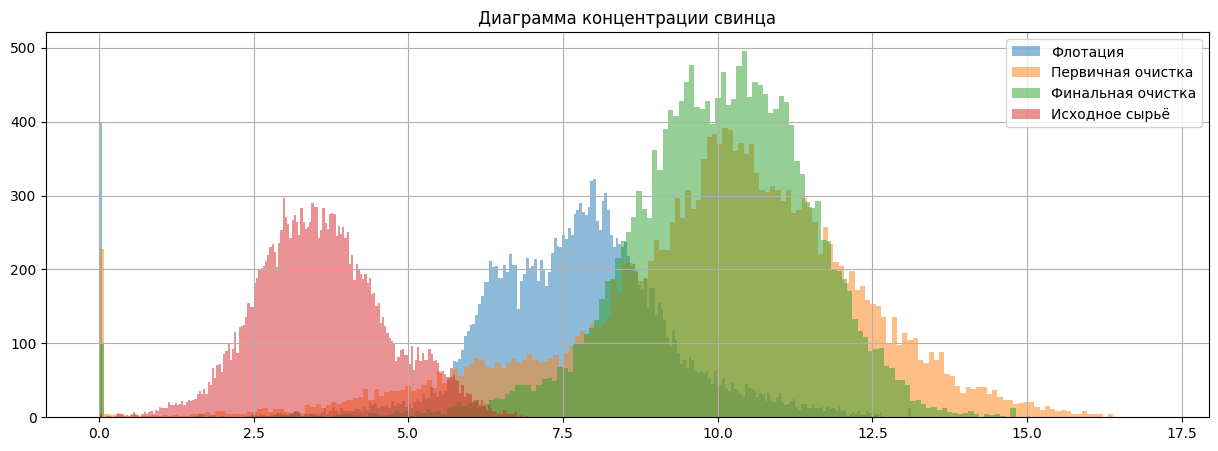

In [ ]:
concentration_metals(full['final.output.concentrate_pb'],
                     full['primary_cleaner.output.concentrate_pb'],
                     full['rougher.output.concentrate_pb'],
                     full['rougher.input.feed_pb'],
                     'Диаграмма концентрации свинца')

С каждым этапом очистки концентрация свинца повышается.

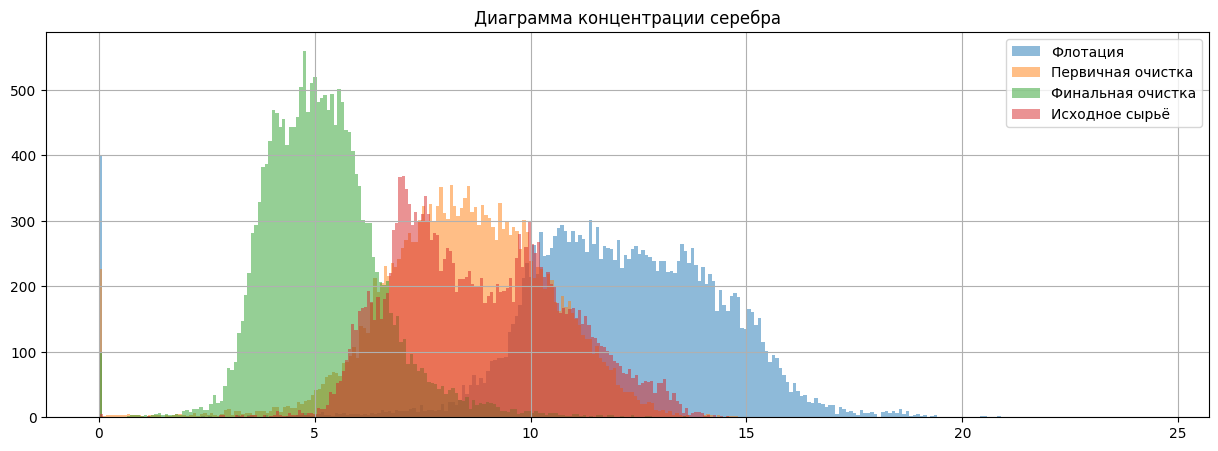

In [ ]:
concentration_metals(full['final.output.concentrate_ag'],
                     full['primary_cleaner.output.concentrate_ag'],
                     full['rougher.output.concentrate_ag'],
                     full['rougher.input.feed_ag'],
                     'Диаграмма концентрации серебра')

С каждым этапом очистки концентрация серебра понижается.

Концентрация серебра понижается, в то время как концентрация золота и свинца повышается. Золото и свинец часто выделяются в высокоцентрированные фракции, в то время как серебро часто является слабым центровым металлом и может быть растворено в остаточных растворах.

---
**Сравним распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.**

<ipython-input-35-8c38a29e7ef8>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train['rougher.input.feed_size'], label='train размер гранул', alpha=0.5, shade=True)
<ipython-input-35-8c38a29e7ef8>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(test['rougher.input.feed_size'], label='test размер гранул', alpha=0.5, shade=True)


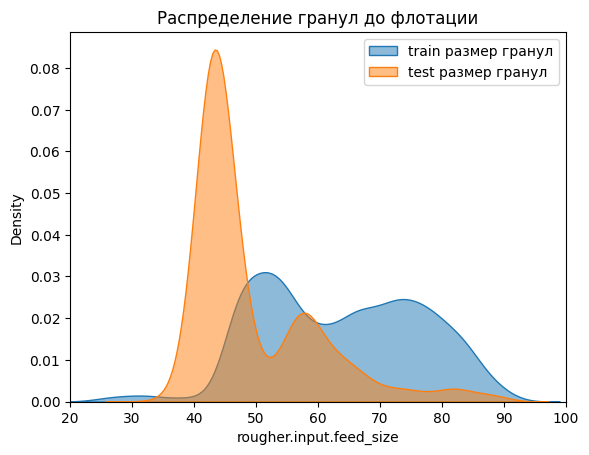

In [ ]:
sns.kdeplot(train['rougher.input.feed_size'], label='train размер гранул', alpha=0.5, shade=True)
sns.kdeplot(test['rougher.input.feed_size'], label='test размер гранул', alpha=0.5, shade=True)
plt.xlim([20, 100])
plt.title('Распределение гранул до флотации')
plt.legend(loc='upper right')
plt.show()

<ipython-input-36-0ef7b45523be>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train['primary_cleaner.input.feed_size'], label='train размер гранул', alpha=0.5, shade=True)
<ipython-input-36-0ef7b45523be>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(test['primary_cleaner.input.feed_size'], label='test размер гранул', alpha=0.5, shade=True)


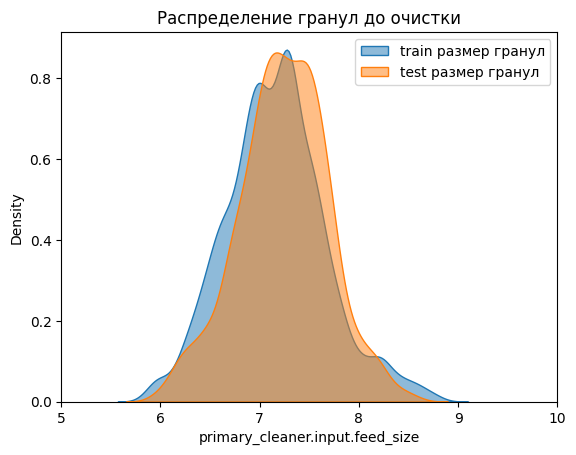

In [ ]:
sns.kdeplot(train['primary_cleaner.input.feed_size'], label='train размер гранул', alpha=0.5, shade=True)
sns.kdeplot(test['primary_cleaner.input.feed_size'], label='test размер гранул', alpha=0.5, shade=True)
plt.xlim([5, 10])
plt.legend(loc='upper right')
plt.title('Распределение гранул до очистки')
plt.show()

До флотации гистограммы похожи, но немного отличаются размеры, до очистки распределение нормализовалось и стало достаточно похожим.

**Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.**

Суммируем все вещества для каждого этапа очистки и выводим групповую гистограмму.

In [ ]:
rougher_output = (full['rougher.output.concentrate_au'] + full['rougher.output.concentrate_ag'] +
                  full['rougher.output.concentrate_pb'] + full['rougher.output.concentrate_sol']
                 )

In [ ]:
primary_cleaner = (full['primary_cleaner.output.concentrate_au'] + full['primary_cleaner.output.concentrate_ag'] +
                   full['primary_cleaner.output.concentrate_pb'] + full['primary_cleaner.output.concentrate_sol']
                  )

In [ ]:
final_output = (full['final.output.concentrate_au'] + full['final.output.concentrate_ag'] +
                full['final.output.concentrate_pb'] + full['final.output.concentrate_sol']
               )

In [ ]:
rougher_input = (full['rougher.input.feed_au'] + full['rougher.input.feed_ag'] +
                full['rougher.input.feed_pb'] + full['rougher.input.feed_sol']
               )

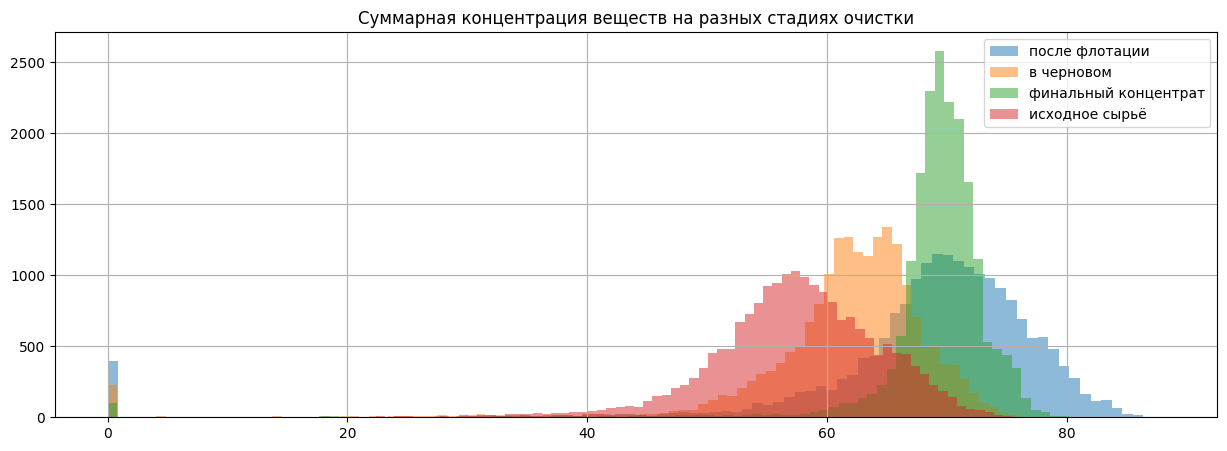

In [ ]:
plt.figure(figsize=(15,5))
rougher_output.hist(bins=100, label='после флотации', alpha=0.5)
primary_cleaner.hist(bins=100, label='в черновом', alpha=0.5)
final_output.hist(bins=100, label='финальный концентрат', alpha=0.5)
rougher_input.hist(bins=100, label='исходное сырьё', alpha=0.5)


plt.title('Суммарная концентрация веществ на разных стадиях очистки')
plt.legend(loc='upper right')
plt.show()

Аномалии мы не трогаем, т.к. в выборке для моделей их не будет

## Модель

Разобьём выборки на target и features.

In [ ]:
features_train = train.drop(['final.output.recovery', 'rougher.output.recovery'],  axis=1)
target_train_final = train['final.output.recovery']
target_train_rougher = train['rougher.output.recovery']
features_test = test.drop(['final.output.recovery', 'rougher.output.recovery'],  axis=1)
target_test_final = test['final.output.recovery']
target_test_rougher = test['rougher.output.recovery']
print('Тренировочная выборка:', features_train.shape, end='')
print()
print('Таргет тренировочной выборки, флотация:', target_train_rougher.shape, end='')
print()
print('Таргет тренировочной выборки, финальная:', target_train_final.shape, end='')
print()
print('Тестовая выборка:', features_test.shape, end='')
print()
print('Таргет тестовой выборки, флотация:', target_test_rougher.shape, end='')
print()
print('Таргет тренировочной выборки, финальная:', target_test_final.shape, end='')


Тренировочная выборка: (3180, 52)
Таргет тренировочной выборки, флотация: (3180,)
Таргет тренировочной выборки, финальная: (3180,)
Тестовая выборка: (873, 52)
Таргет тестовой выборки, флотация: (873,)
Таргет тренировочной выборки, финальная: (873,)

**Напишем функцию для вычисления итоговой sMAPE**

Функция расчёта Symmetric Mean Absolute Percentage Error

In [ ]:
def smape_func(y_true,y_pred):
    smape = np.mean(abs(y_true - y_pred) / ((abs(y_true) + abs(y_pred)) / 2)) * 100
    return smape

Функция расчёта итоговой sMAPE

In [ ]:
def final_smape(smape_rougher,smape_final):
    return (0.25 * smape_rougher + 0.75 * smape_final)

In [ ]:
smape_scorer = make_scorer(smape_func, greater_is_better=False)

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

Функция правильная) Молодец, что для избежания дублирования кода вначале используешь функцию для невзвешенной sMAPE.

**Обучим разные модели и оценим их качество кросс-валидацией. Выберем лучшую модель**

Масштабируем и создаём модель с помощью Pipeline

In [ ]:
model_random_forest = make_pipeline(StandardScaler(),RandomForestRegressor())
model_decision_tree = make_pipeline(StandardScaler(),DecisionTreeRegressor())
model_linear_regression = make_pipeline(StandardScaler(),LinearRegression())

Определим параметры переменной и используем гридсёрч для подбора лучших параметров, для  лучшего результата sMAPE

In [ ]:
random_forest_params = {"randomforestregressor__n_estimators":[5,100],
                        "randomforestregressor__max_depth":[1,10]}

decision_tree_params = {"decisiontreeregressor__max_depth":[1,10]}

linear_regression_params = {'linearregression__fit_intercept': [True, False]}

In [ ]:
gs_rougher_rf = GridSearchCV(model_random_forest,
                             param_grid=random_forest_params, scoring=smape_scorer
                            )
gs_final_rf = GridSearchCV(model_random_forest,
                           param_grid=random_forest_params, scoring=smape_scorer
                          )
gs_rougher_dt = GridSearchCV(model_decision_tree,
                             param_grid=decision_tree_params, scoring=smape_scorer
                            )
gs_final_dt = GridSearchCV(model_decision_tree,
                           param_grid=decision_tree_params, scoring=smape_scorer, cv=5
                          )
gs_rougher_lr = GridSearchCV(model_linear_regression,
                             param_grid=linear_regression_params, scoring=smape_scorer, cv=5
                            )
gs_final_lr = GridSearchCV(model_linear_regression,
                             param_grid=linear_regression_params, scoring=smape_scorer, cv=5
                            )

Обучим модели

In [ ]:
gs_rougher_rf.fit(features_train, target_train_rougher)
gs_final_rf.fit(features_train, target_train_final)

gs_rougher_dt.fit(features_train, target_train_rougher)
gs_final_dt.fit(features_train, target_train_final)

gs_rougher_lr.fit(features_train, target_train_rougher)
gs_final_lr.fit(features_train, target_train_final)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'linearregression__fit_intercept': [True, False]},
             scoring=make_scorer(smape_func, greater_is_better=False))

Посмотрим лучшего оценщика

In [ ]:
print(gs_rougher_rf.best_estimator_)
print(gs_final_rf.best_estimator_)
print(gs_rougher_dt.best_estimator_)
print(gs_final_dt.best_estimator_)
print(gs_rougher_lr.best_estimator_)
print(gs_final_lr.best_estimator_)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=1, n_estimators=5))])
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor', RandomForestRegressor(max_depth=10))])
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeregressor', DecisionTreeRegressor(max_depth=1))])
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeregressor', DecisionTreeRegressor(max_depth=1))])
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])


Теперь для каждого таргета посмотрим лучшую оценку

In [ ]:
best_score_rougher = gs_rougher_rf.best_score_
best_score_final = gs_final_rf.best_score_
best_score_rougher_dt = gs_rougher_dt.best_score_
best_score_final_dt = gs_final_dt.best_score_
best_score_rougher_lr = gs_rougher_lr.best_score_
best_score_final_lr = gs_final_lr.best_score_

In [ ]:
print('Целевой признак - флотация:', 'Случайный лес', best_score_rougher,
      'Дерево решений', best_score_rougher_dt,
      'Линейная регрессия', best_score_rougher_lr
     )
print()
print('Целевой признак - финальная очистка:',
      'Случайный лес', best_score_final, 'Дерево решений', best_score_final_dt,
      'Линейная регрессия', best_score_final_lr
     )


Целевой признак - флотация: Случайный лес -10.068612056804808 Дерево решений -10.905717638015977 Линейная регрессия -13.009359440270043

Целевой признак - финальная очистка: Случайный лес -7.482983736389744 Дерево решений -9.272819099542186 Линейная регрессия -9.61688841845129


Целевой признак - флотация:
* Случайный лес -10.16
* Дерево решений -10.91
* Линейная регрессия -13.01

Целевой признак - финальная очистка:
* Случайный лес -7.52
* Дерево решений -9.27
* Линейная регрессия -9.61

Лучшая модель - случайный лес для обоих признаков. C параметрами Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=1, n_estimators=5))])

In [ ]:
final_smape(best_score_rougher,best_score_final)

-8.12939081649351

Final sMAPE на тренировочной выборке -8.18

**Проверим качество "Случайного леса" на тестовой выборке**

Предсказываем ответы.

In [ ]:
rogher_pred = gs_rougher_rf.predict(features_test)
final_pred = gs_final_rf.predict(features_test)
final_smape(smape_func(target_test_rougher, rogher_pred),smape_func(target_test_final, final_pred))

5.442523195253061

Final sMAPE на тестовой выборке 5.38

**Сравним нашу модель с константной**

In [ ]:
dr_rougher = DummyRegressor()
dr_rougher.fit(features_train, target_train_rougher)
dr_rougher_pred = dr_rougher.predict(features_test)

In [ ]:
dr_final= DummyRegressor()
dr_final.fit(features_train, target_train_final)
dr_final_pred = dr_final.predict(features_test)

In [ ]:
final_smape(smape_func(target_test_rougher, dr_rougher_pred),smape_func(target_test_final, dr_final_pred))

5.394050020294191

final sMAPE константной модели 5.39. Наша модель справляется лучше.

**Вывод.**
Модель машинного обучения была подготовлена для предсказания коэффициента восстановления золота из золотосодержащей руды. Для оценки качества модели был использован метрика SMAPE. Полученный результат составил 5.33, что можно считать достаточно хорошим. Модель может помочь оптимизировать производство, повысить эффективность и снизить риски убыточности.